In [217]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
data = pd.read_csv("Cleaned_Booking.com_data.csv")

In [221]:
data

Unnamed: 0                                      Property_name  \
0             0                    olive service apartments rohini   
1             1         olive service apartments - greater kailash   
2             2  anara service apartments - greater kailash par...   
3             4    bedchambers serviced apartments south extension   
4             6         olive serviced apartments - defence colony   
..          ...                                                ...   
962        1619                               northern view haward   
963        1620                        treebo greenland, mall road   
964        1621                   krishna hill stay near mall road   
965        1622                       shimla hills apartments 2bhk   
966        1623                                 himalayan hideaway   

                         Location  Rating        Review  \
0               rohini, new delhi     9.8   exceptional   
1    greater kailash 1, new delhi     9.0        superb   
2                       new delhi     8.3     very good   
3                       new delhi     8.7      fabulous   
4                       new delhi     7.5          good   
..                            ...     ...           ...   
962                        shimla     8.8      fabulous   
963                        shimla     5.3  review score   
964                        shimla     8.2     very good   
965                        shimla     9.0        superb   
966                        shimla     8.0     very good   

                                          Type_of_stay     price  \
0              1×two-bedroom apartmententire apartment   47814.0   
1     1×standard two-bedroom apartmententire apartment  149629.0   
2                   1×studio with balconyentire studio  152620.0   
3         2×three-bedroom apartment2 entire apartments  144982.0   
4                       1×standard studioentire studio  192026.0   
..                                                 ...       ...   
962  5×deluxe double room5 double bedsfree cancella...   23726.0   
963  2×economy double room2 extra-large double beds...   55575.0   
964  2×standard double room2 double bedsfree cancel...   26900.0   
965         2×two-bedroom apartment2 entire apartments   28000.0   
966  1×deluxe family room6 single bedsfree cancella...   33725.0   

     Taxes_and_charges_inr       City  No_Of_Adults  No_Of_Children  \
0                   5738.0  new delhi            10               0   
1                  26933.0  new delhi            10               0   
2                      0.0  new delhi            10               0   
3                      0.0  new delhi            10               0   
4                  34565.0  new delhi            10               0   
..                     ...        ...           ...             ...   
962                 2847.0     shimla             8               2   
963                 6669.0     shimla             8               2   
964                 3228.0     shimla             8               2   
965                 3360.0     shimla             8               2   
966                 4047.0     shimla             8               2   

     Final_Price               Recommended for  
0        53552.0  recommended for friends trip  
1       176562.0  recommended for friends trip  
2       152620.0  recommended for friends trip  
3       144982.0  recommended for friends trip  
4       226591.0  recommended for friends trip  
..           ...                           ...  
962      26573.0   recommended for family trip  
963      62244.0   recommended for family trip  
964      30128.0   recommended for family trip  
965      31360.0   recommended for family trip  
966      37772.0   recommended for family trip  

[967 rows x 13 columns]

In [227]:
data.drop("Unnamed: 0" ,axis = 1 ,inplace =True)

In [229]:
data.shape

(967, 12)

In [231]:
numerical_data = data.select_dtypes(include = [int , float]).columns.tolist()
categorical_data = data.select_dtypes(include = ['object']).columns.tolist()

In [233]:
numerical_data = data.select_dtypes(include = [int , float]).columns.tolist()
numerical_data

['Rating',
 'price',
 'Taxes_and_charges_inr',
 'No_Of_Adults',
 'No_Of_Children',
 'Final_Price']

In [235]:
categorical_data = data.select_dtypes(include = ['object']).columns.tolist()
categorical_data 

['Property_name',
 'Location',
 'Review',
 'Type_of_stay',
 'City',
 'Recommended for']

## `Distribution of Data`

`boxplot`

Rating                      Axes(0.125,0.786098;0.168478x0.0939024)
price                    Axes(0.327174,0.786098;0.168478x0.0939024)
Taxes_and_charges_inr    Axes(0.529348,0.786098;0.168478x0.0939024)
No_Of_Adults             Axes(0.731522,0.786098;0.168478x0.0939024)
No_Of_Children              Axes(0.125,0.673415;0.168478x0.0939024)
Final_Price              Axes(0.327174,0.673415;0.168478x0.0939024)
dtype: object

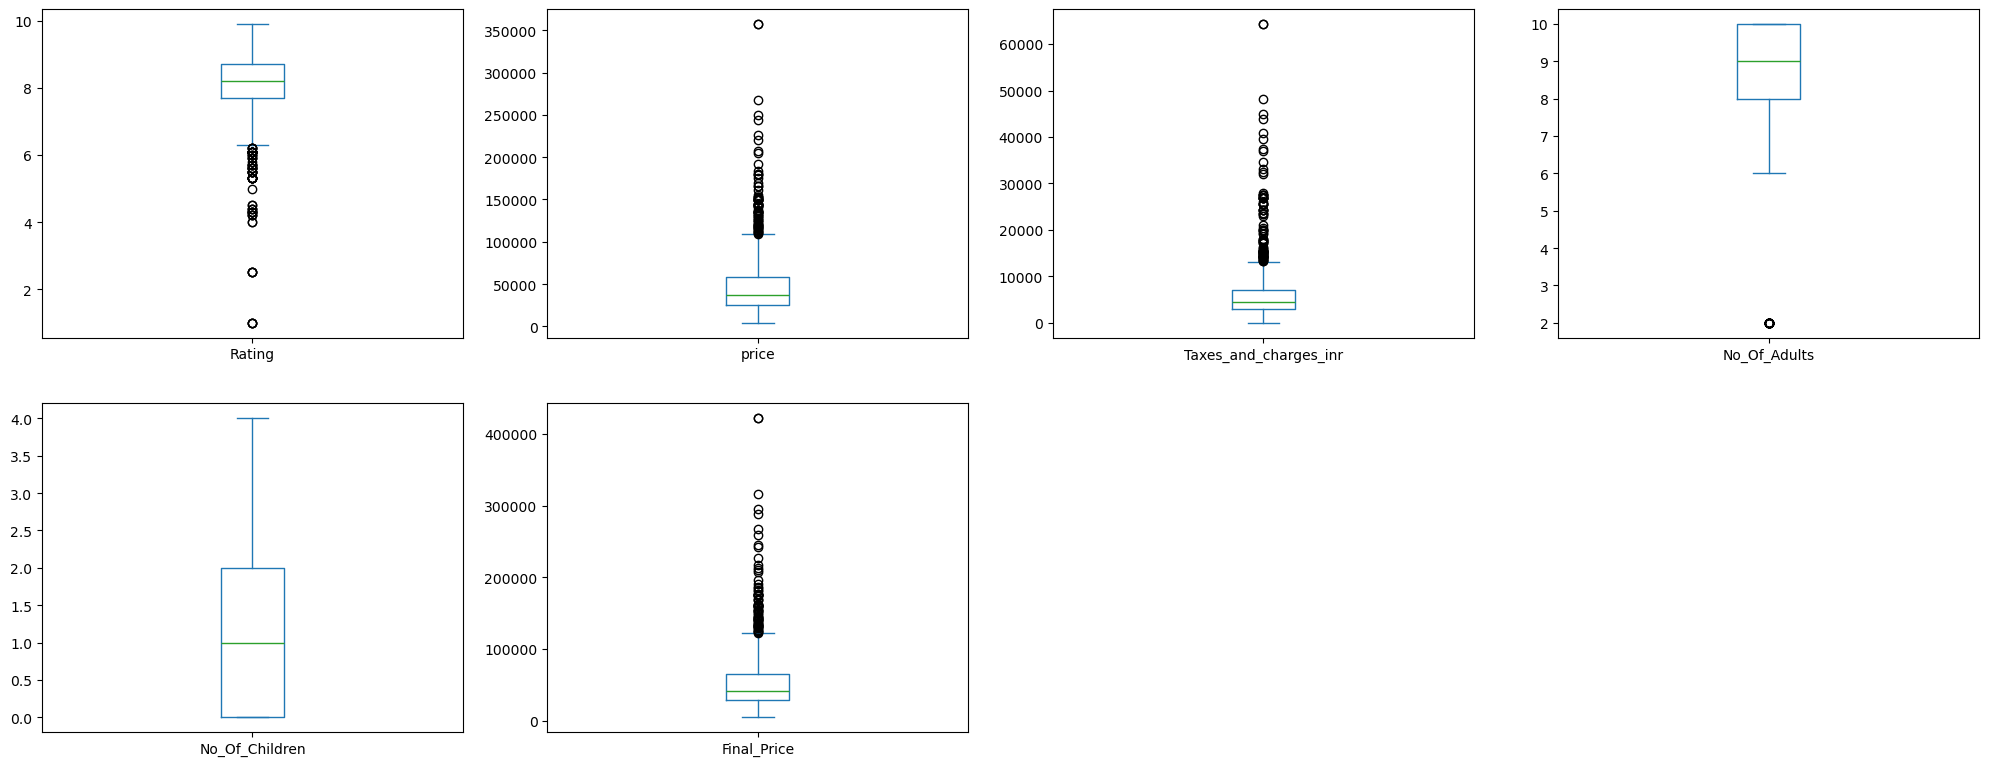

In [239]:
data[numerical_data].plot(kind = 'box' , 
                      subplots = True , 
                      figsize = (25,35) , 
                      layout = (7,4))

Box Plots – Outlier Detection & Distribution Spread
This chart visualizes the spread and outliers for six numerical columns:

1. Rating
Range: 1 to 10

- Median: Around 8–9, indicating most properties are well-rated.

- Outliers: A few low-rated properties (1–3), likely poor in quality.

2. Price
- Highly skewed: Most prices are under ₹100,000, but outliers go beyond ₹300,000.

- Indicates luxury properties or pricing errors.

3. Taxes_and_charges_inr
- Skewed right: Majority of taxes lie within ₹10,000 but some spike over ₹50,000.

- Suggests premium accommodations with high tax slabs.

4. No_of_Adults
- Normal range: 6 to 10 adults.

- Outlier: One entry shows only 2 adults — either custom filtering or invalid entry.

5. No_of_Children
- Highly concentrated: Most bookings have 0–2 children.

- Some cases show up to 4 children.

6. Final_Price
- Pattern similar to Price: Most final prices are below ₹100,000, but a few go beyond ₹400,000.

- Outliers reflect high-end or extended stays.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

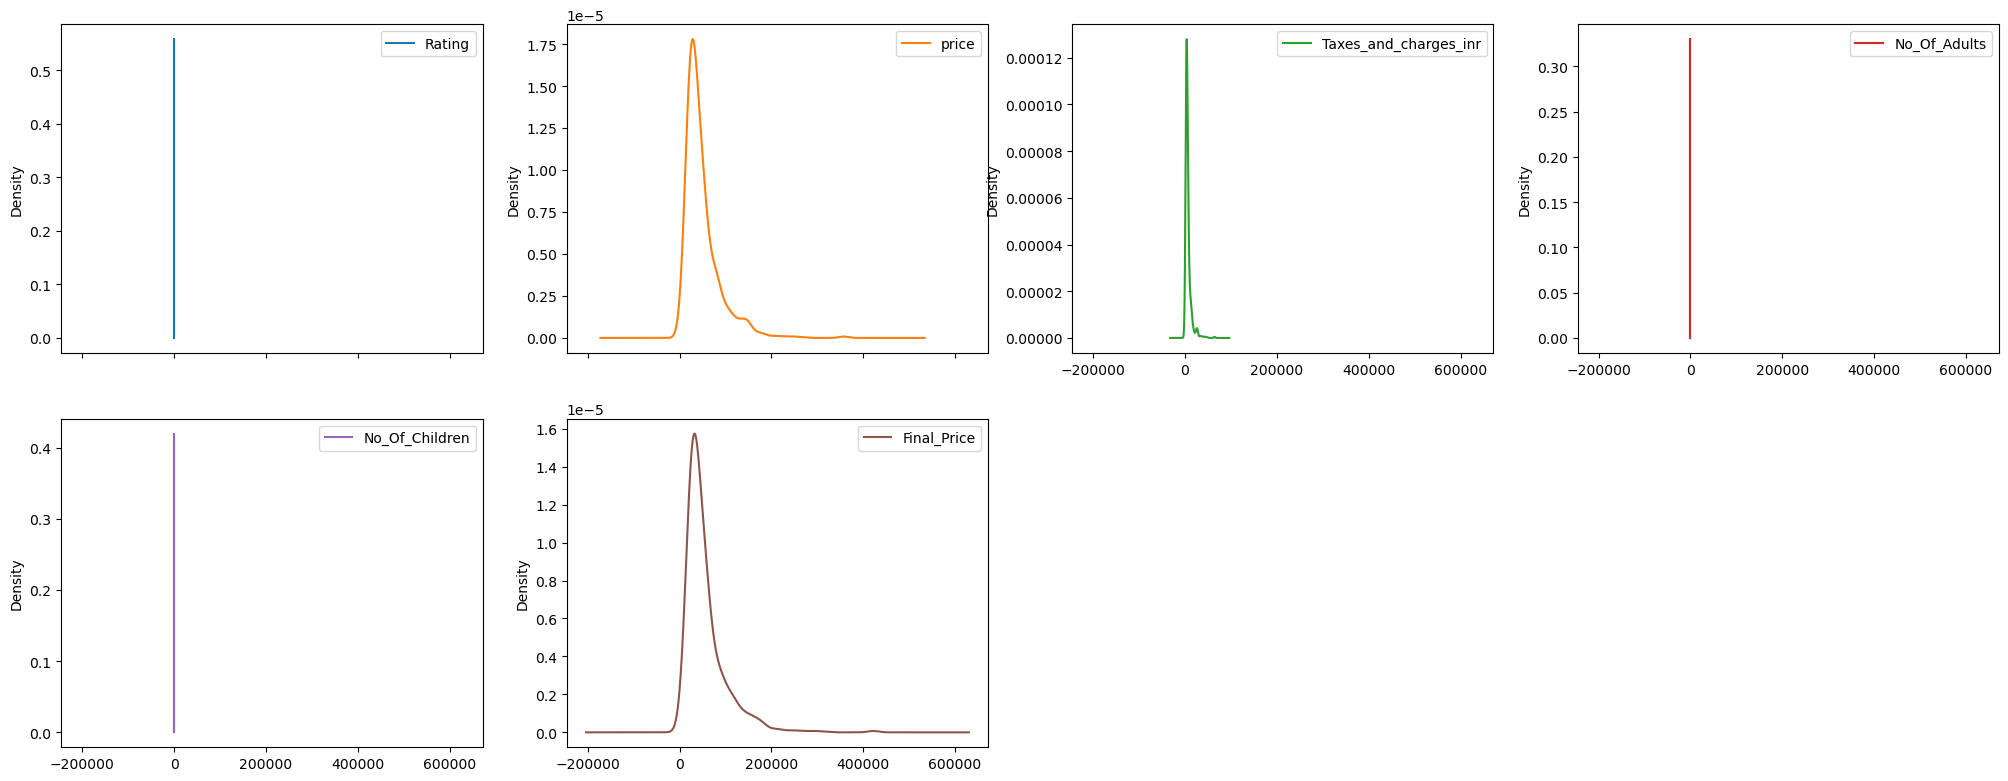

In [241]:
data[numerical_data].plot(kind = 'kde' , 
                      subplots = True , 
                      figsize = (25,35) , 
                      layout = (7,4))

In [244]:
numerical_data

['Rating',
 'price',
 'Taxes_and_charges_inr',
 'No_Of_Adults',
 'No_Of_Children',
 'Final_Price']

In [245]:
Rating = numerical_data[0]
price =numerical_data[1]
Taxes_and_charges_inr =numerical_data[2]
No_Of_Adults=numerical_data[3]
No_Of_Children=numerical_data[4]
Final_Price=numerical_data[5]

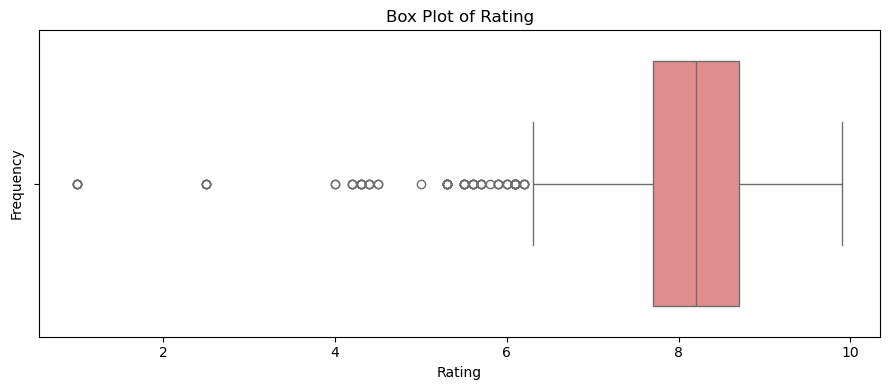

In [246]:
plt.figure(figsize = (9,4))
#histogram 
sns.boxplot(data = data[Rating] ,orient ="h" ,color="lightcoral")
plt.ylabel('Frequency')
plt.title(f'Box Plot of {Rating}')
plt.tight_layout()

#### Observation the most of the ratings is in between 8 to 10

### Handling Outliers

In [253]:
data.skew(numeric_only=True)

Rating                  -2.132334
price                    2.632572
Taxes_and_charges_inr    3.703193
No_Of_Adults            -1.257376
No_Of_Children           0.622859
Final_Price              2.784646
dtype: float64

In [396]:
## IQR
def iqr(df , column):
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)

    IQR = Q3 - Q1

    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)

    #outlier
    outlier = df.loc[(df[column] < lower) | (df[column] > upper) , column]
    print(len(outlier))

    #plot
    plt.figure(figsize = (9,4))
    sns.boxplot(x = column , data = df , color = 'gold')
    plt.show()

    return outlier

In [398]:
def get_IQRValues(data,column):
    q1,q2,q3 =data[column].quantile([0.25,0.5,0.75])
    iqr = q3 -q1
    upper_limit = q3 + 1.5 *iqr
    lower_limit = q1 - 1.5 * iqr
    return upper_limit ,lower_limit
    

In [400]:
get_IQRValues(data,"price")

(108945.0, -25375.0)

In [402]:
num_col = ["price","Taxes_and_charges_inr","Final_Price","Rating"]

In [404]:
def remove_outliers_IQR(data,num_col):
    data_cleaned =data.copy()
    for col in num_col:
        ul, ll  =get_IQRValues(data_cleaned,col)
        data_cleaned = data_cleaned[(data_cleaned[col]>=ll) & (data_cleaned[col]<=ul)].reset_index(drop =True)
    return data_cleaned

In [406]:
data_cleaned =remove_outliers_IQR(data,num_col)  

In [408]:
data_cleaned.skew(numeric_only=True)

Rating                  -0.547654
price                    0.715223
Taxes_and_charges_inr    0.643419
No_Of_Adults            -1.291605
No_Of_Children           0.672315
Final_Price              0.718279
dtype: float64

Rating                      Axes(0.125,0.786098;0.168478x0.0939024)
price                    Axes(0.327174,0.786098;0.168478x0.0939024)
Taxes_and_charges_inr    Axes(0.529348,0.786098;0.168478x0.0939024)
No_Of_Adults             Axes(0.731522,0.786098;0.168478x0.0939024)
No_Of_Children              Axes(0.125,0.673415;0.168478x0.0939024)
Final_Price              Axes(0.327174,0.673415;0.168478x0.0939024)
dtype: object

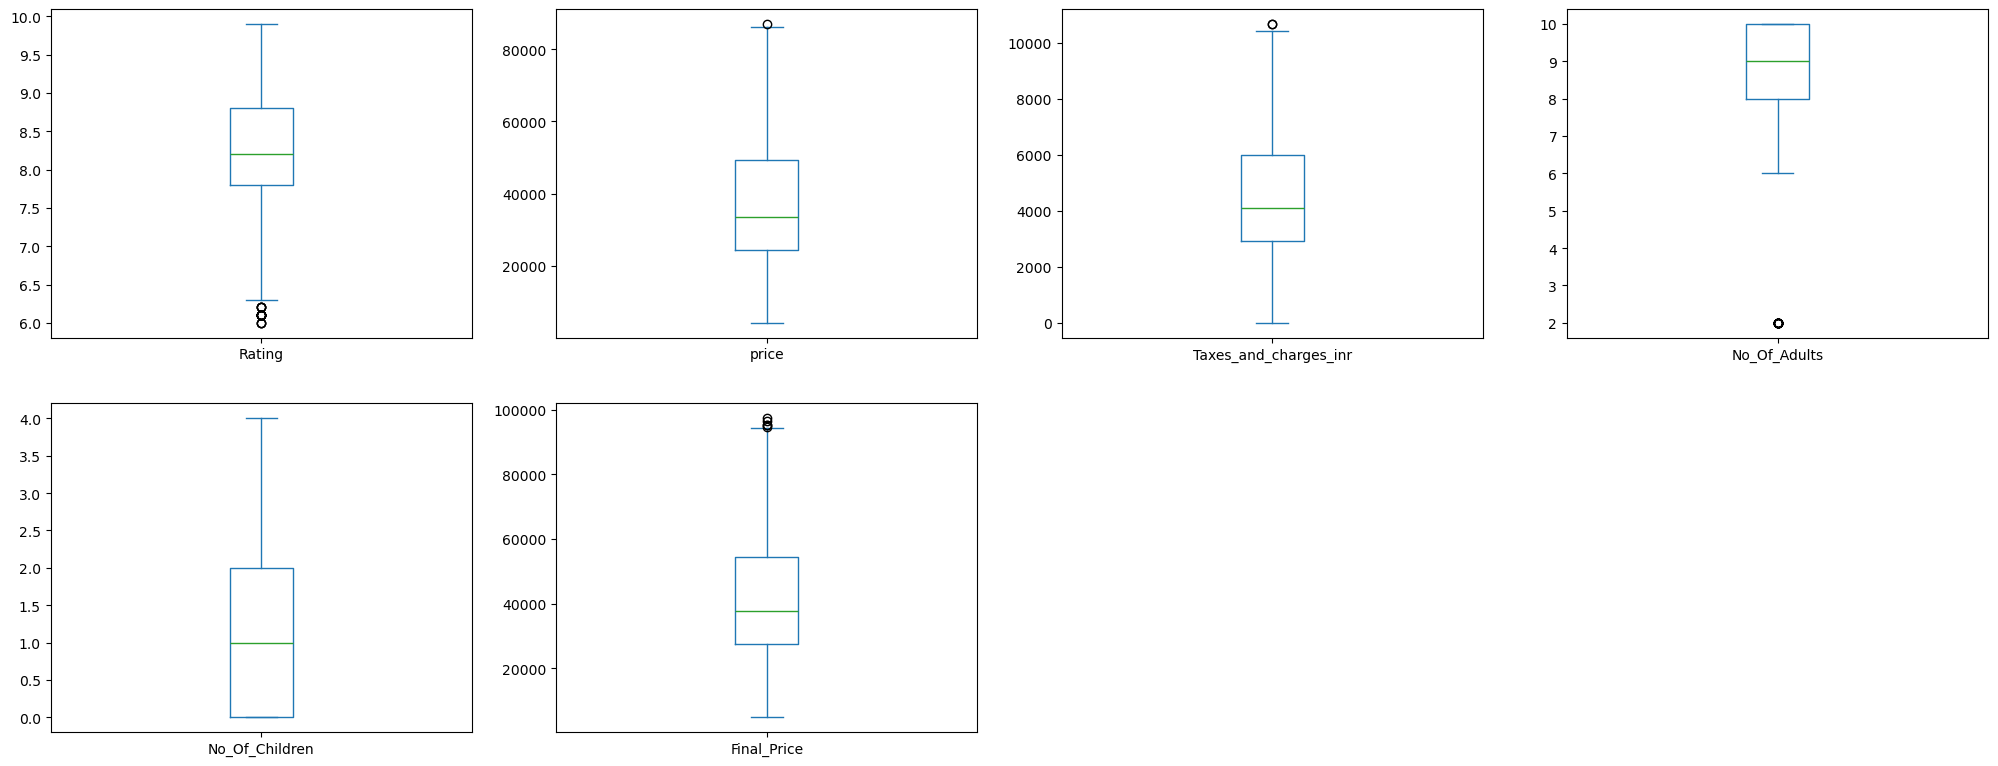

In [410]:
data_cleaned[numerical_data].plot(kind = 'box' , 
                      subplots = True , 
                      figsize = (25,35) , 
                      layout = (7,4))

### Price

#### After remove price column outliers


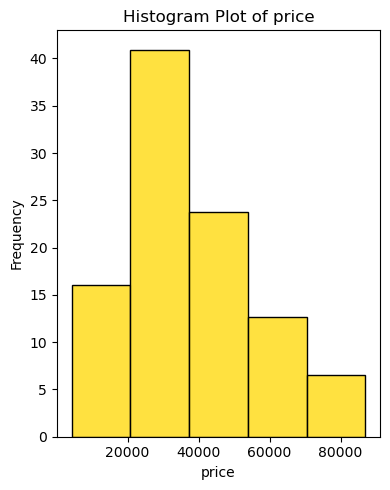

In [413]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = data_cleaned[price] , bins = 5 , color = 'gold' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {price}')
plt.tight_layout()

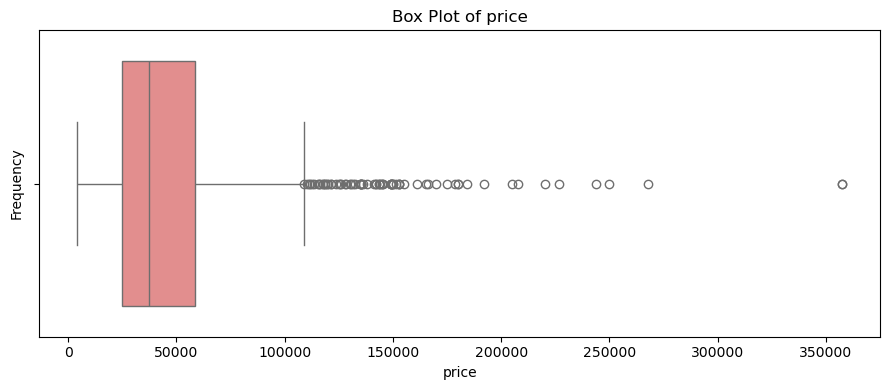

In [414]:
plt.figure(figsize = (9,4))
#histogram 
sns.boxplot(data = data[price] ,orient ="h" ,color="lightcoral")
plt.ylabel('Frequency')
plt.title(f'Box Plot of {price}')
plt.tight_layout()

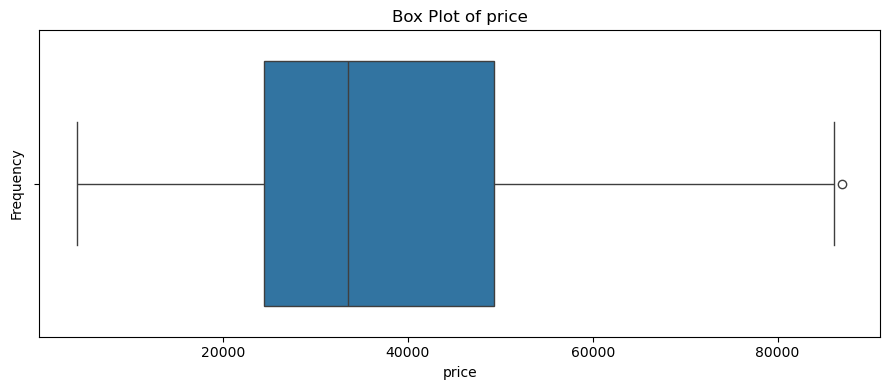

In [415]:
plt.figure(figsize = (9,4))
#histogram 
sns.boxplot(data = data_cleaned[price] ,orient ="h" )
plt.ylabel('Frequency')
plt.title(f'Box Plot of {price}')
plt.tight_layout()
#plt.savefig('centiliter_univariate.png')

### Taxes_and_charges_inr

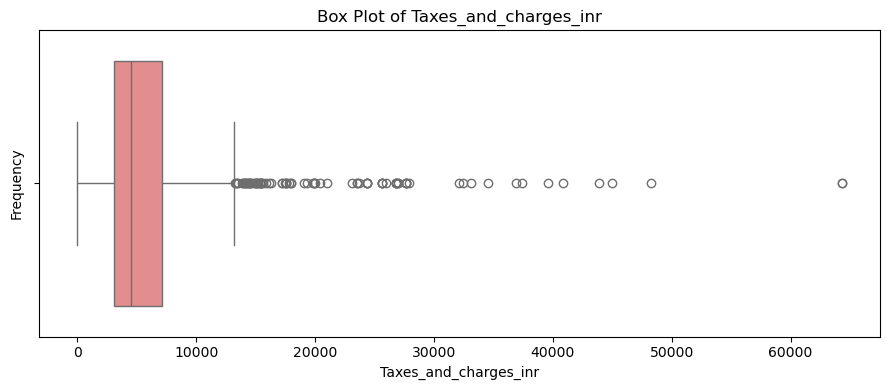

In [418]:
plt.figure(figsize = (9,4))
#histogram 
sns.boxplot(data = data[Taxes_and_charges_inr] ,orient ="h",color="lightcoral")
plt.ylabel('Frequency')
plt.title(f'Box Plot of {Taxes_and_charges_inr}')
plt.tight_layout()


- after removing outliers

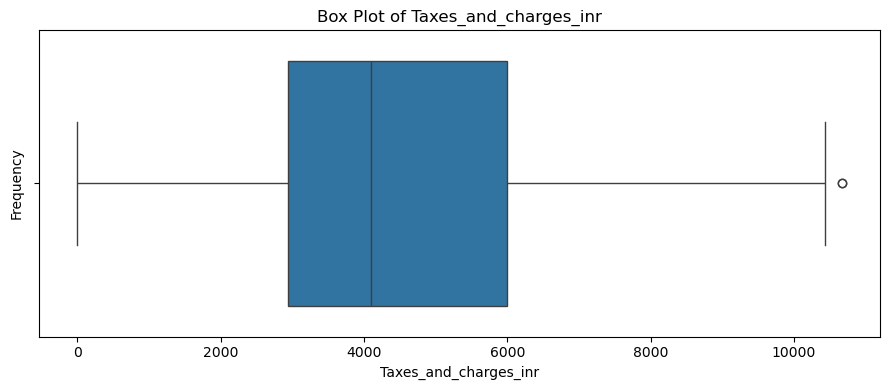

In [420]:
plt.figure(figsize = (9,4))
#histogram 
sns.boxplot(data = data_cleaned[Taxes_and_charges_inr] ,orient ="h")
plt.ylabel('Frequency')
plt.title(f'Box Plot of {Taxes_and_charges_inr}')
plt.tight_layout()

In [421]:
data[data["Taxes_and_charges_inr"]==data.Taxes_and_charges_inr.max()]

Property_name   Location  Rating        Review  \
39  the grand new delhi  new delhi     6.8  review score   
76  the grand new delhi  new delhi     6.8  review score   

                                         Type_of_stay     price  \
39  4×studio apartment4 extra-large double bedsfre...  357300.0   
76  4×studio apartment4 extra-large double bedsfre...  357300.0   

    Taxes_and_charges_inr       City  No_Of_Adults  No_Of_Children  \
39                64314.0  new delhi             6               4   
76                64314.0  new delhi             9               1   

    Final_Price              Recommended for  
39     421614.0  recommended for family trip  
76     421614.0  recommended for family trip

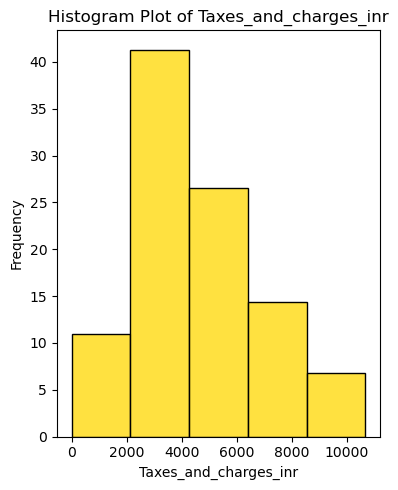

In [422]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = data_cleaned[Taxes_and_charges_inr] , bins = 5 , color = 'gold' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {Taxes_and_charges_inr}')
plt.tight_layout()
#plt.savefig('centiliter_univariate.png')

### Final_Price

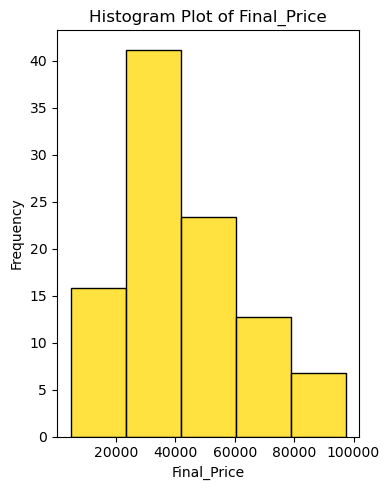

In [424]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = data_cleaned[Final_Price] , bins = 5 , color = 'gold' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {Final_Price}')
plt.tight_layout()
#plt.savefig('centiliter_univariate.png')

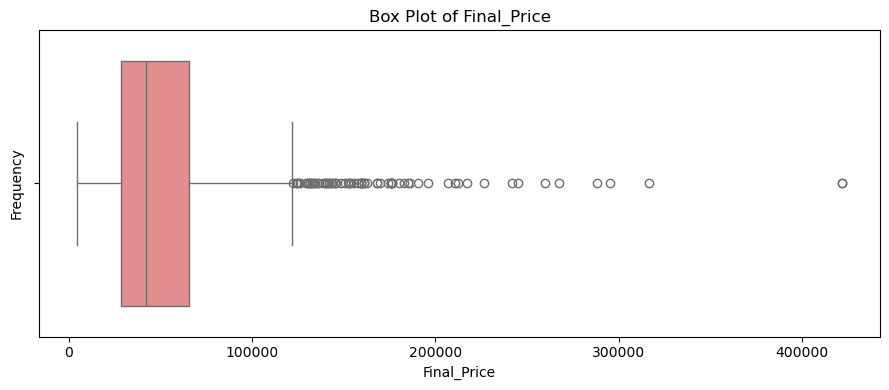

In [425]:
plt.figure(figsize = (9,4))
#histogram 
sns.boxplot(data = data[Final_Price],orient ="h",color="lightcoral")
plt.ylabel('Frequency')
plt.title(f'Box Plot of {Final_Price}')
plt.tight_layout()
#plt.savefig('centiliter_univariate.png')


- after removing the outliers
- Here, remove the 
values and replace other outliers with upper limit and lower limit.

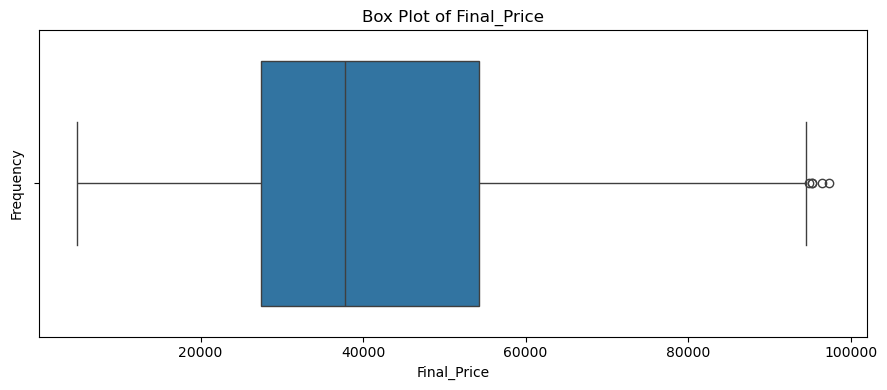

In [428]:
plt.figure(figsize = (9,4))
#histogram 
sns.boxplot(data = data_cleaned[Final_Price],orient ="h")
plt.ylabel('Frequency')
plt.title(f'Box Plot of {Final_Price}')
plt.tight_layout()

In [429]:
# This is an extreme datapoint in the dataset. taxes_And_charges_inr = 64314.0 rs
data[data["Final_Price"]==data.Final_Price.max()]

Property_name   Location  Rating        Review  \
39  the grand new delhi  new delhi     6.8  review score   
76  the grand new delhi  new delhi     6.8  review score   

                                         Type_of_stay     price  \
39  4×studio apartment4 extra-large double bedsfre...  357300.0   
76  4×studio apartment4 extra-large double bedsfre...  357300.0   

    Taxes_and_charges_inr       City  No_Of_Adults  No_Of_Children  \
39                64314.0  new delhi             6               4   
76                64314.0  new delhi             9               1   

    Final_Price              Recommended for  
39     421614.0  recommended for family trip  
76     421614.0  recommended for family trip

### No_Of_Adults

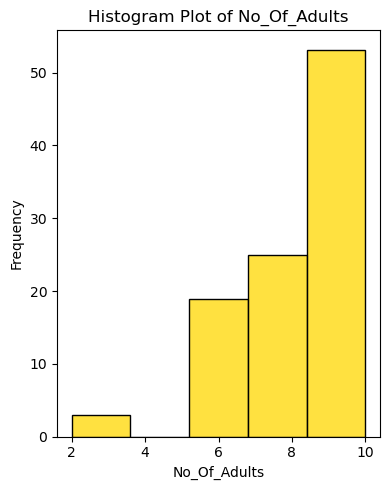

In [434]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = data_cleaned[No_Of_Adults] , bins = 5 , color = 'gold' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {No_Of_Adults}')
plt.tight_layout()

### No_Of_Children

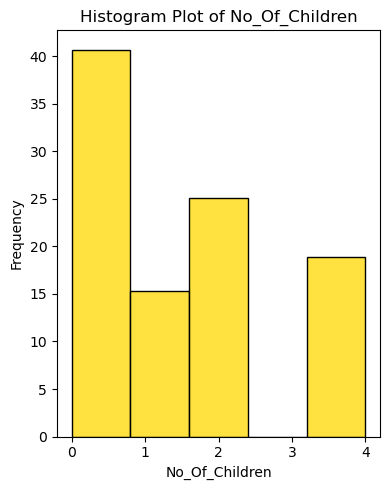

In [439]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = data_cleaned[No_Of_Children] , bins = 5 , color = 'gold' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {No_Of_Children}')
plt.tight_layout()
#plt.savefig('name_of _file.png')

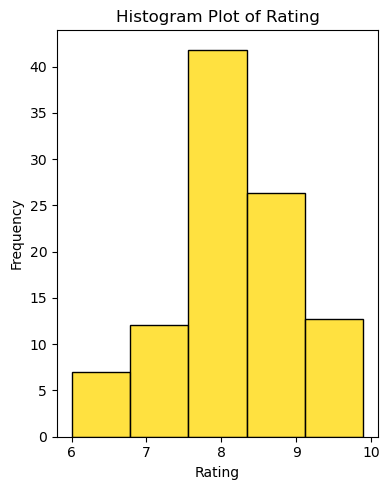

In [443]:
plt.figure(figsize = (4,5))
#histogram 
sns.histplot(data = data_cleaned[Rating] , bins = 5 , color = 'gold' , stat = 'percent')
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of {Rating}')
plt.tight_layout()

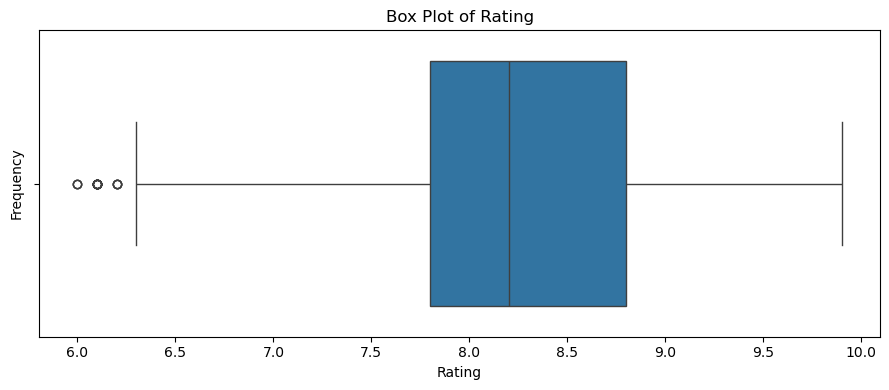

In [447]:
plt.figure(figsize = (9,4))
#histogram 
sns.boxplot(data = data_cleaned[Rating],orient ="h")
plt.ylabel('Frequency')
plt.title(f'Box Plot of {Rating}')
plt.tight_layout()

### Univariate Graphs On Categorical Columns 


Steps of doing Univariate Analysis on Categorical columns

- **Descriptive Statistics:** Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

- **Visualizations:** Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

- **Missing Values:** Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

- **Conclusion:** Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

## Univariate Analysis

### Categorical

In [456]:
categorical_data

['Property_name',
 'Location',
 'Review',
 'Type_of_stay',
 'City',
 'Recommended for']

In [458]:
Property_name = categorical_data[0]
Location = categorical_data[1]
Review = categorical_data[2]
Type_of_stay = categorical_data[3]
City = categorical_data[4]
Recommended_for = categorical_data[5]

In [460]:
# def plot_categorical_analysis(data , column):

#     plt.figure(figsize = (18,18))

#     #Count Plot
#     plt.subplot(3,1,1)
#     sns.countplot(x = column , data = data , palette = 'Set2')
#     plt.title(f'CountPlot of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Count')

#     #PieChart
#     plt.subplot(3,1,2)
#     data[column].value_counts().nlargest(10).plot.pie(autopct = '%1.1f%%' , color = sns.color_palette('Set2'))
#     plt.title(f'Pie Chart of {column}')

#     #Bar Plot
#     plt.subplot(3,1,3)
#     data[column].value_counts().plot(kind = 'bar' , color = 'red' , edgecolor = 'black')
#     plt.title(f'Bar Plot of {column}')
#     plt.xlabel(column)
#     plt.xticks(rotation = 90)
#     plt.ylabel('Frequency')

#     plt.tight_layout()
#     plt.show()
    

In [462]:
#print(plot_categorical_analysis(data , 'Property_name'))

### Property_name

Text(0, 0.5, '')

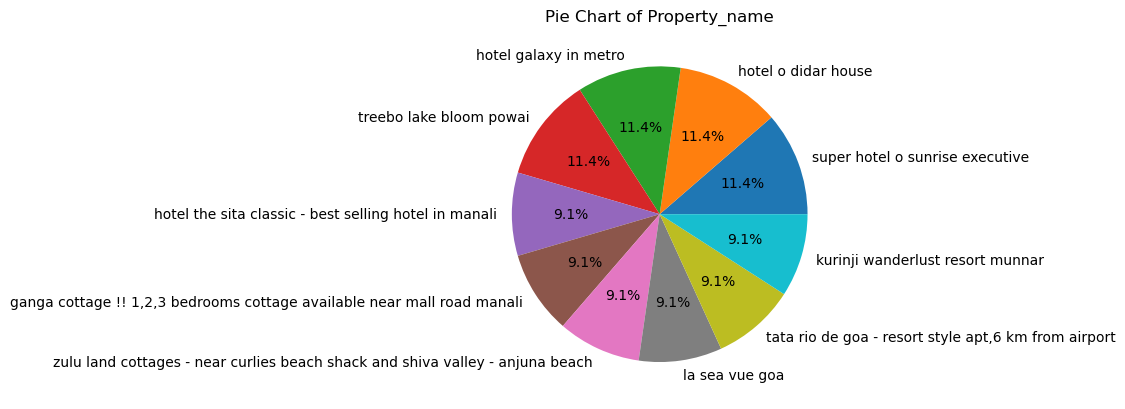

In [465]:
data_cleaned[Property_name].value_counts().nlargest(10).plot.pie(autopct = '%1.1f%%' , color = sns.color_palette('Set2'))
plt.title(f'Pie Chart of {Property_name}')
plt.ylabel('')


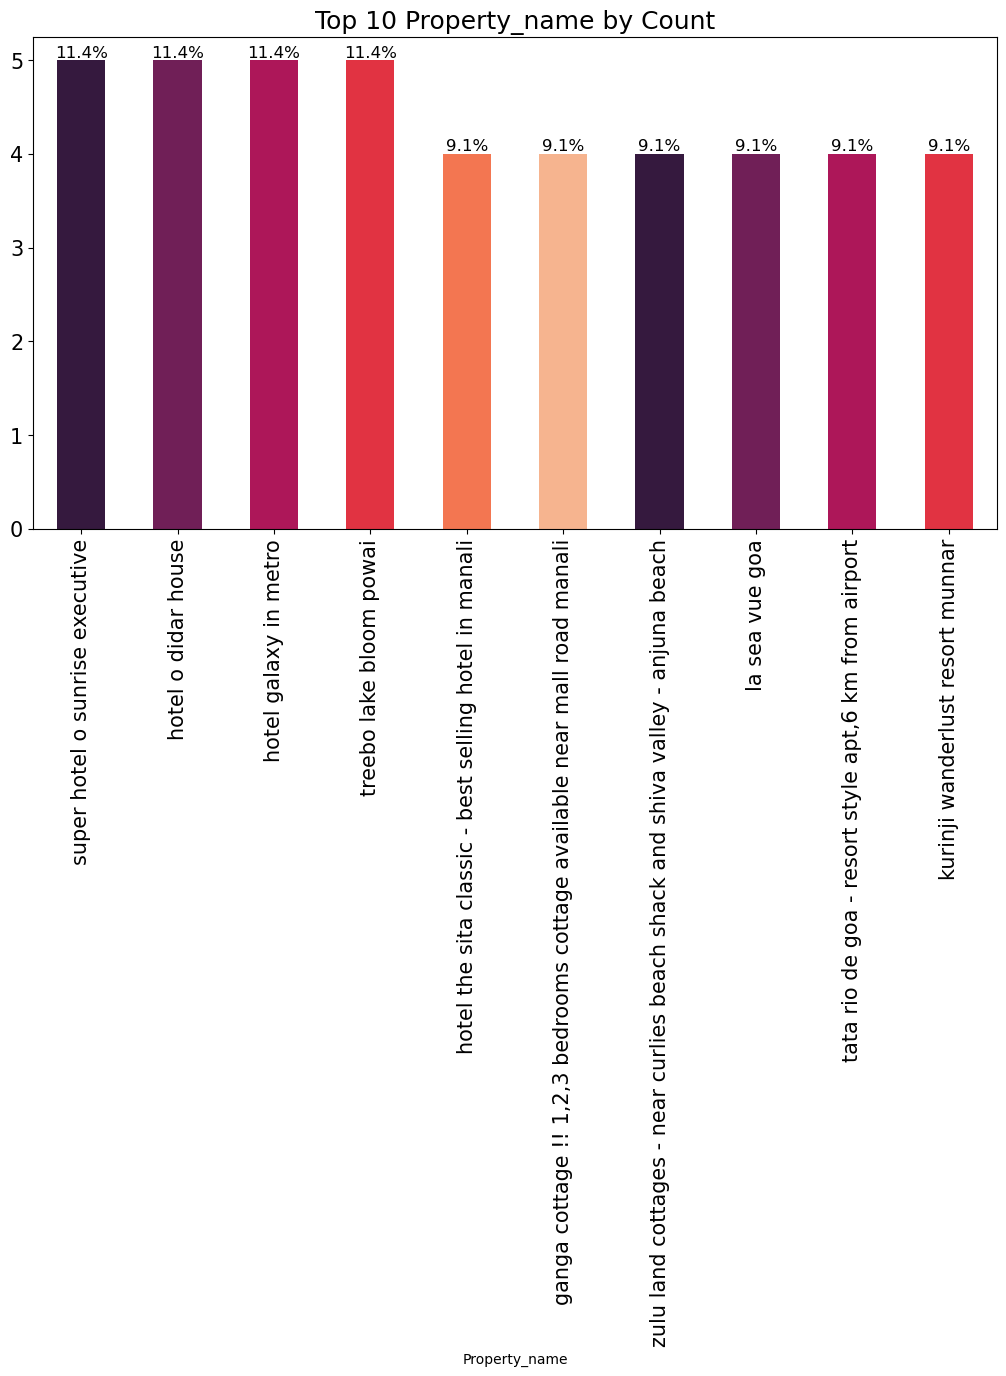

In [467]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'Property_name' is the column name you are plotting
plt.figure(figsize=(12,10))

# Get the top 10 Property_name and their counts
top_brands = data_cleaned['Property_name'].value_counts().nlargest(10)

# Plot the bar chart
ax = top_brands.plot.bar(color=sns.color_palette('rocket'), fontsize=15 )

# Title and labels
plt.title(f'Top 10 Property_name by Count', fontsize=18)
plt.xticks(rotation=30)
plt.tight_layout()

# Add percentages on top of bars
total = top_brands.sum()
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
plt.xticks(rotation =90)
plt.show()

### Location

Text(0, 0.5, '')

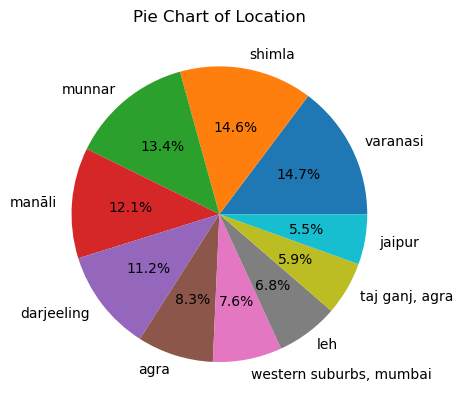

In [470]:
data_cleaned[Location].value_counts().nlargest(10).plot.pie(autopct = '%1.1f%%' , color = sns.color_palette('Set2'))
plt.title(f'Pie Chart of {Location}')
plt.ylabel('')


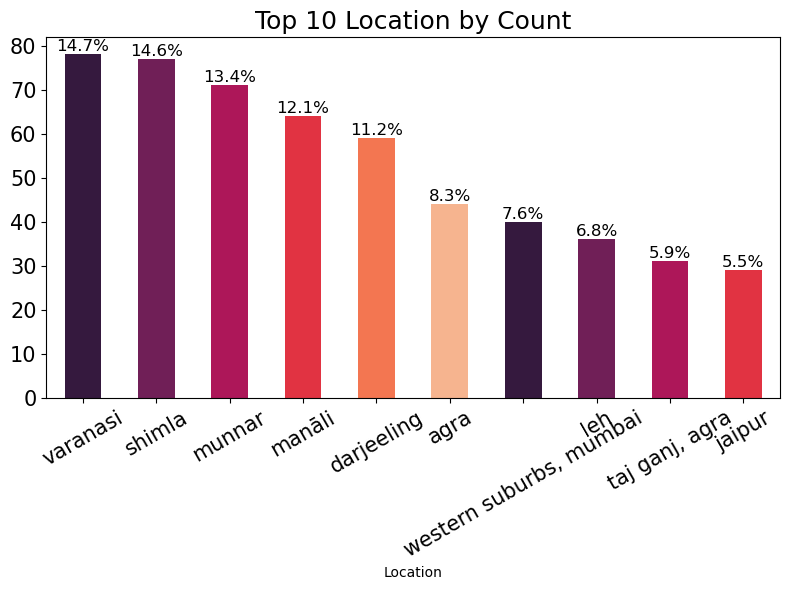

In [472]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'Location' is the column name you are plotting
plt.figure(figsize=(8,6))

# Get the top 10 Location and their counts
top_brands = data_cleaned['Location'].value_counts().nlargest(10)

# Plot the bar chart
ax = top_brands.plot.bar(color=sns.color_palette('rocket'), fontsize=15 )

# Title and labels
plt.title(f'Top 10 Location by Count', fontsize=18)
plt.xticks(rotation=30)
plt.tight_layout()

# Add percentages on top of bars
total = top_brands.sum()
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
#plt.xticks(rotation =90)
plt.show()

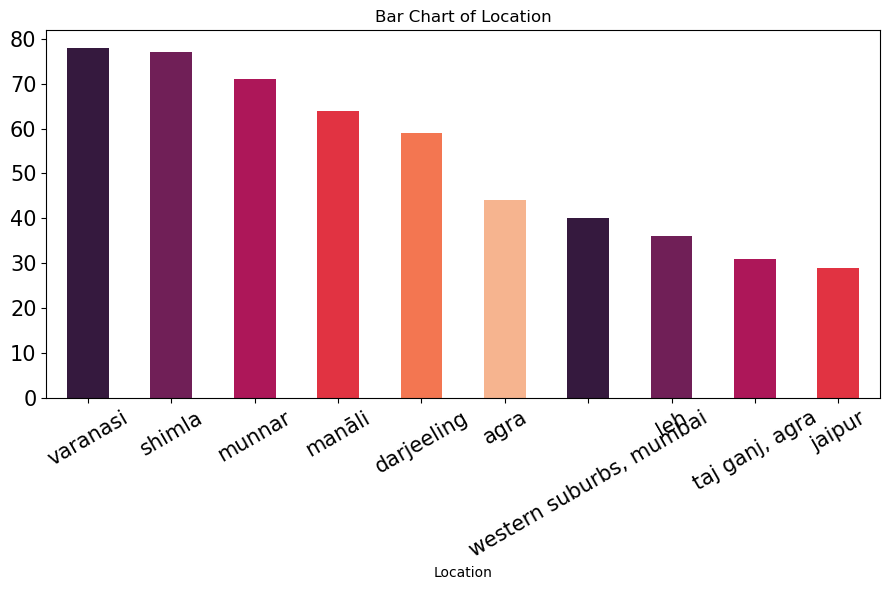

In [474]:
plt.figure(figsize = (9,6))
data_cleaned[Location].value_counts().nlargest(10).plot.bar(color = sns.color_palette('rocket') , fontsize = 15)
plt.title(f'Bar Chart of {Location}')
plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()

### Review

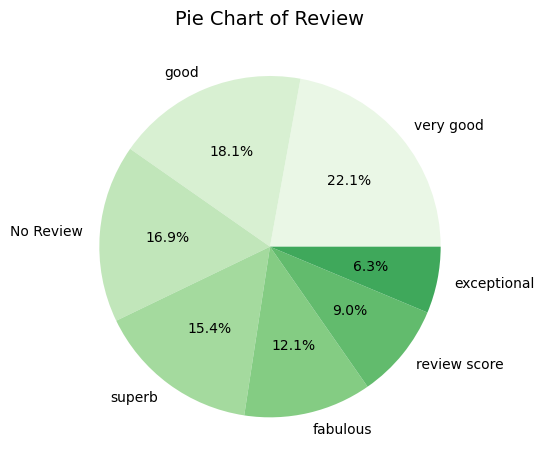

In [477]:
# Define green color palette
green_colors = sns.color_palette('Greens', n_colors=10)

# Create the pie chart
data_cleaned['Review'].value_counts().nlargest(10).plot.pie(
    autopct='%1.1f%%',
    colors=green_colors,
    textprops={'fontsize': 10}
)

# Set the title and layout
plt.title('Pie Chart of Review', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


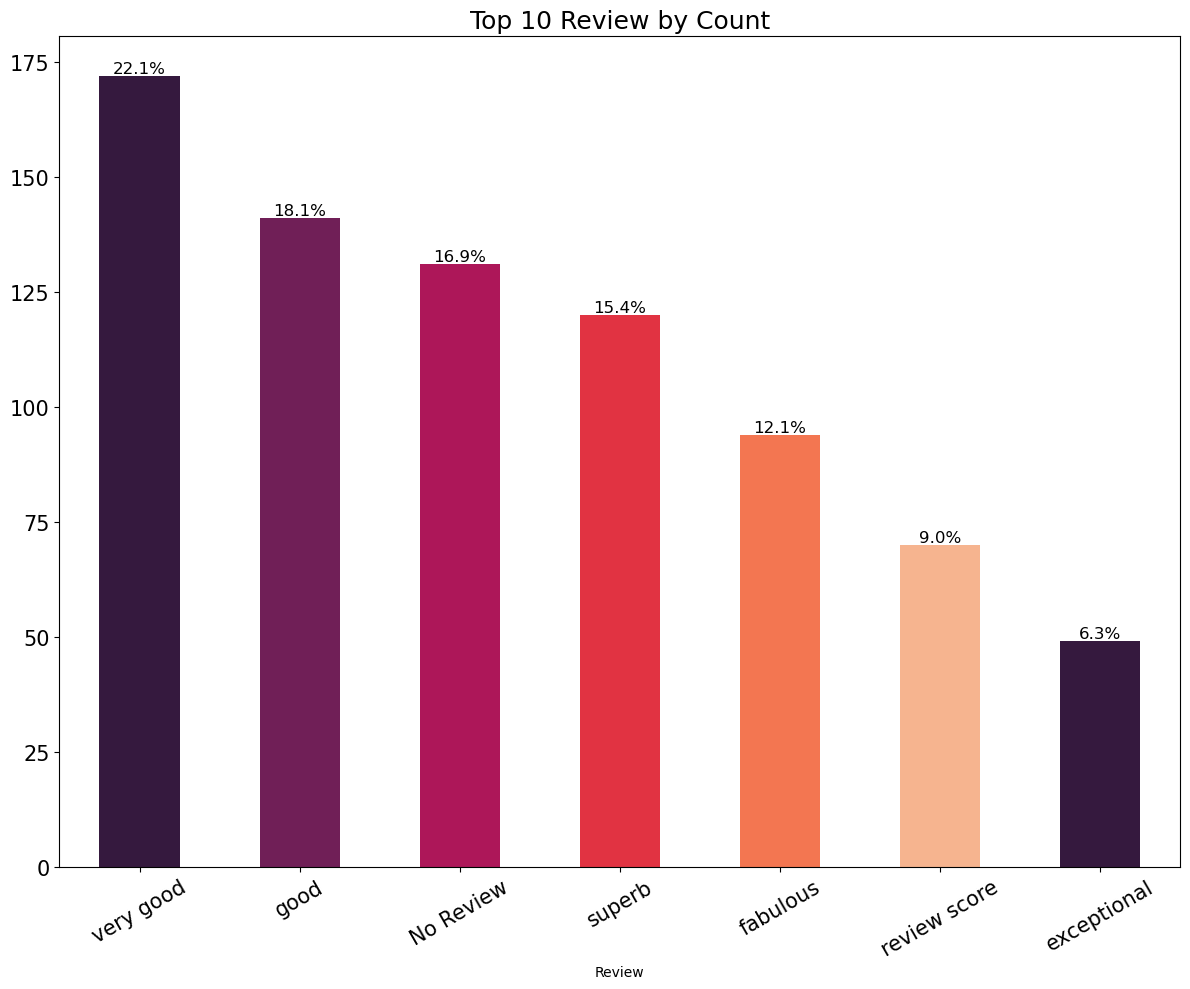

In [479]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'Review' is the column name you are plotting
plt.figure(figsize=(12,10))

# Get the top 10 Review and their counts
top_brands = data_cleaned['Review'].value_counts().nlargest(8)

# Plot the bar chart
ax = top_brands.plot.bar(color=sns.color_palette('rocket'), fontsize=15 )

# Title and labels
plt.title(f'Top 10 Review by Count', fontsize=18)
plt.xticks(rotation=30)
plt.tight_layout()

# Add percentages on top of bars
total = top_brands.sum()
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
#plt.xticks(rotation =90)
plt.show()

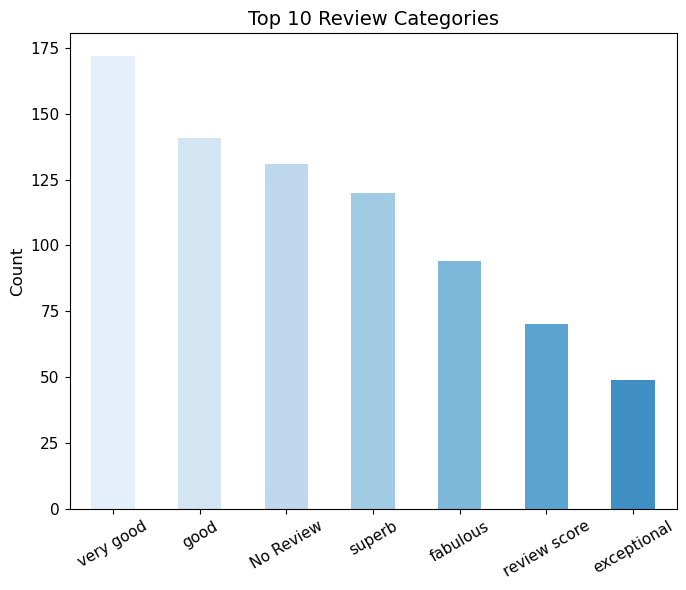

In [480]:
# Set the figure size
plt.figure(figsize=(7, 6))

# Create a blue color palette with 10 shades
blue_colors = sns.color_palette('Blues', n_colors=10)

# Plot the bar chart with the blue color palette
data_cleaned['Review'].value_counts().nlargest(10).plot.bar(
    color=blue_colors,
    fontsize=13
)

# Update chart title and axes formatting
plt.title('Top 10 Review Categories', fontsize=14)
plt.xticks(rotation=30, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('')
plt.ylabel('Count', fontsize=12)

# Ensure layout and save the figure
plt.tight_layout()
plt.savefig('review_bar_chart.png')
plt.show()

### Type_of_stay

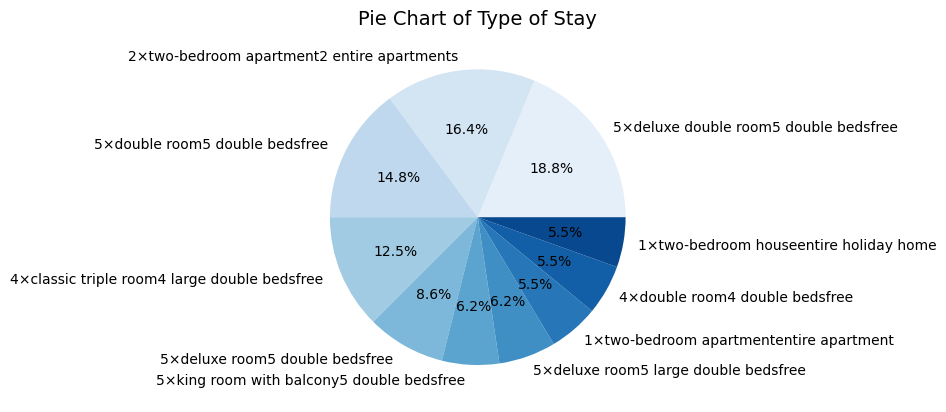

In [482]:
blue_colors = sns.color_palette('Blues', n_colors=10)

# Plot the pie chart
data_cleaned['Type_of_stay'].value_counts().nlargest(10).plot.pie(
    autopct='%1.1f%%',
    colors=blue_colors,
    textprops={'fontsize': 10}
)

plt.title('Pie Chart of Type of Stay', fontsize=14)
plt.ylabel('')
plt.show()

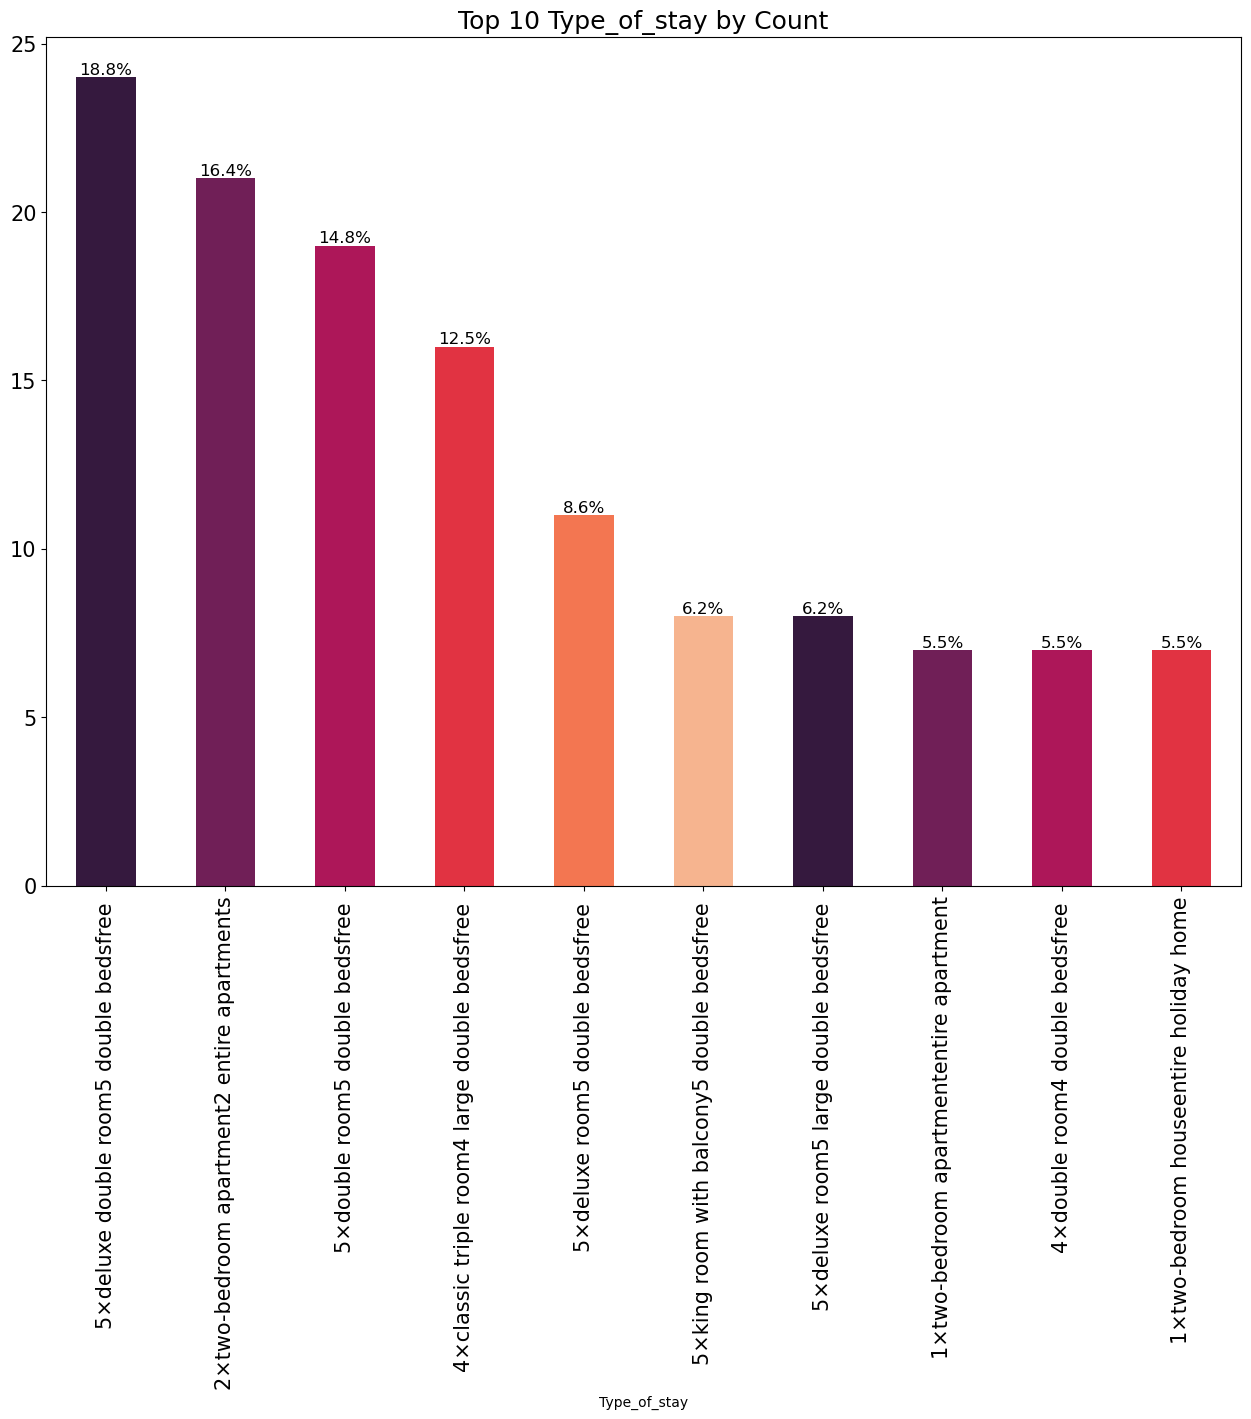

In [483]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'Type_of_stay' is the column name you are plotting
plt.figure(figsize=(15,12))

# Get the top 10 Type_of_stay and their counts
top_brands = data_cleaned['Type_of_stay'].value_counts().nlargest(10)

# Plot the bar chart
ax = top_brands.plot.bar(color=sns.color_palette('rocket'), fontsize=15 )

# Title and labels
plt.title(f'Top 10 Type_of_stay by Count', fontsize=18)
plt.xticks(rotation=30)
plt.tight_layout()

# Add percentages on top of bars
total = top_brands.sum()
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
plt.xticks(rotation =90)
plt.show()

### City

Text(0, 0.5, '')

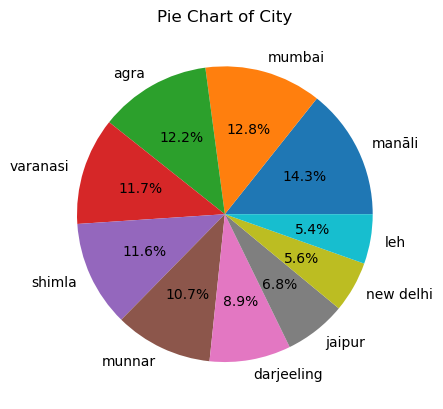

In [485]:
data_cleaned[City].value_counts().nlargest(10).plot.pie(autopct = '%1.1f%%' , color = sns.color_palette('rocket'))
plt.title(f'Pie Chart of {City}')
plt.ylabel('')

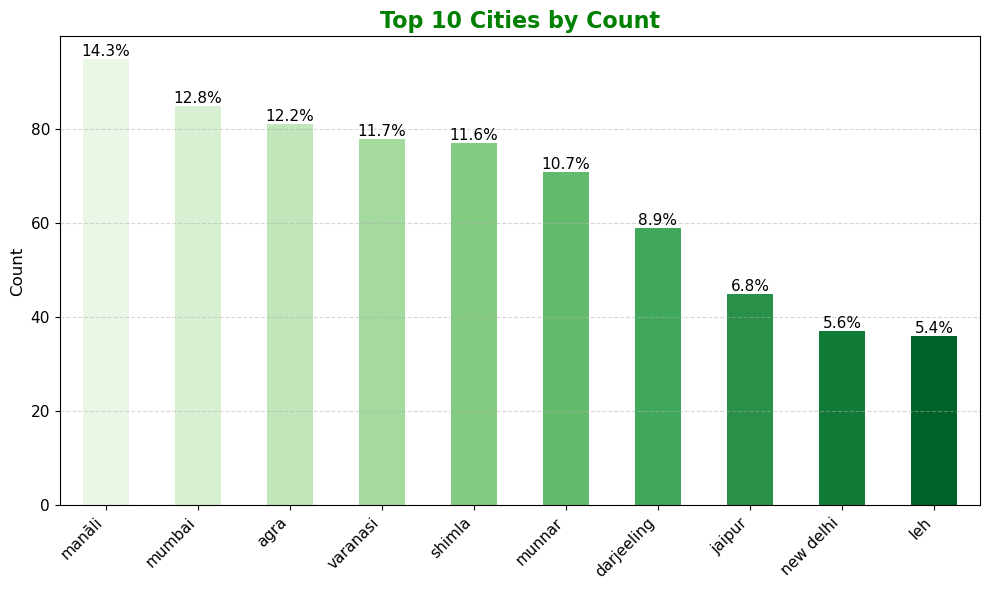

In [486]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Get top 10 cities
top_cities = data_cleaned['City'].value_counts().nlargest(10)

# Use green color palette
green_colors = sns.color_palette('Greens', n_colors=10)

# Plot bar chart
ax = top_cities.plot.bar(
    color=green_colors,
    fontsize=12
)

# Add title and axis formatting
plt.title('Top 10 Cities by Count', fontsize=16, fontweight='bold', color='green')
plt.ylabel('Count', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add percentage annotations on top of bars
total = top_cities.sum()
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=11, color='black', fontweight='medium')

# Improve layout
plt.tight_layout()
plt.show()


### Recommended_for

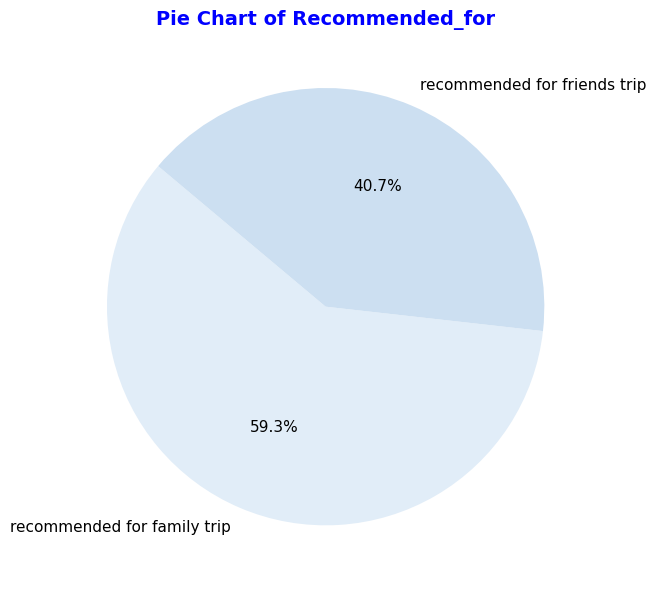

In [511]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# Define blue color palette
blue_colors = sns.color_palette('Blues', n_colors=8)

# Plot pie chart
data_cleaned[Recommended_for].value_counts().nlargest(8).plot.pie(
    autopct='%1.1f%%',
    colors=blue_colors,
    textprops={'fontsize': 11},
    startangle=140
)

# Add title and layout adjustments
plt.title('Pie Chart of Recommended_for', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('')
plt.tight_layout()

# Save or show the plot
# plt.savefig('recommended_for_pie.png')
plt.show()


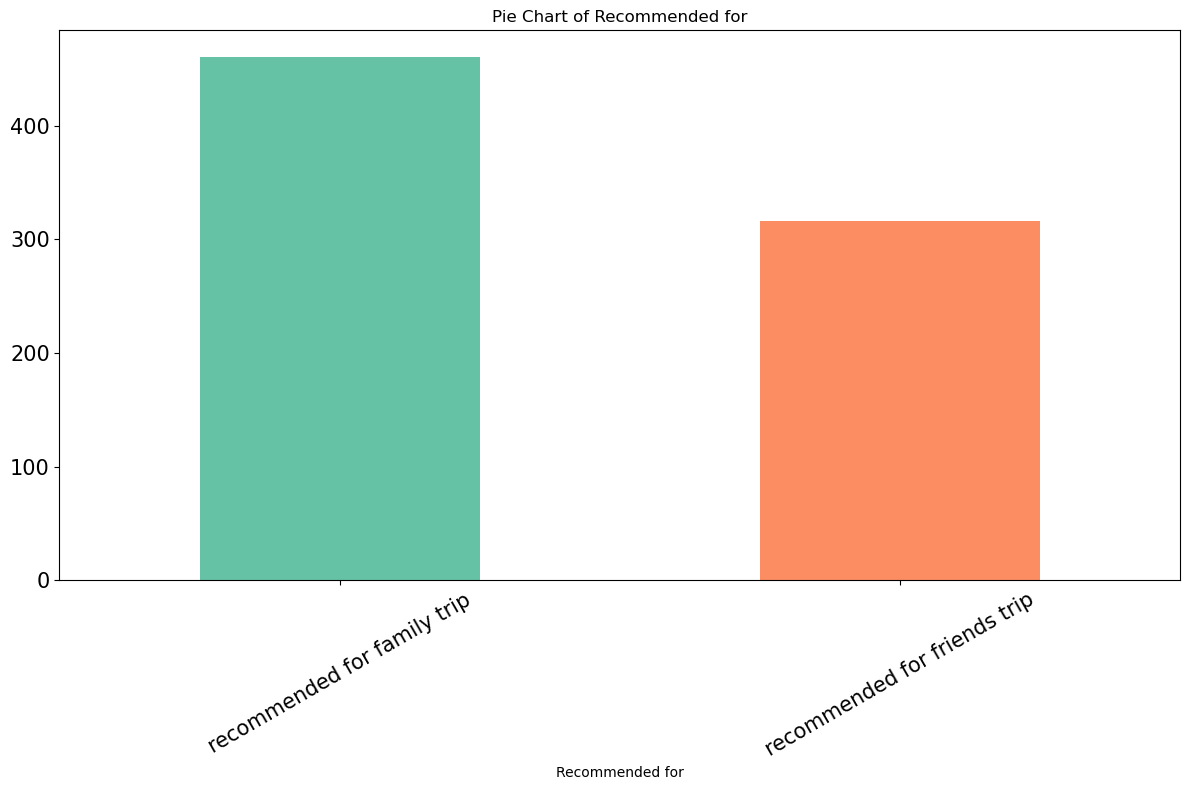

In [513]:
plt.figure(figsize = (12,8))
data_cleaned[Recommended_for].value_counts().nlargest(8).plot.bar(color = sns.color_palette('Set2') , fontsize = 15)
plt.title(f'Pie Chart of {Recommended_for}')
plt.xticks(rotation = 30)
plt.tight_layout()
# plt.savefig('abv_bar_cat.png')
for container in ax.containers:
    ax.bar_label(container , label_type = 'edge' , fontsize = 10 , padding = 2)

# Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot ,violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps

#### numerical vs numerical-----------------> scatter plot on 1st priority
#### numerical vs categorical ---------------> bar plot, stacked bar chart, box plot on 1st priority 
#### categorical vs categorical -------------> grouped bar chart , stacked bar chart ,heat map on 1st priority

In [518]:
numerical_df = data_cleaned.select_dtypes(include=['int64','float64'])
cat_df =data_cleaned.select_dtypes(include='object')

In [520]:
numerical_df.columns

Index(['Rating', 'price', 'Taxes_and_charges_inr', 'No_Of_Adults',
       'No_Of_Children', 'Final_Price'],
      dtype='object')

In [522]:
cat_df.columns

Index(['Property_name', 'Location', 'Review', 'Type_of_stay', 'City',
       'Recommended for'],
      dtype='object')

### Numerical vs numerical 

In [555]:
def num_num(df, col1, col2):
    ##plot
    plt.figure(figsize= (15,15))
    plt.subplot(2,2,1)
    ## scatter plot
    sns.scatterplot(data=df, x= col1, y=col2)
    plt.title('Scatterplot')
    print()
    #plt.xticks(rotation= 45)
    ## line plot
    plt.subplot(2,2,2)
    sns.lineplot(data= df, x= col1, y=col2)
    plt.title('Lineplot')
    print()
    ## joint plot
    sns.jointplot(data=df, y= col1, x= col2,kind="hist")
    plt.title('Jointplot')
    print()
    ## pairplot
    sns.pairplot(df[[col1,col2]])
    plt.title('Pairplot')
    plt.show()
    

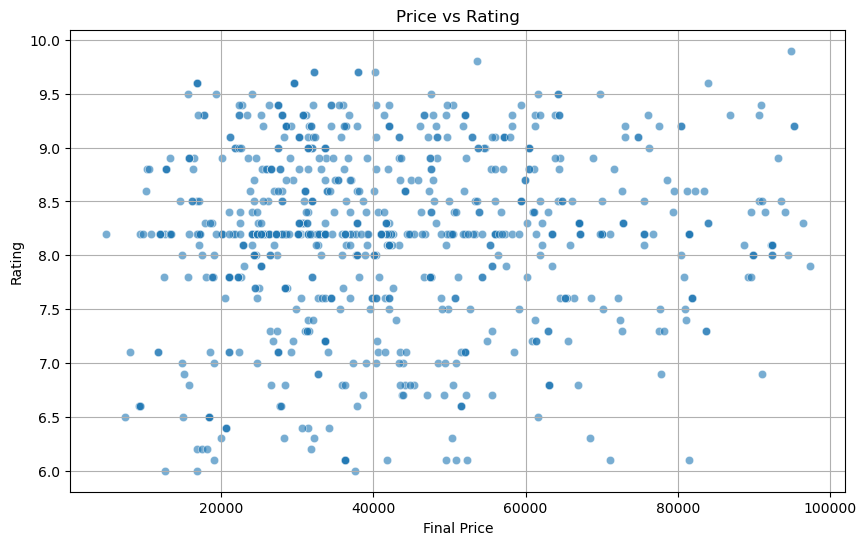

Correlation between Final Price and Rating: 0.06
Best value stays (budget + high rating):
                                         Property_name  Final_Price  Rating
12                             hotel le mount suit inn      17955.0     7.8
15                                          hilife inn      22698.0     9.4
17                                        hotel fringo      11971.0     8.2
18                               hotel grand city lite      24693.0     7.0
19   hotel shivdev international near new delhi rai...      19908.0     6.3
..                                                 ...          ...     ...
752                                   new mehdudia b&b      24640.0     7.6
766                                    hotel avalanche      27412.0     7.1
767  the hostelers homestay shiimla - near hpu, byp...      22831.0     8.1
768                                      hotel fingask      25200.0     8.2
773                               northern view haward      26573.0     8.

In [557]:
# Scatter plot of Final_Price vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_cleaned, x='Final_Price', y='Rating', alpha=0.6)

plt.title('Price vs Rating')
plt.xlabel('Final Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Optional: Calculate correlation
correlation = data_cleaned['Final_Price'].corr(data_cleaned['Rating'])
print(f"Correlation between Final Price and Rating: {correlation:.2f}")

# Optional: Find budget stays (e.g., below 25th percentile price) with high ratings (e.g., above 4.5)
price_threshold = data_cleaned['Final_Price'].quantile(0.25)
high_rating_threshold = 4.5

best_value_stays = data_cleaned[(data_cleaned['Final_Price'] <= price_threshold) & (data_cleaned['Rating'] >= high_rating_threshold)]

print("Best value stays (budget + high rating):")
print(best_value_stays[['Property_name', 'Final_Price', 'Rating']])

#### What This Chart Shows:
- X-axis (Final_Price): Total cost of a 1-week stay (including taxes), ranging from ₹10,000 to ₹1,00,000.

- Y-axis (Rating): Guest ratings, ranging from 6 to 10.

- Each dot: Represents one property listed on Booking.com.

- Observation : “This scatterplot shows that there is no strong correlation between price and guest rating. High ratings are found across all price ranges, especially in the ₹30,000–₹50,000 segment, which suggests that budget-friendly accommodations can still offer a high-quality experience. This is particularly useful for teachers looking to plan affordable and well-rated trips. Additionally, it warns travelers not to assume higher prices always guarantee better service.”

<Axes: xlabel='price', ylabel='Taxes_and_charges_inr'>

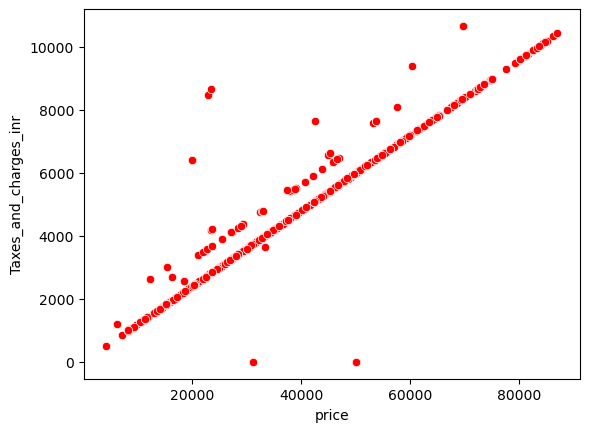

In [171]:
#Scatter plot for price and taxes_and_charges
sns.scatterplot(x ="price" ,y="Taxes_and_charges_inr",data =data_cleaned ,color ="red")

<Axes: xlabel='price', ylabel='Final_Price'>

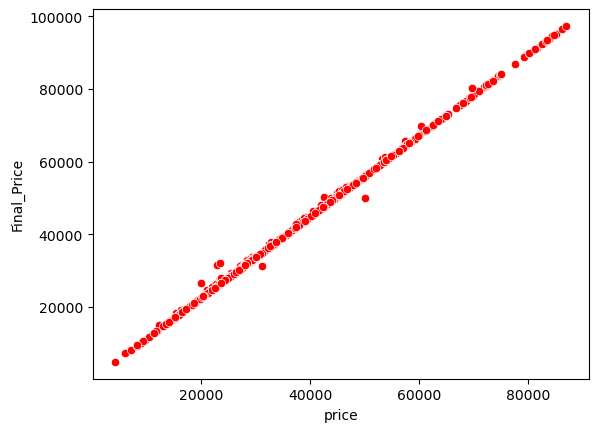

In [172]:
sns.scatterplot(x ="price" ,y="Final_Price",data =data_cleaned ,color ="red")

<Axes: xlabel='Taxes_and_charges_inr', ylabel='Final_Price'>

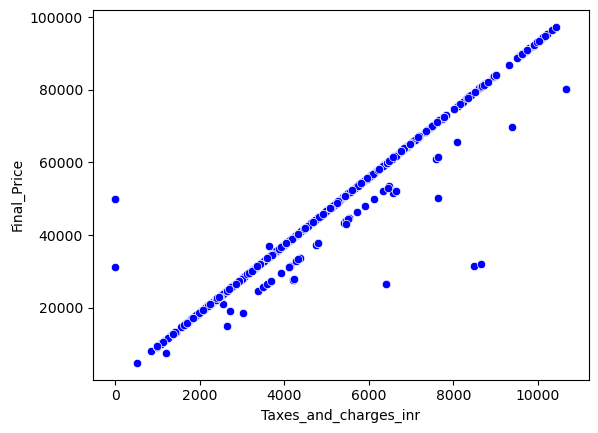

In [536]:
sns.scatterplot(x ="Taxes_and_charges_inr" ,y="Final_Price",data =data_cleaned ,color ="blue")

### Top 10 Cities by Listings – Average Price & Rating

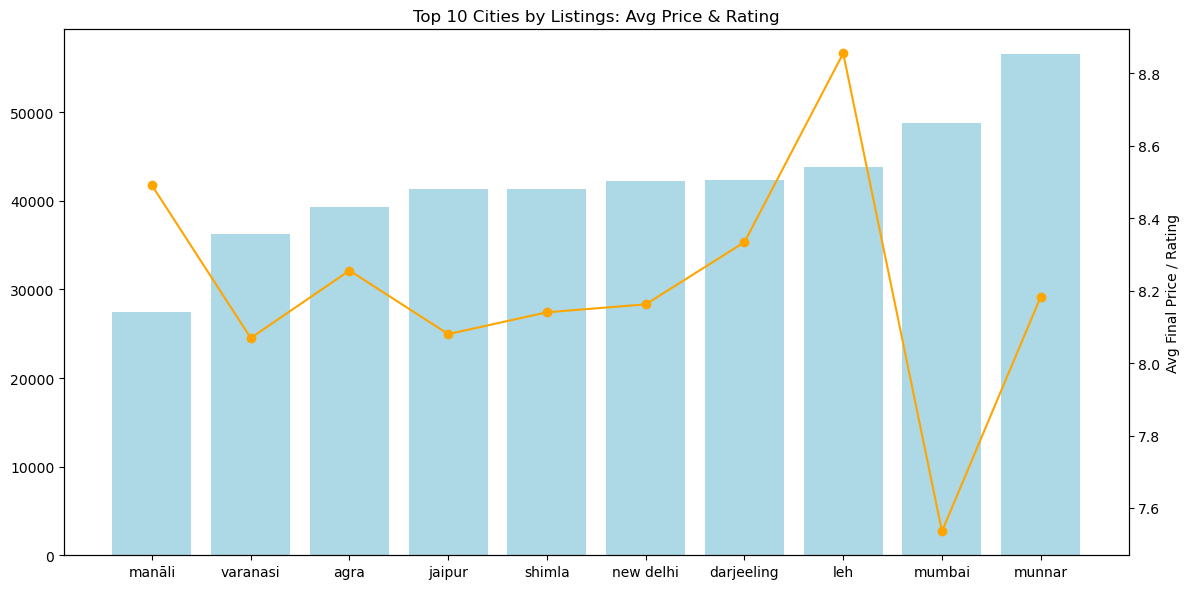

In [585]:
# Get top 10 cities by number of listings
top_cities = data_cleaned['City'].value_counts().head(10).index

# Filter dataset for top 10 cities
df_top_cities = data_cleaned[data_cleaned['City'].isin(top_cities)]

# Group by city and calculate average price and rating
city_summary = df_top_cities.groupby('City')[['Final_Price', 'Rating']].mean().sort_values(by='Final_Price')

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for average price
plt.bar(city_summary.index, city_summary['Final_Price'], color='lightblue', label='Avg Final Price')

# Add second y-axis for ratings
plt.twinx()
plt.plot(city_summary.index, city_summary['Rating'], color='orange', marker='o', label='Avg Rating')

# Title and labels
plt.title('Top 10 Cities by Listings: Avg Price & Rating')
plt.xlabel('City')
plt.ylabel('Avg Final Price / Rating')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


### `Numerical vs Categorical`

We compare numerical variables with categorical variables to show the relationship between them. Compare numerical variable with different categorical variables and plot different plots to find the relation. Bar chart, Box plot, Violin plot used in numerical and categorical columns.

In [560]:
def catego_num(df , numerical_df , categorical_df):
    for num in numerical_df:
        group_data = df.groupby(categorical_df)[num].agg(['mean' , 'median' , 'min' , 'max'])
        print(group_data)

        plt.figure(figsize = (17,15))

        top10_categories = df[categorical_df].value_counts(ascending = False).index[:10]
        top10_df = df[df[categorical_df].isin(top10_categories)]
        #barplot
        plt.subplot(3,2,1)
        sns.barplot(data = top10_df , x = num , y = categorical_df)
        plt.title(f'Bar Plot of {num} vs {categorical_df}')
        
        #KDE Plot
        plt.subplot(3,2,2)
        sns.kdeplot(data = top10_df , x = num , hue = categorical_df)
        plt.title(f'KDE Plot of {num} vs {categorical_df}')

        #Scatter Plot
        plt.subplot(3,2,3)
        sns.scatterplot(data = top10_df , x = num , y = categorical_df)
        plt.title(f'Scatter Plot of {num} vs {categorical_df}')

        #Voilin Plot
        plt.subplot(3,2,4)
        sns.violinplot(data = top10_df , x = num , y = categorical_df)
        plt.title(f'Violin Plot of {num} vs {categorical_df}')

        
        
    
        plt.tight_layout()

In [562]:
categorical_data

['Property_name',
 'Location',
 'Review',
 'Type_of_stay',
 'City',
 'Recommended for']

                             mean  median  min  max
Location                                           
agra                     8.315909    8.20  6.2  9.6
ajmer road, jaipur       7.900000    7.90  7.5  8.3
aleo, manāli             8.900000    8.90  8.9  8.9
alleppey                 9.100000    9.10  9.1  9.1
alwaye                   9.700000    9.70  9.7  9.7
...                           ...     ...  ...  ...
vythiri                  8.400000    8.40  8.4  8.4
wandūr                   8.200000    8.20  8.2  8.2
wayanad                  7.900000    7.90  7.9  7.9
west delhi, new delhi    8.200000    8.20  8.2  8.2
western suburbs, mumbai  7.262500    7.25  6.0  9.0

[81 rows x 4 columns]
                                 mean   median      min      max
Location                                                        
agra                     36125.727273  31194.5  11117.0  81205.0
ajmer road, jaipur       41050.000000  41050.0  26600.0  55500.0
aleo, manāli             13500.500000  14

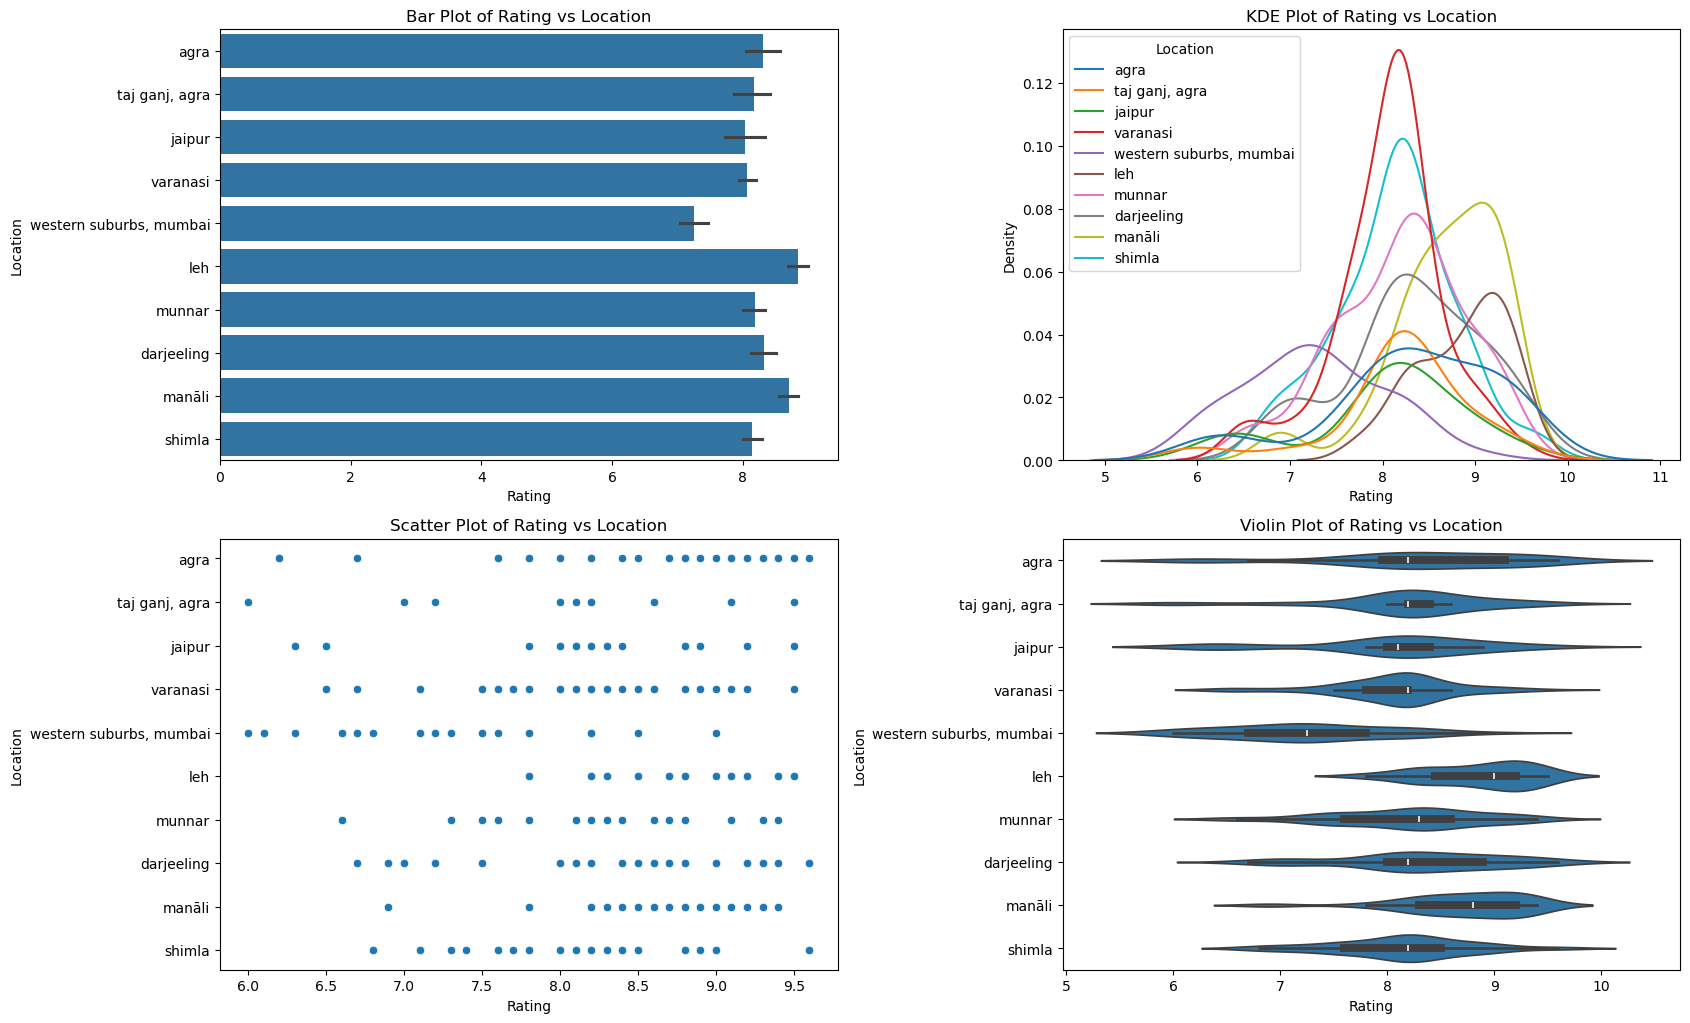

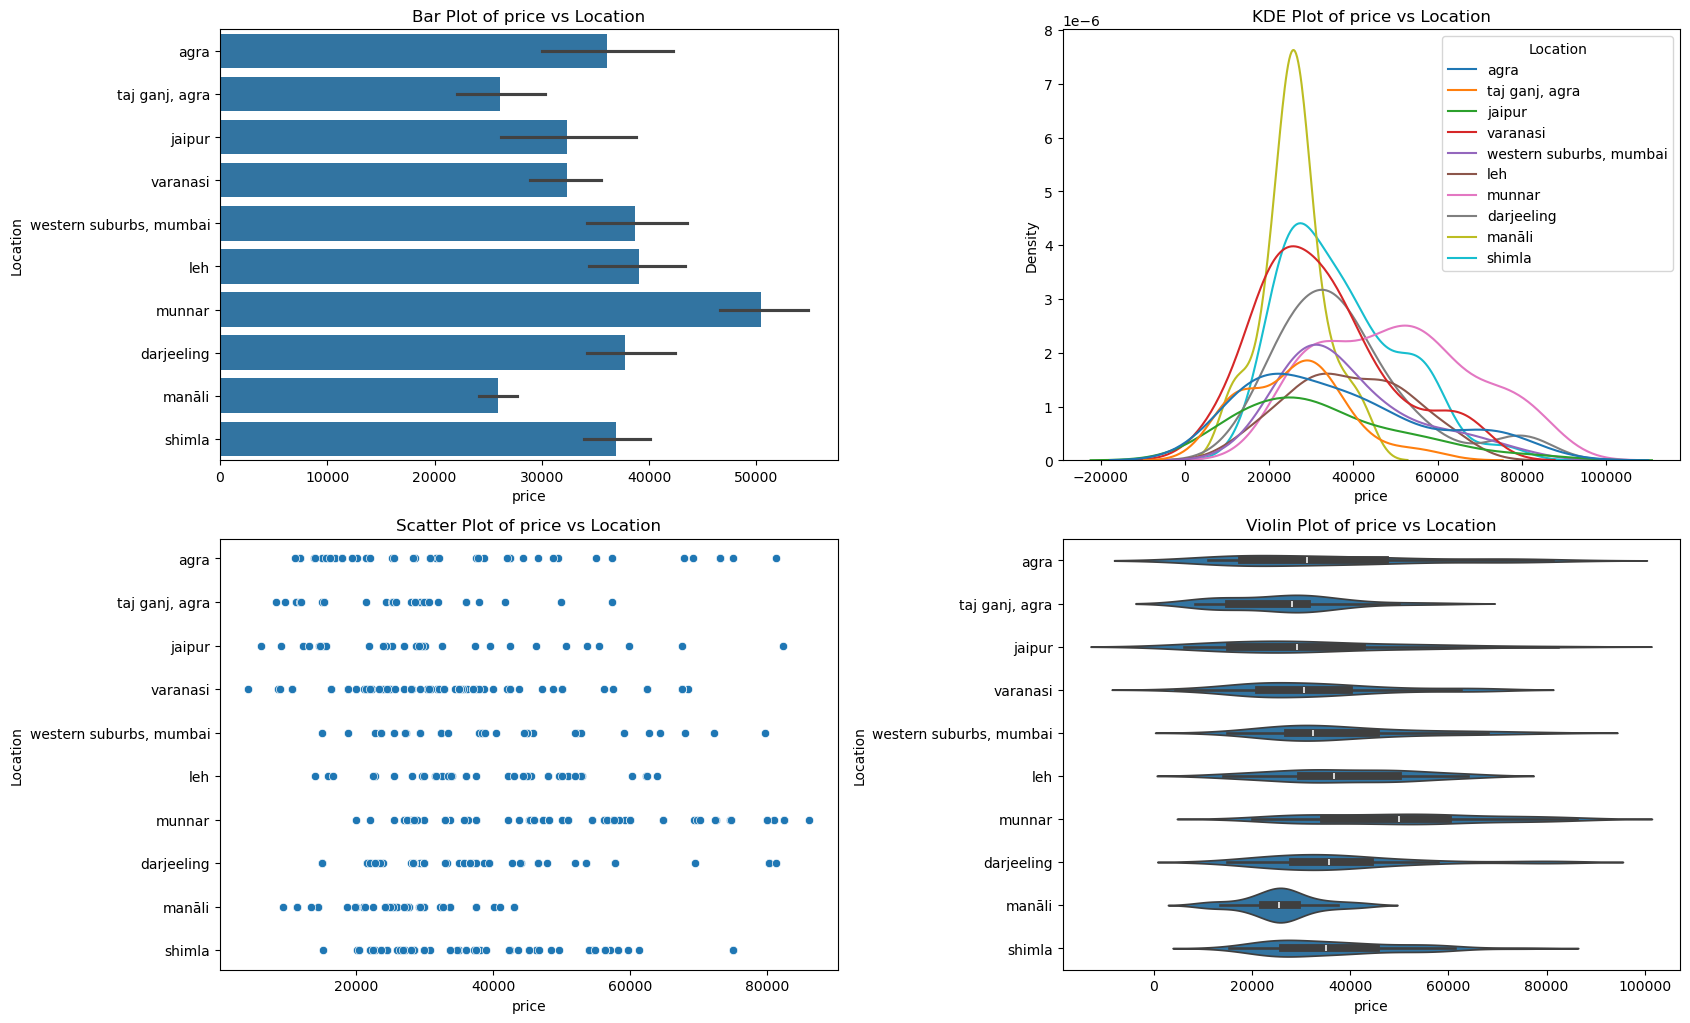

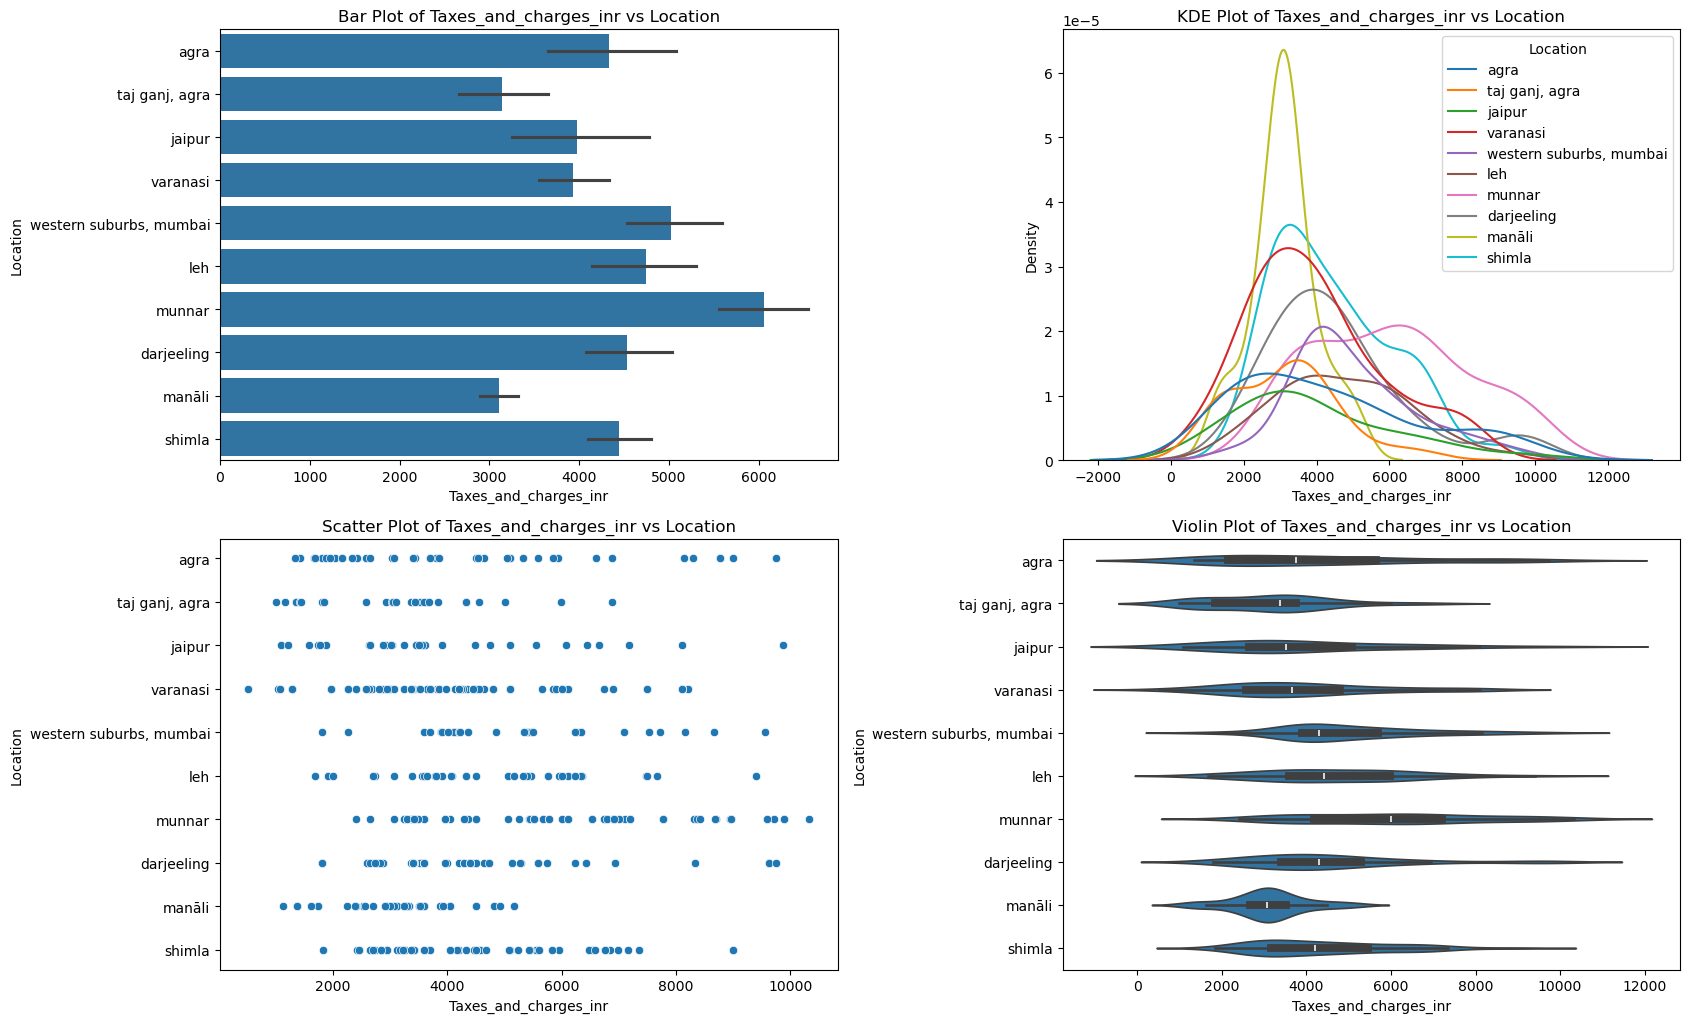

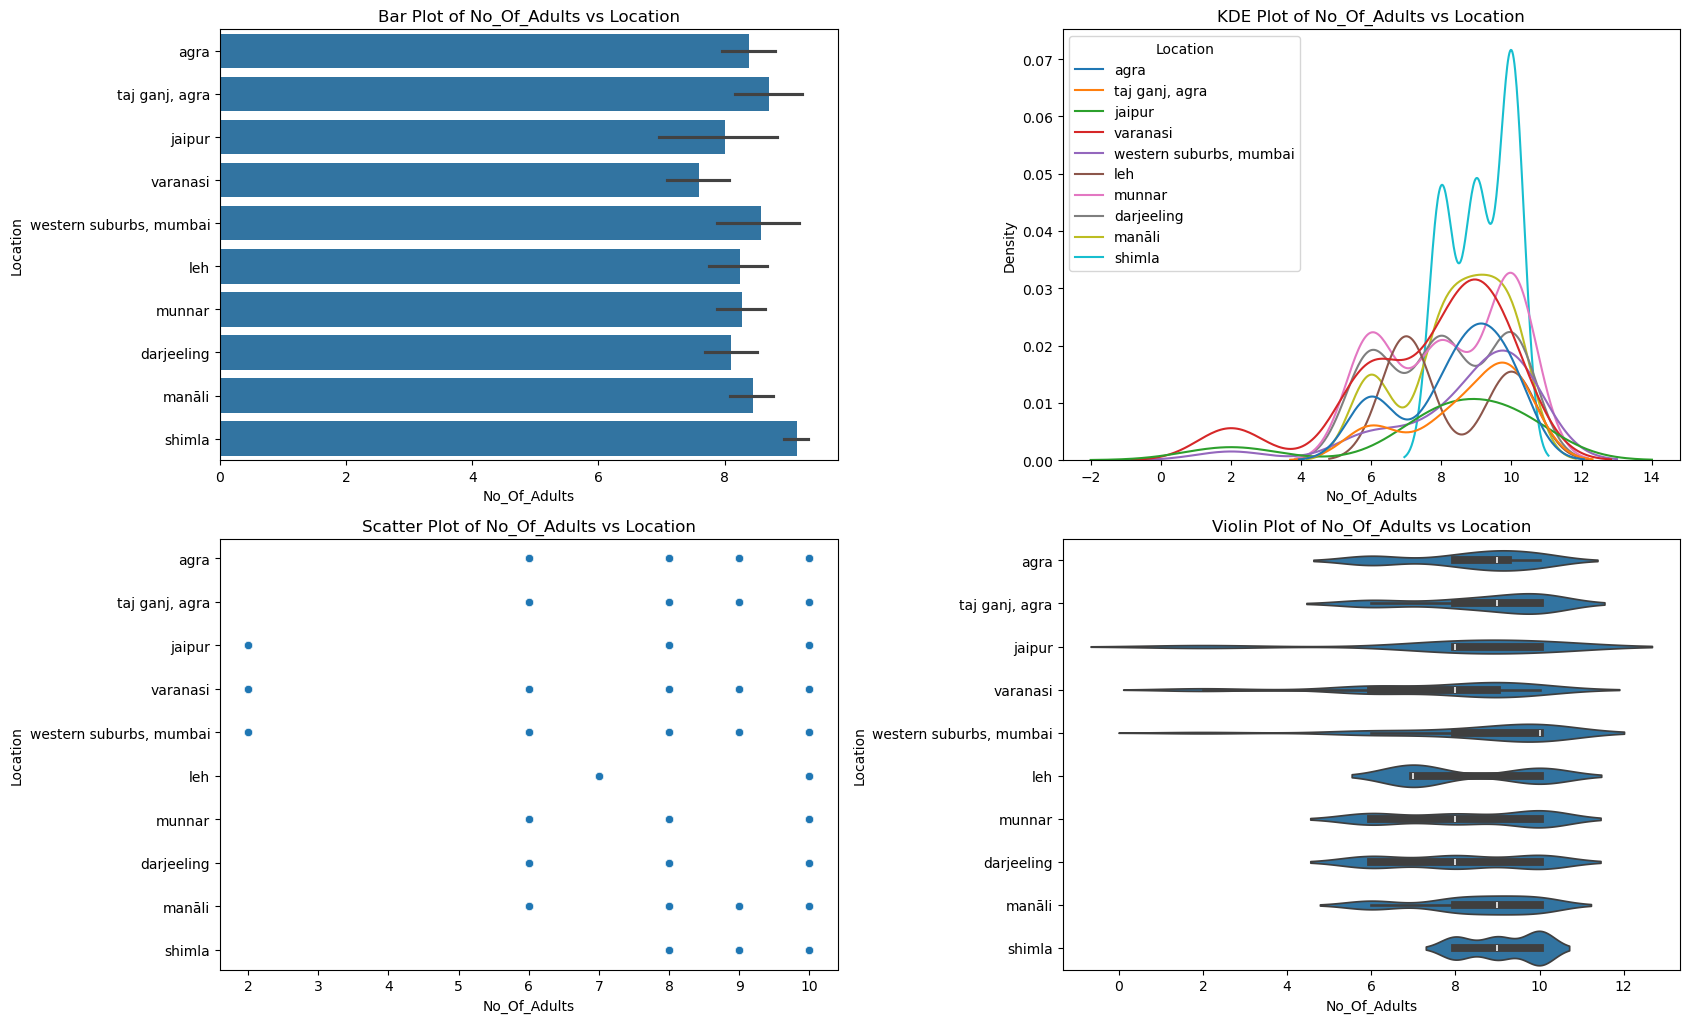

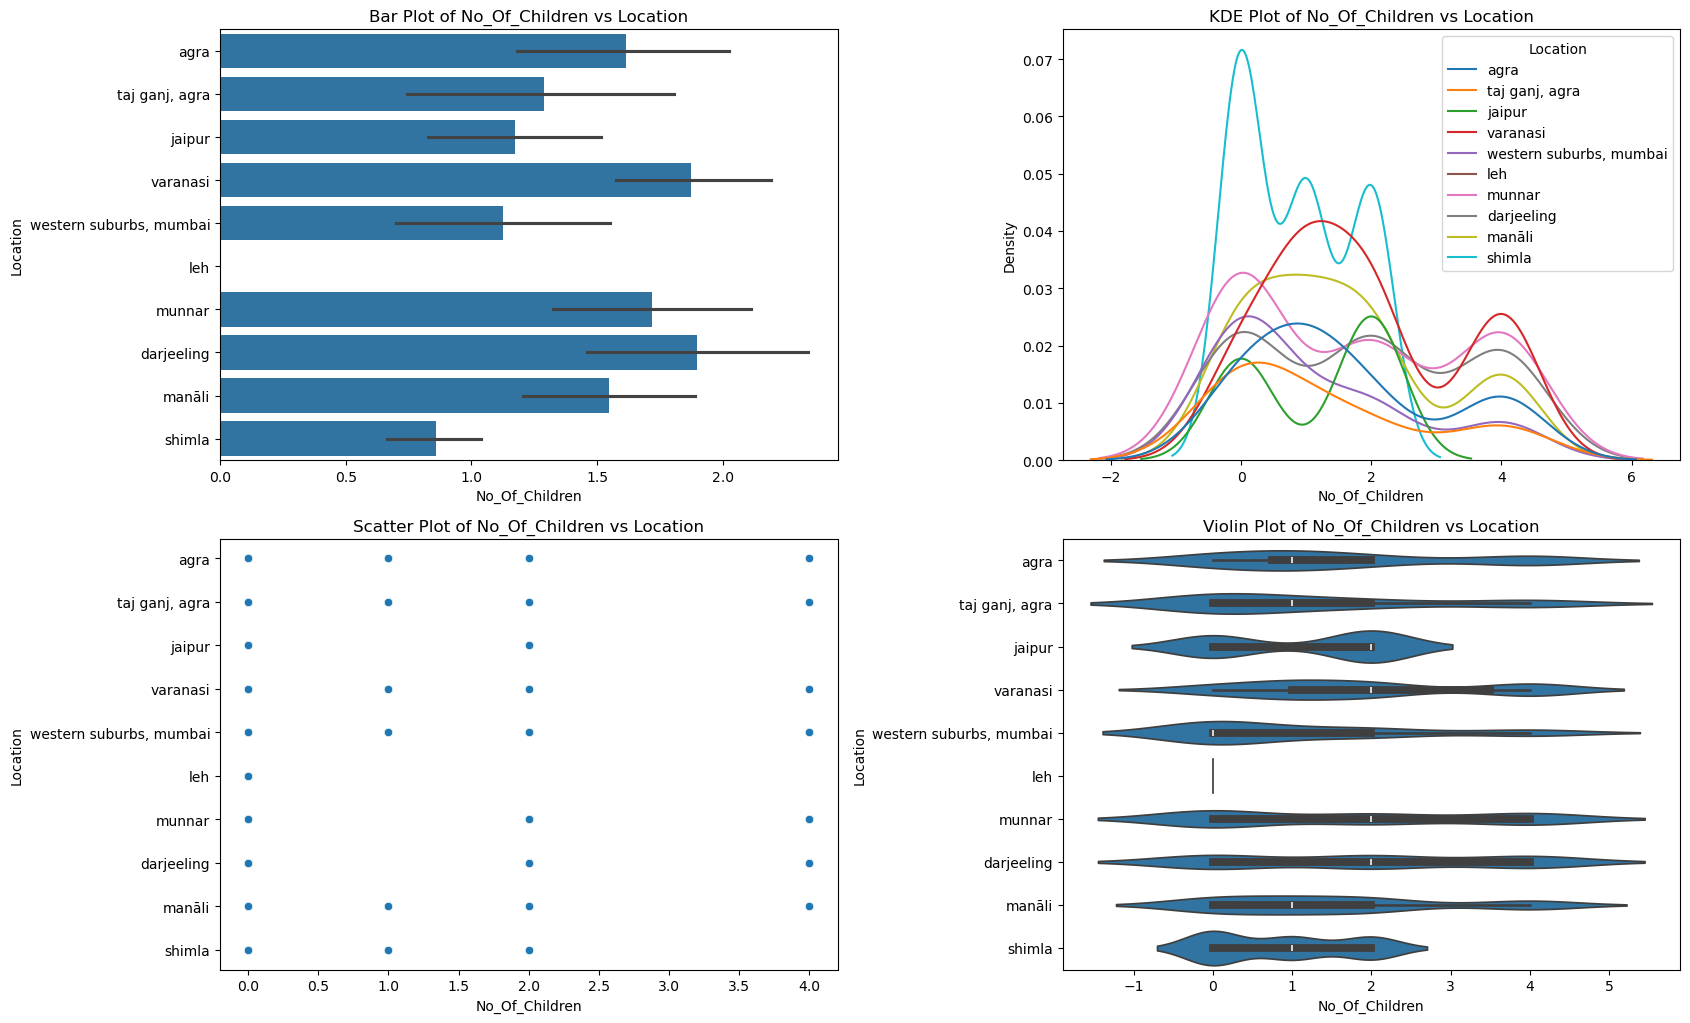

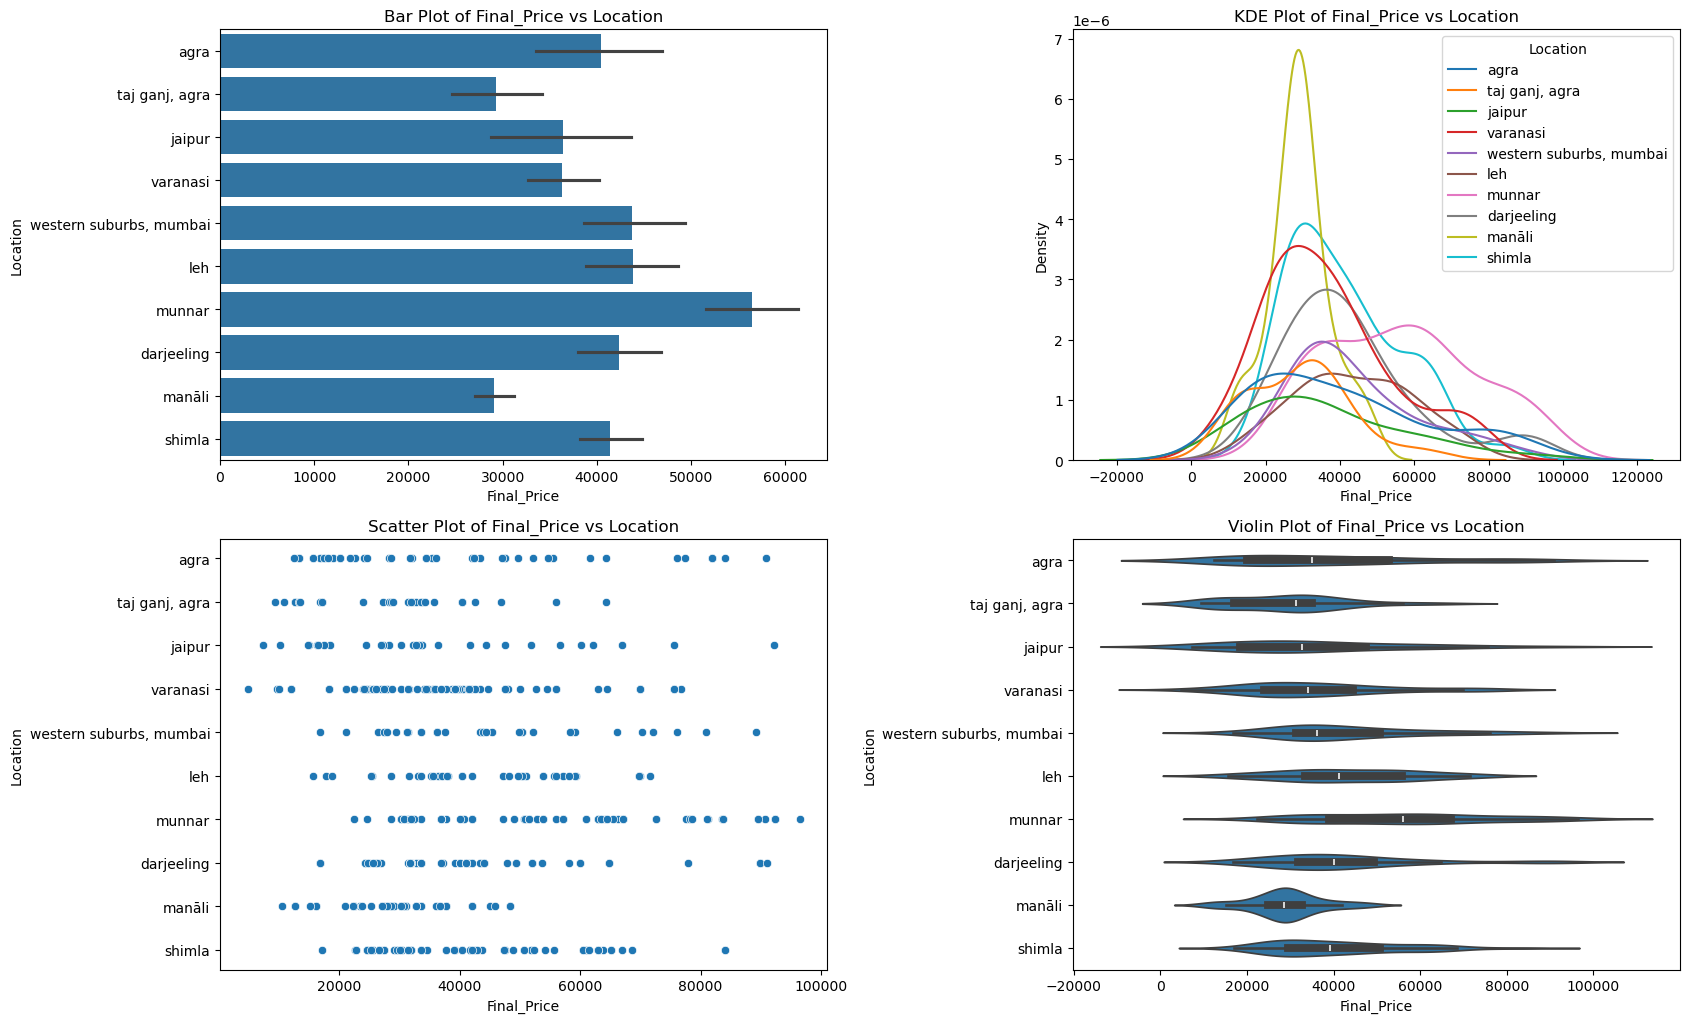

In [564]:
catego_num(data_cleaned , numerical_data , "Location")

                  mean  median  min  max
Review                                  
No Review     8.126718     8.2  6.4  9.4
exceptional   8.832653     8.2  8.2  9.9
fabulous      8.757447     8.8  8.6  8.9
good          7.490071     7.6  7.0  7.9
review score  6.504286     6.6  6.0  6.9
superb        9.198333     9.2  9.0  9.4
very good     8.261047     8.3  8.0  8.5
                      mean   median      min      max
Review                                               
No Review     39695.587786  32489.0   8316.0  84375.0
exceptional   31540.326531  28723.0   4275.0  84700.0
fabulous      35530.819149  31932.5   9000.0  83200.0
good          37371.503546  35600.0   7118.0  86940.0
review score  33046.785714  32387.0   6153.0  81250.0
superb        38657.541667  34900.0  15180.0  85050.0
very good     40032.110465  35750.0  13057.0  86141.0
                     mean  median     min      max
Review                                            
No Review     4628.328244  3839.0     0.0  

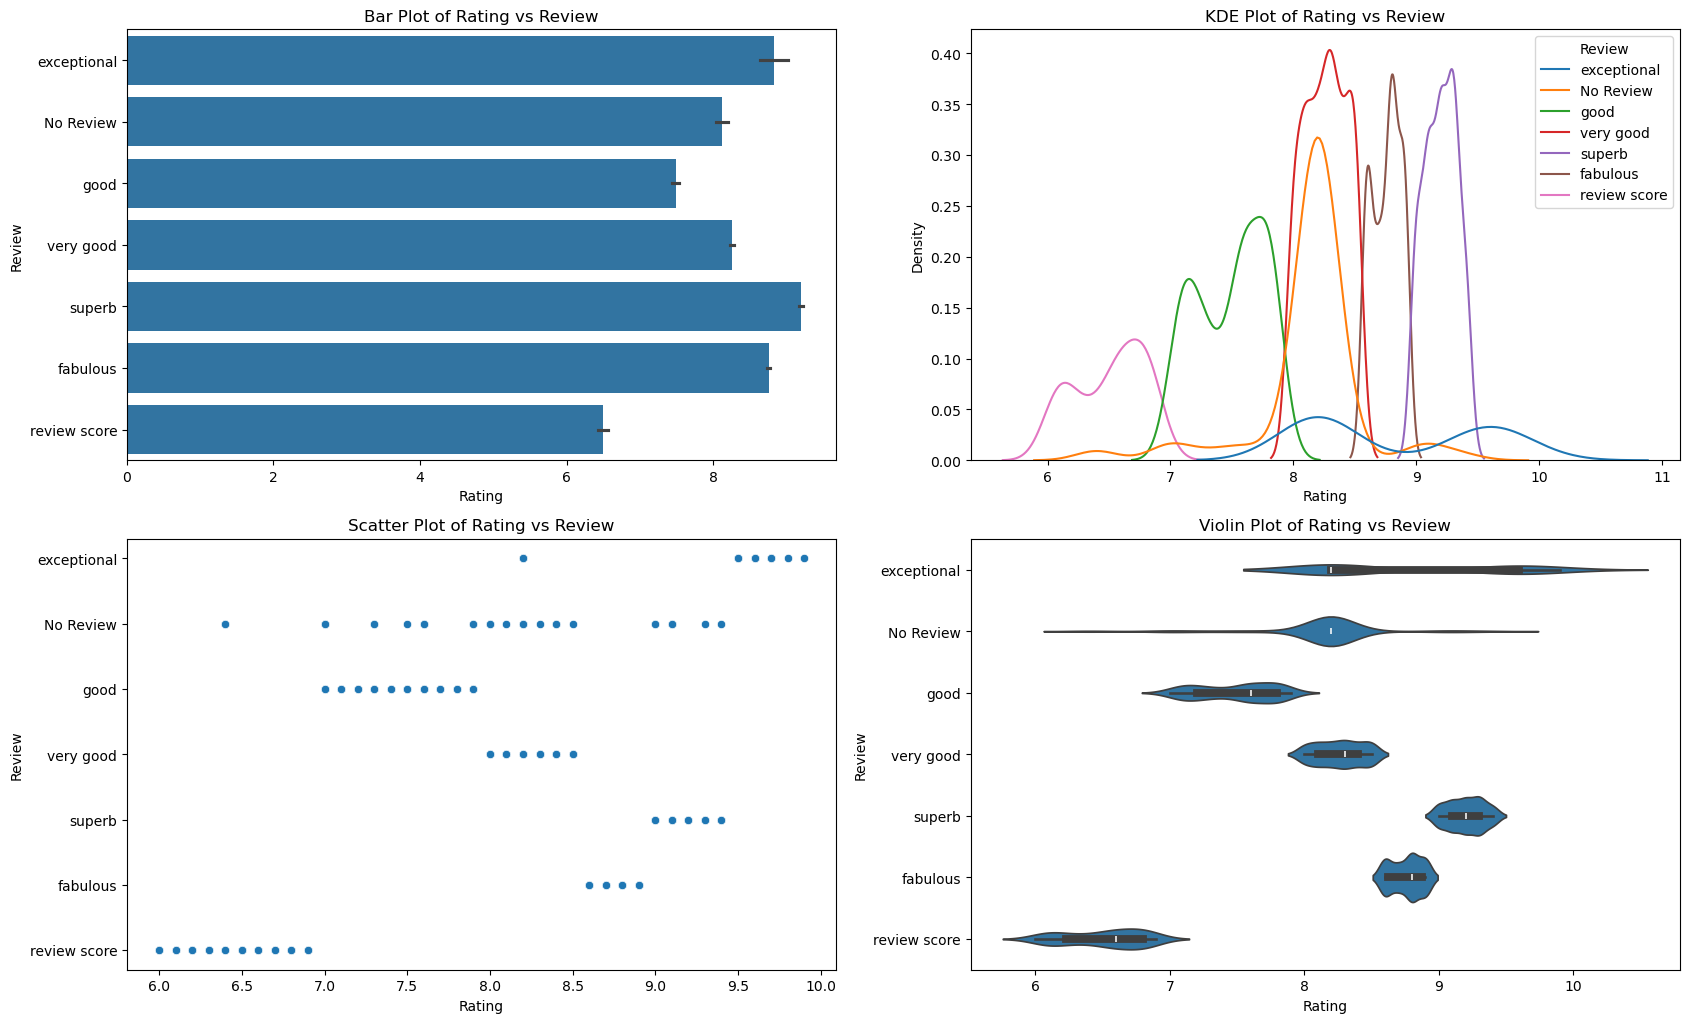

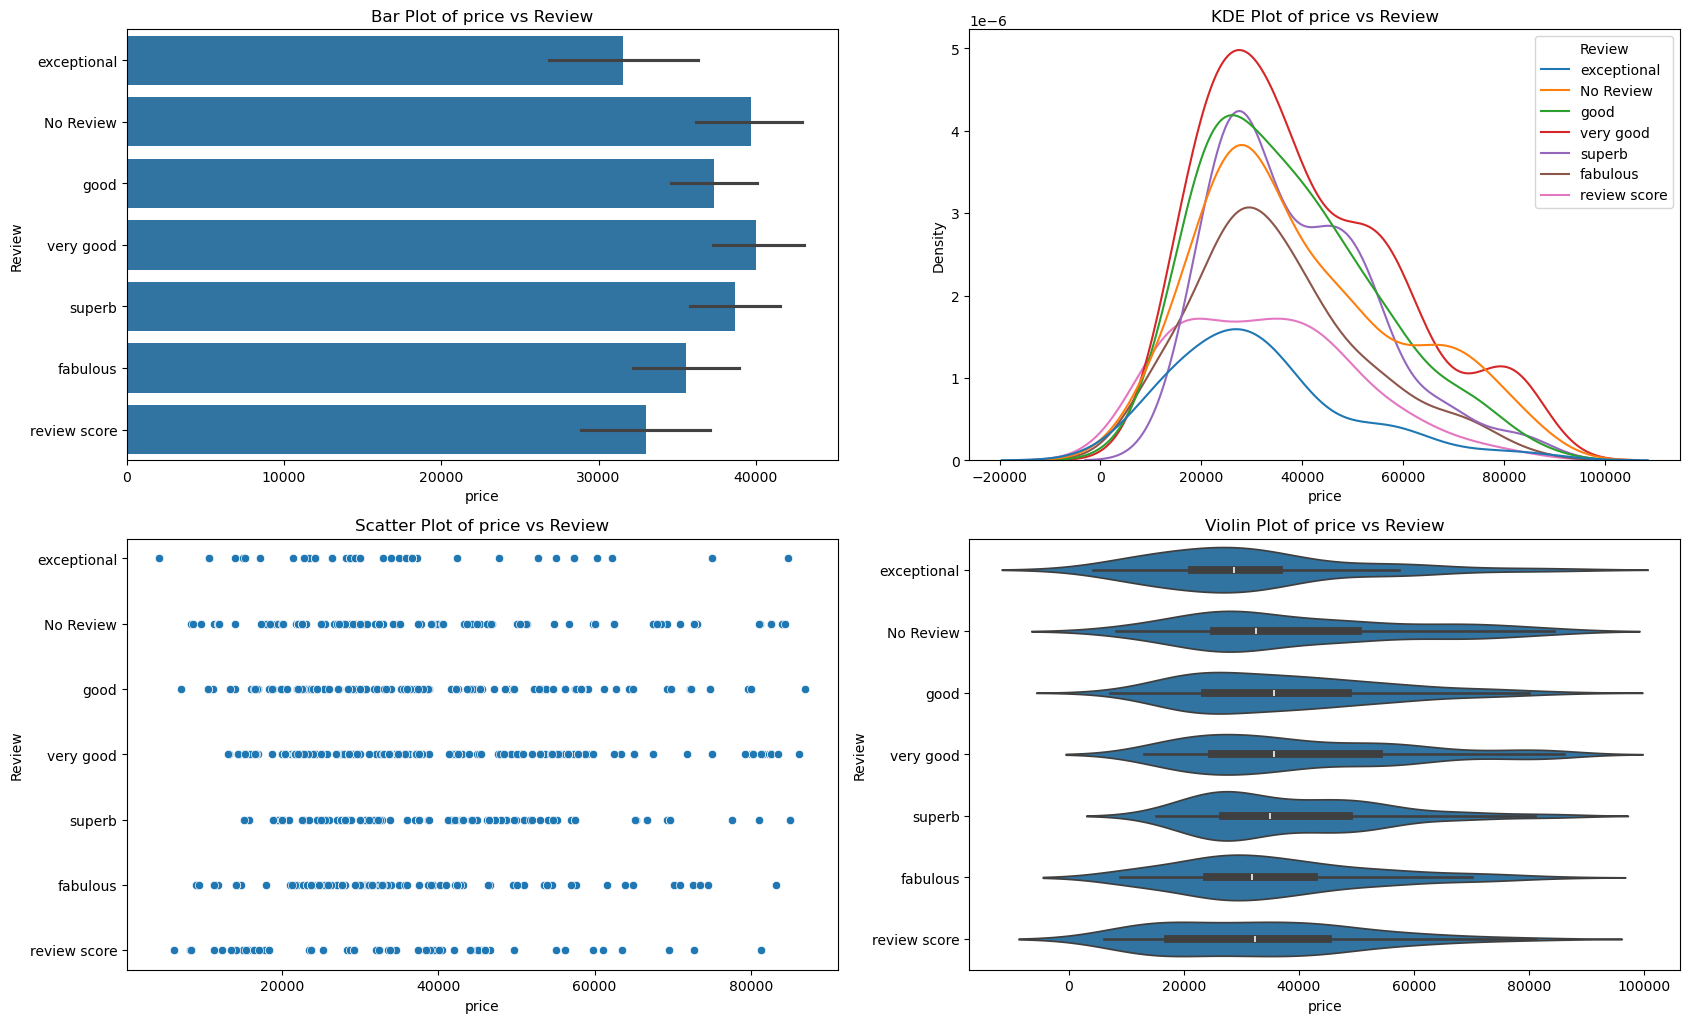

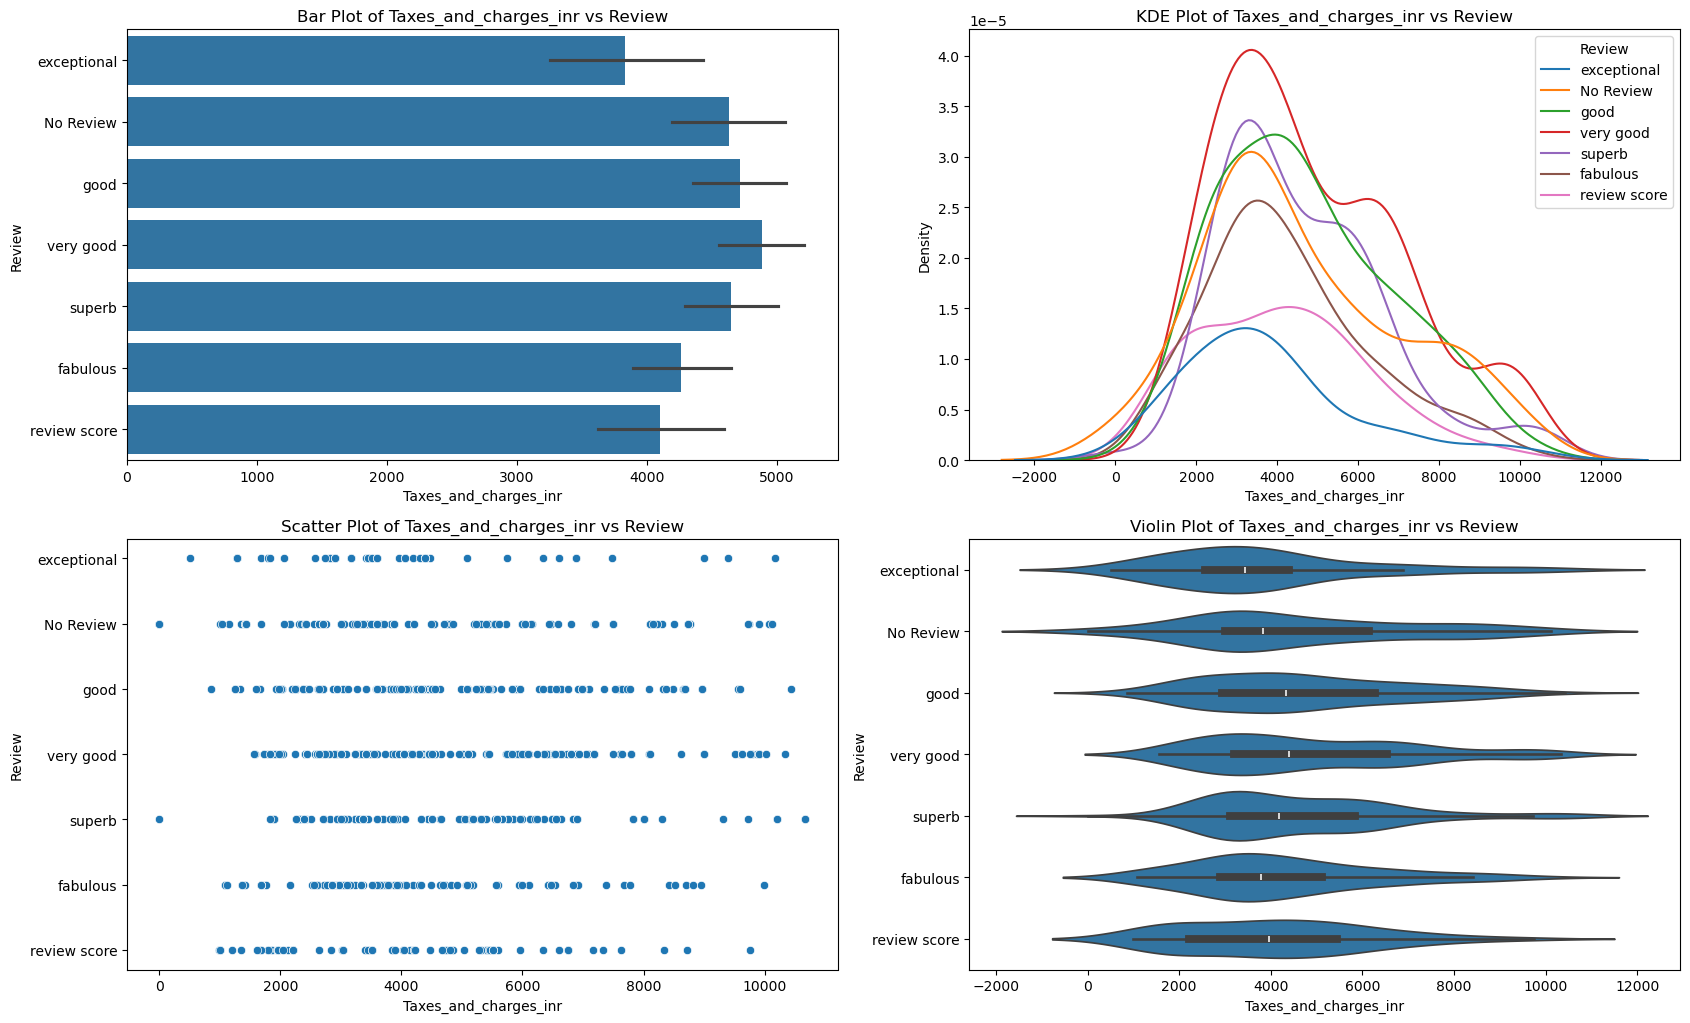

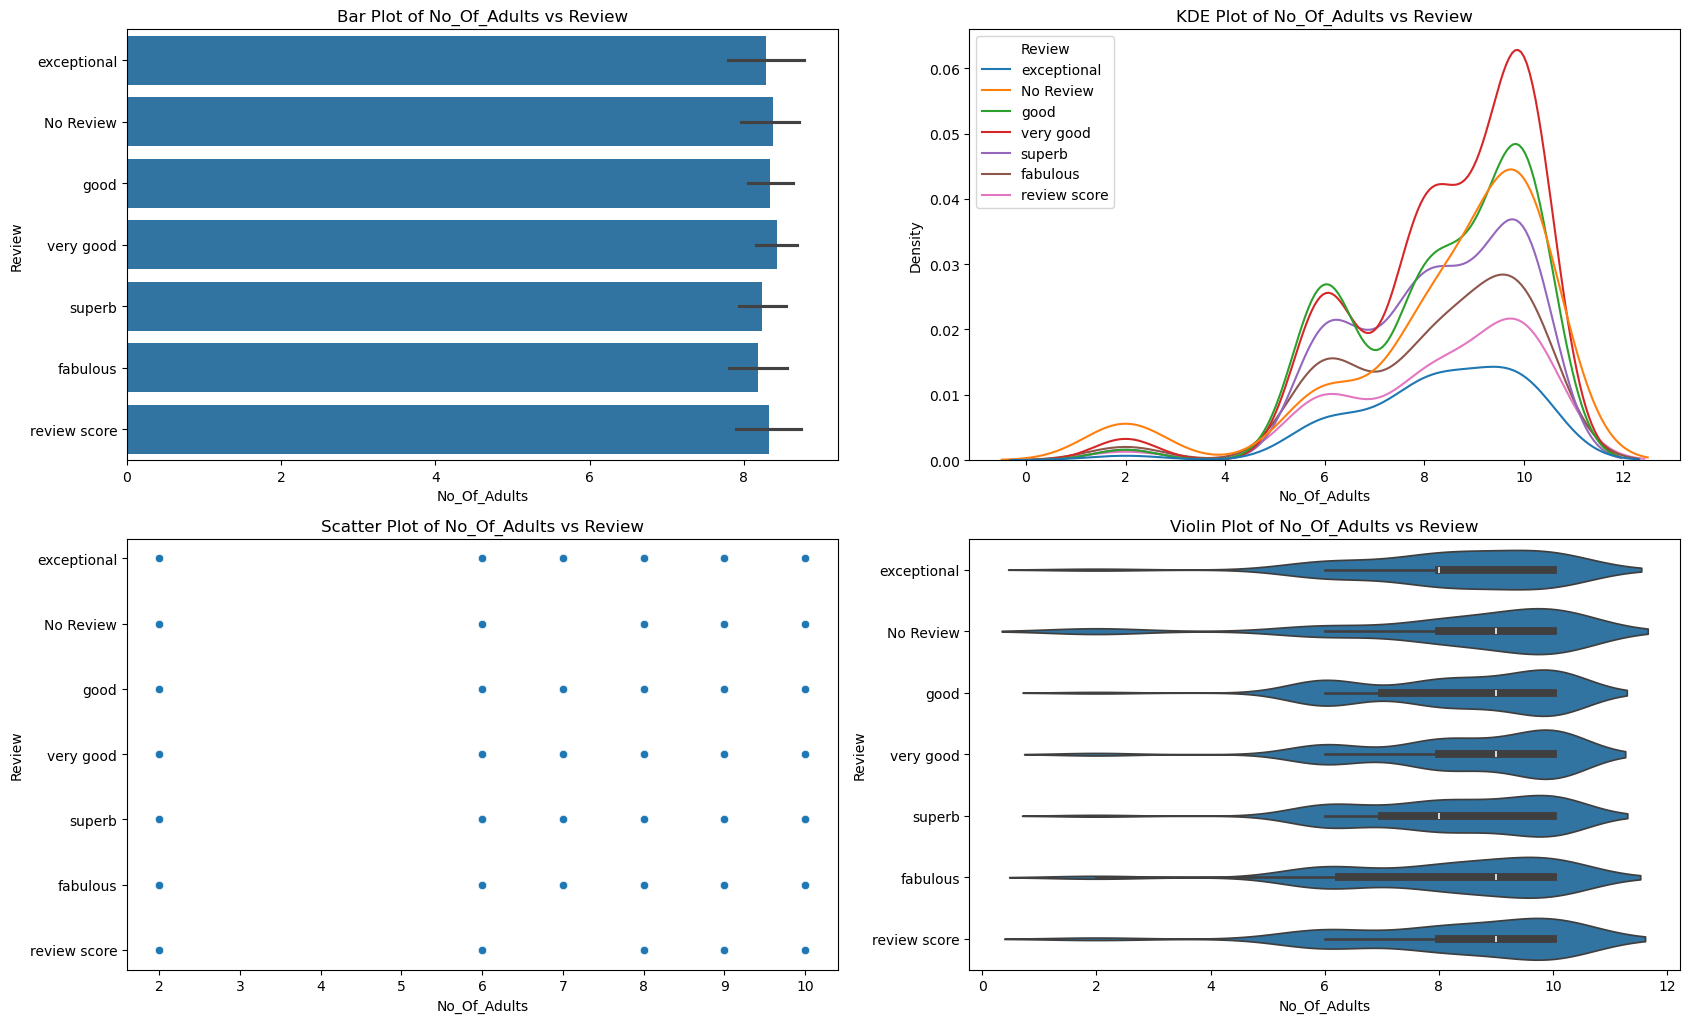

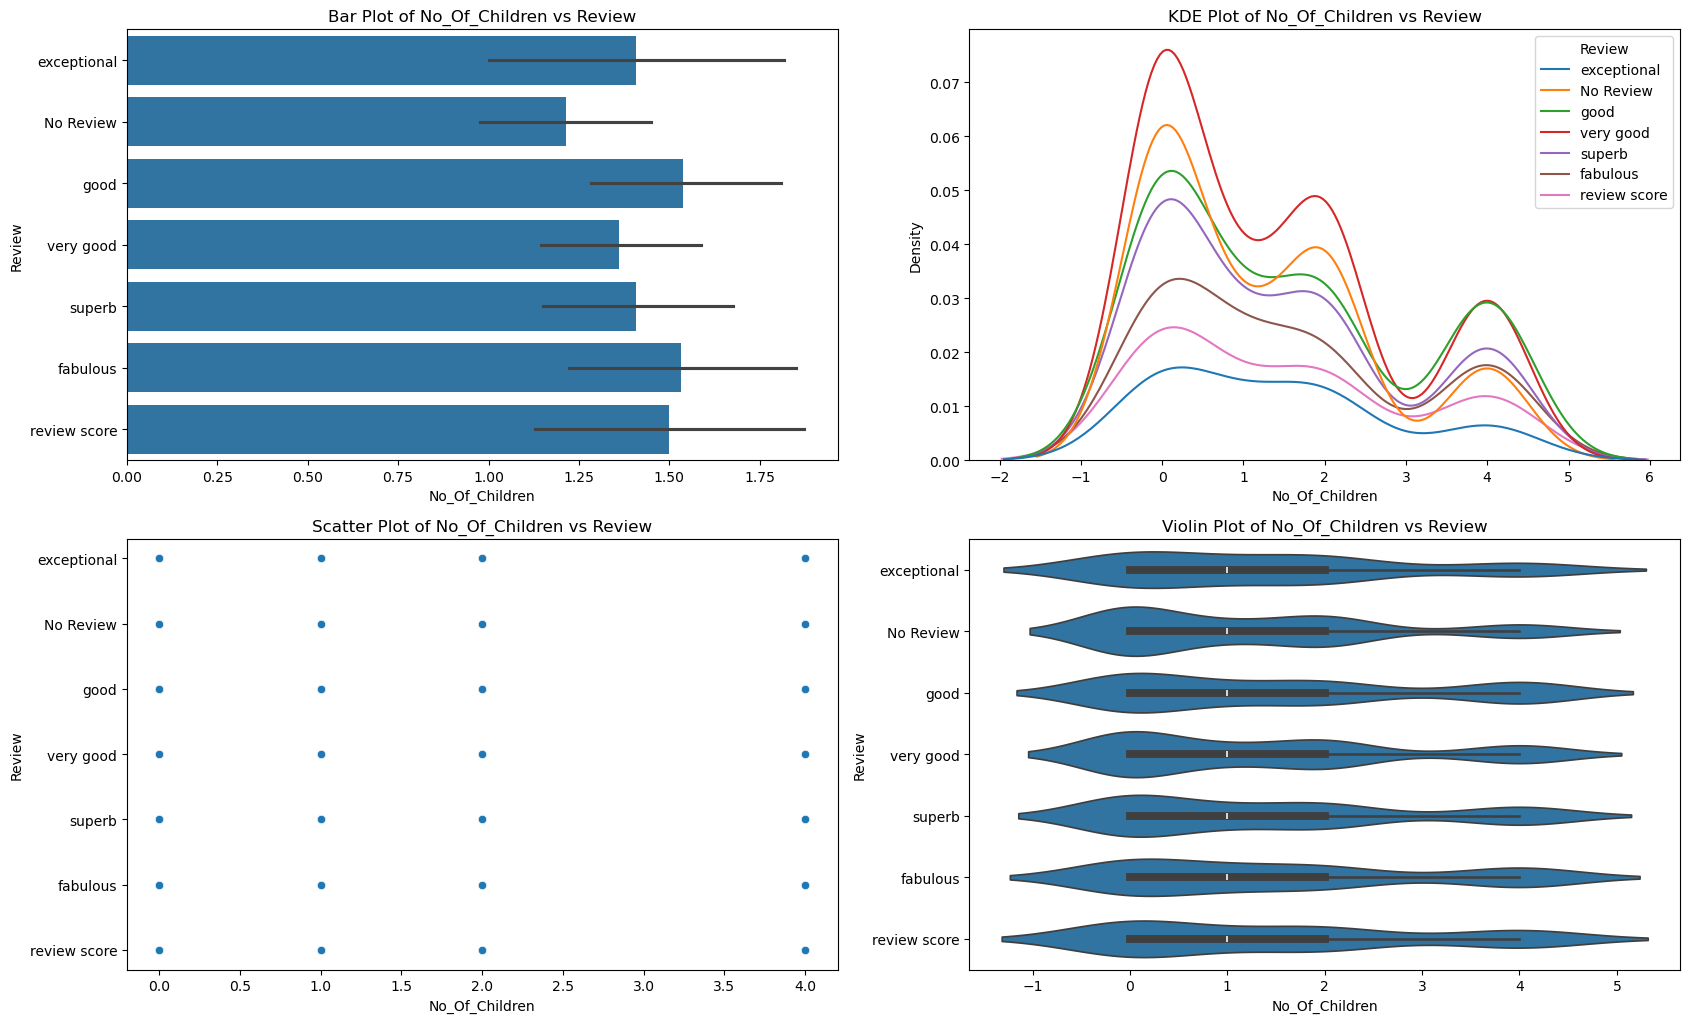

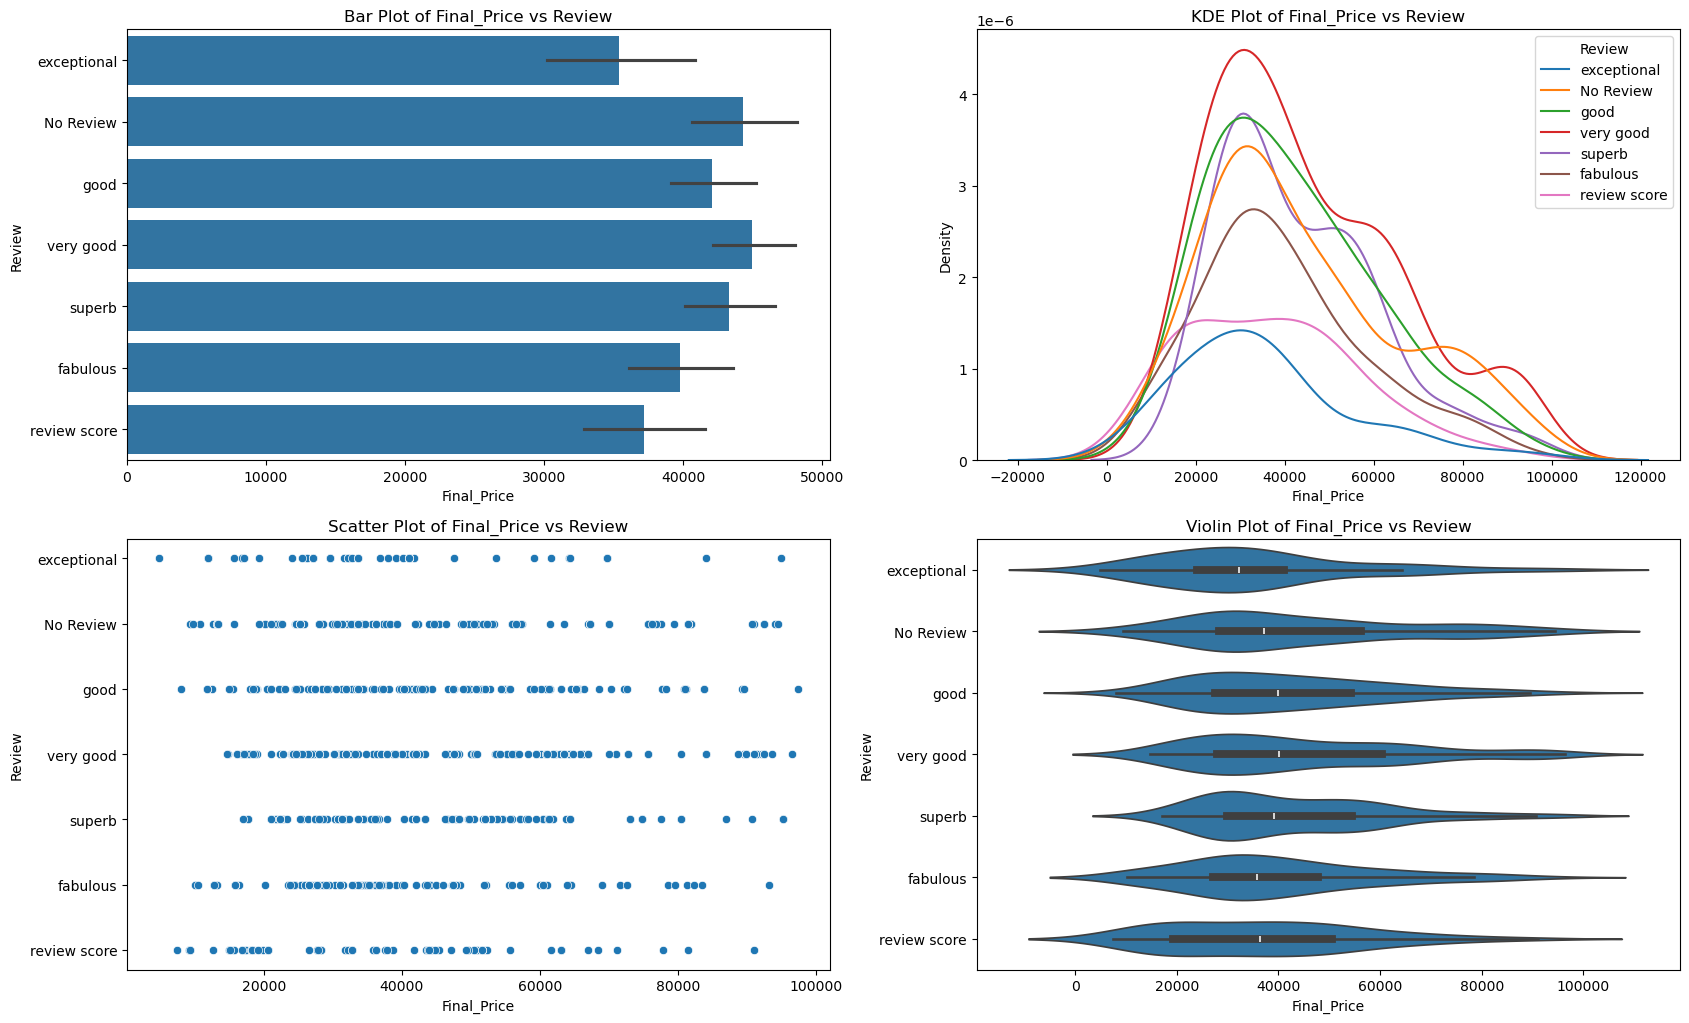

In [565]:
catego_num(data_cleaned , numerical_data , "Review")

                    mean  median  min  max
City                                      
agra            8.255556    8.20  6.0  9.6
alleppey        9.100000    9.10  9.1  9.1
alwaye          9.700000    9.70  9.7  9.7
ambalavayal     8.100000    8.10  8.1  8.1
anjuna          7.580000    7.00  7.0  9.9
arambol         9.150000    9.15  8.6  9.7
arpora          8.333333    8.60  7.4  9.0
athirappilly    8.500000    8.50  8.5  8.5
benaulim        8.700000    8.70  8.7  8.7
calangute       7.952000    8.50  6.4  9.3
candolim        7.400000    7.40  7.4  7.4
chicalim        7.100000    7.10  7.1  7.1
chimre          7.800000    7.80  7.8  7.8
cochin          7.900000    7.90  7.9  7.9
colva           8.400000    8.00  8.0  9.2
darjeeling      8.333898    8.20  6.7  9.6
deskit          9.200000    9.20  9.2  9.2
goa             9.300000    9.30  9.3  9.3
guruvāyūr       7.600000    7.60  7.6  7.6
hundar          8.200000    8.20  8.2  8.2
jaipur          8.080000    8.10  6.3  9.5
kalpetta   

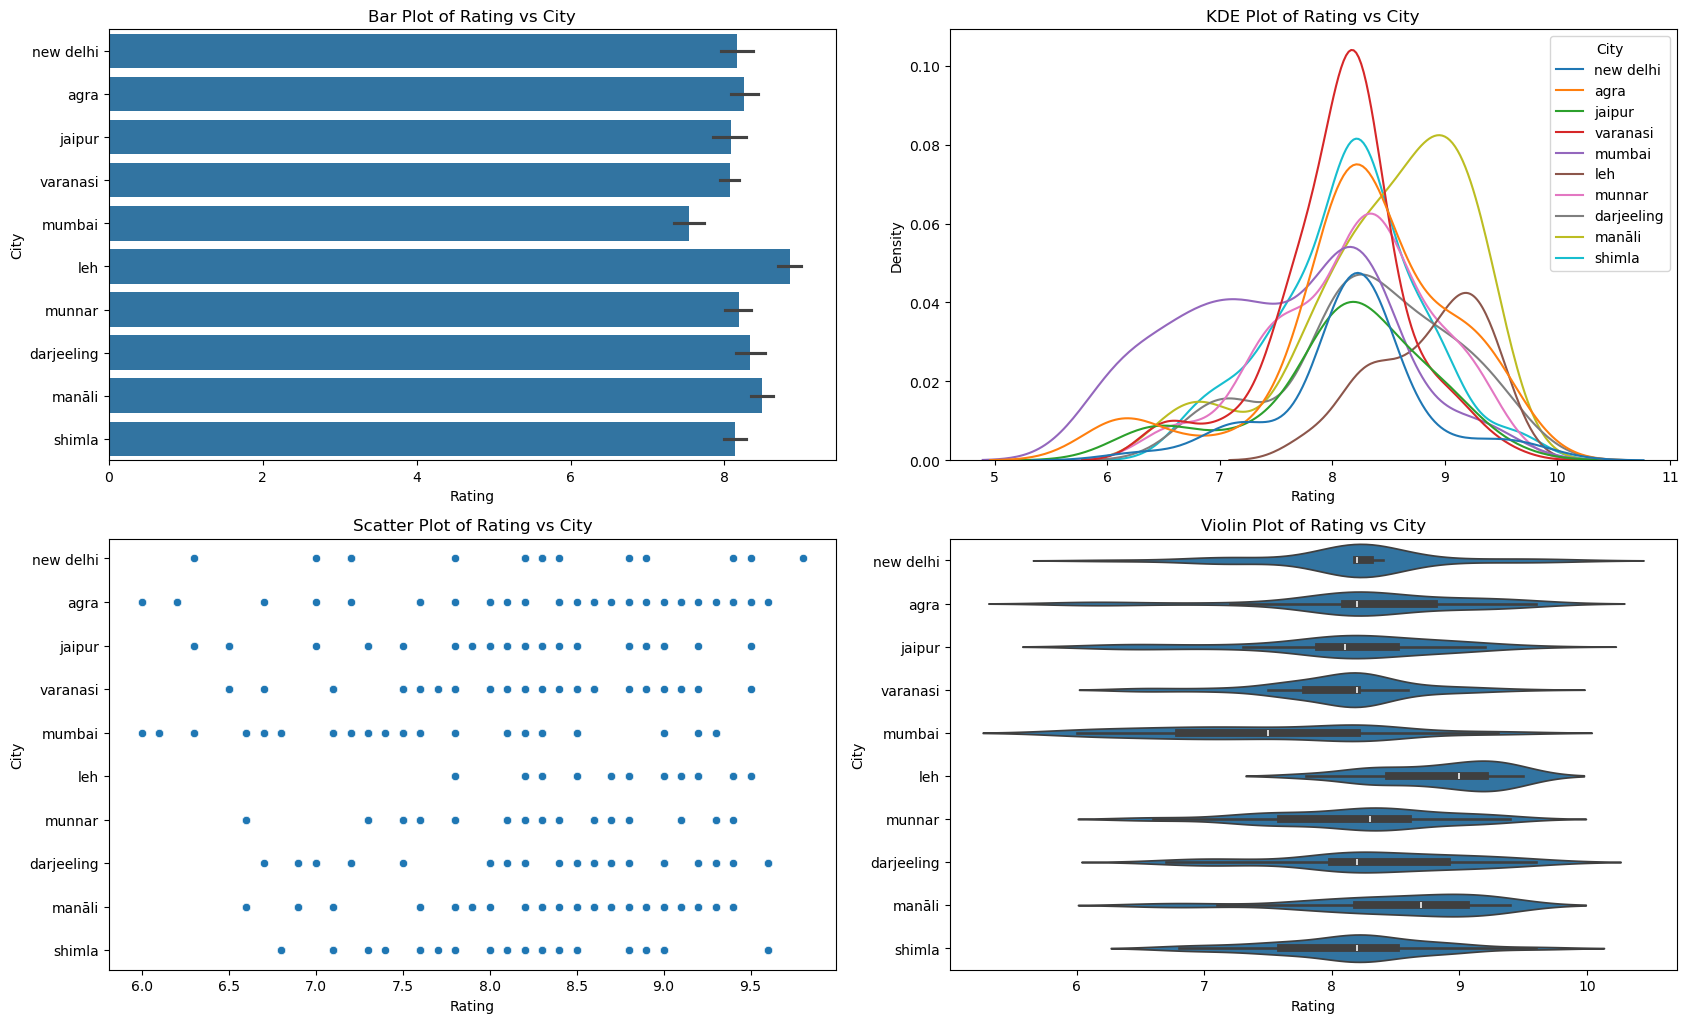

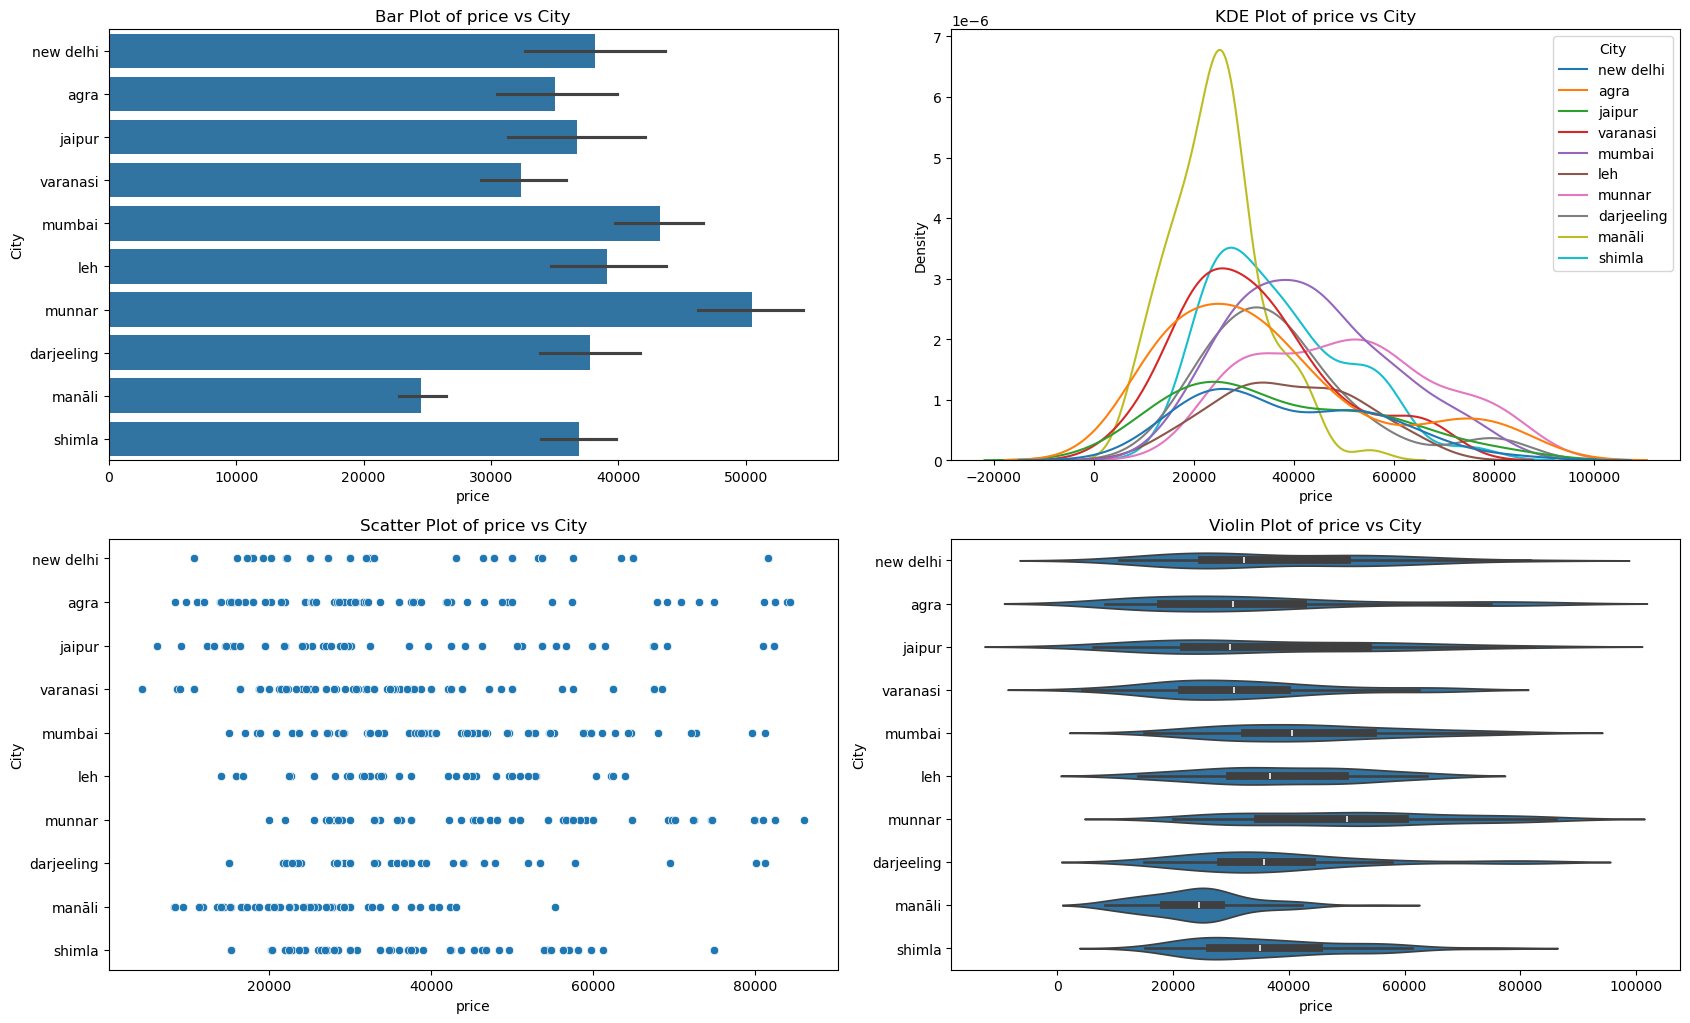

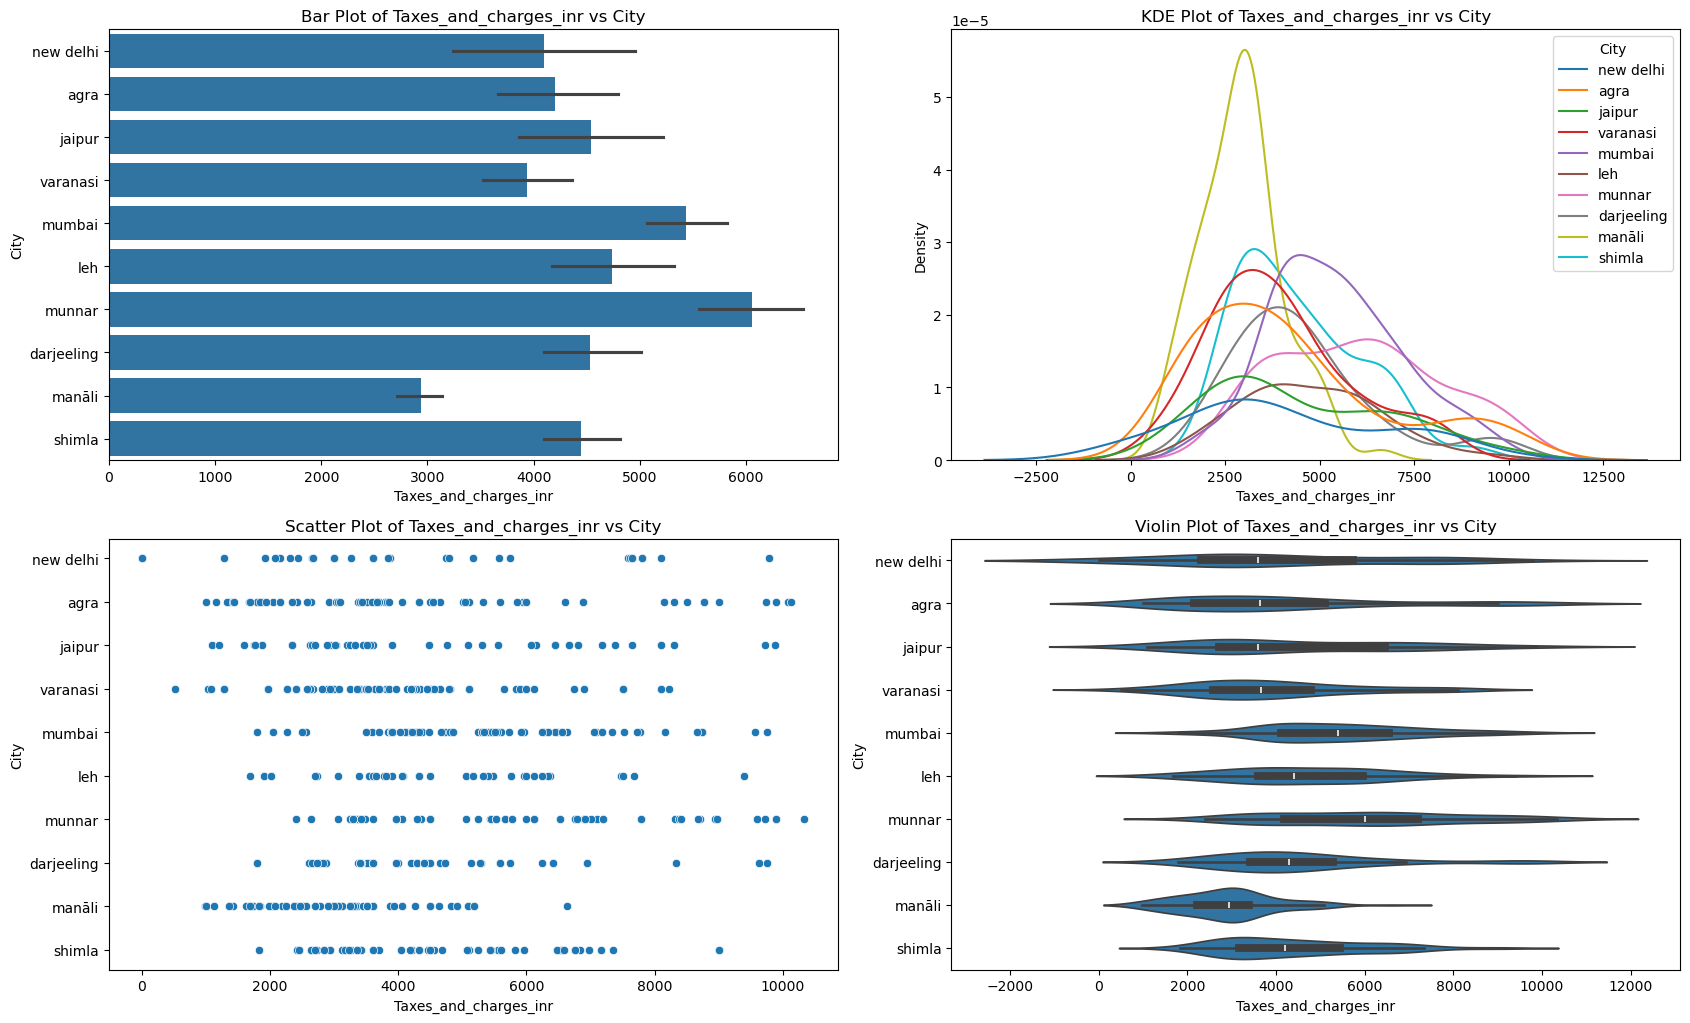

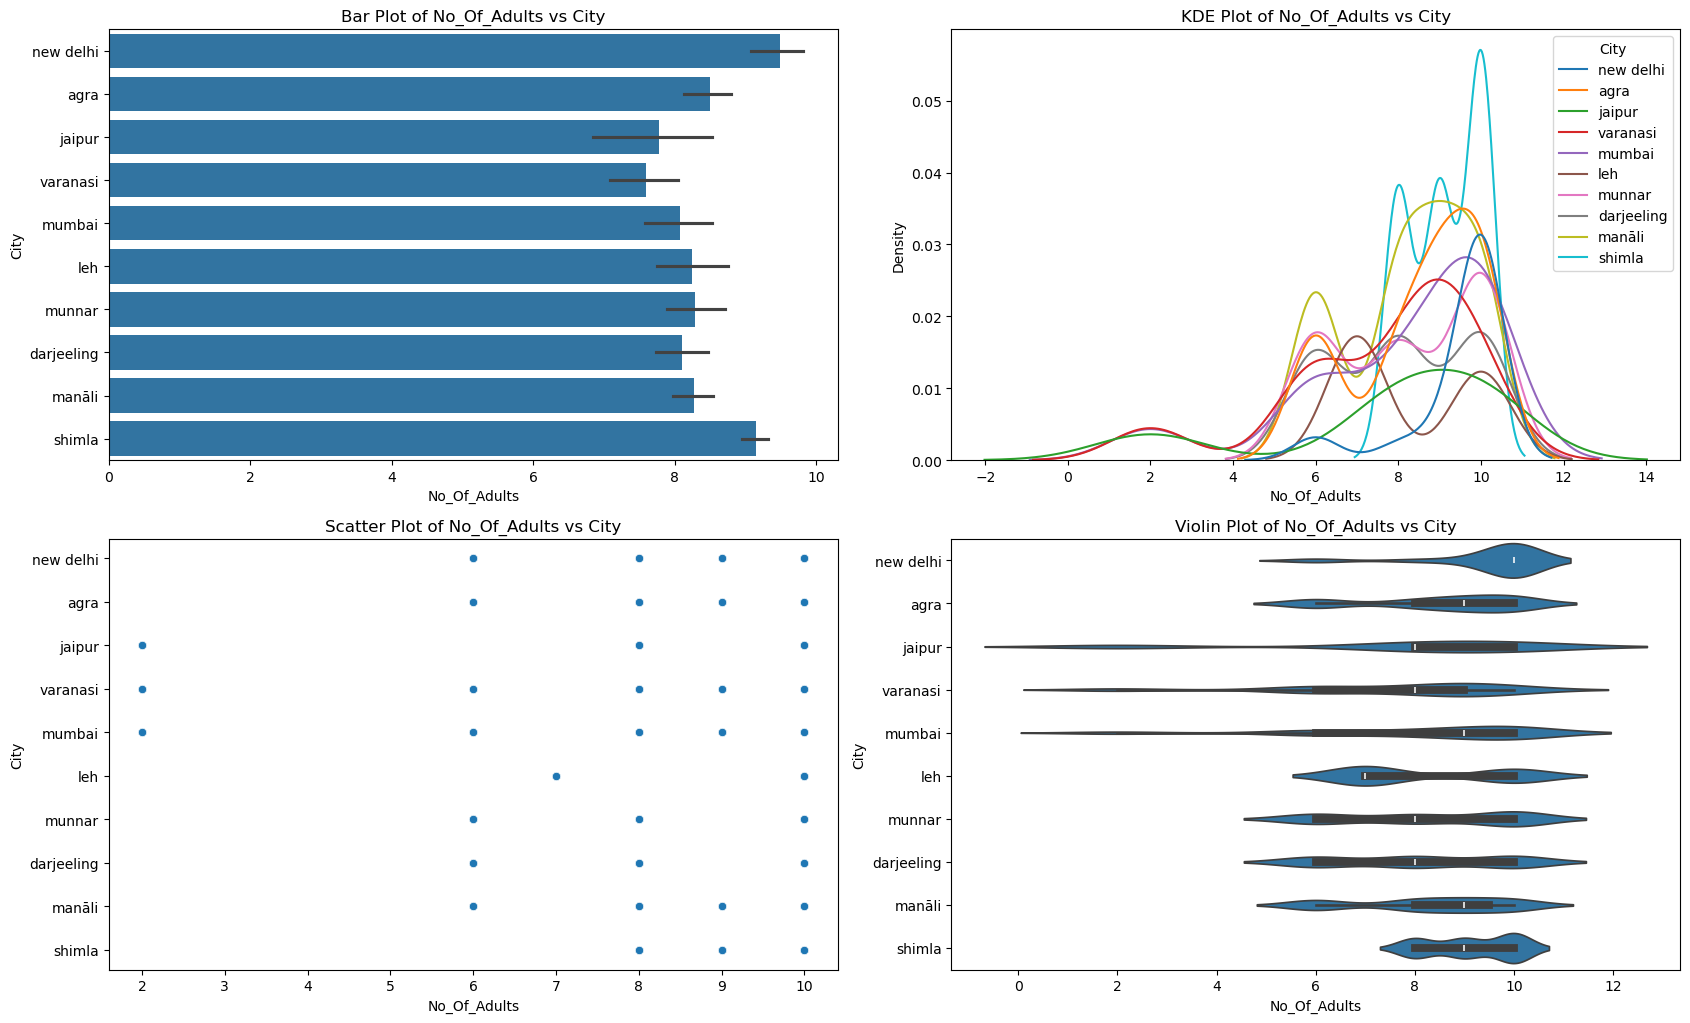

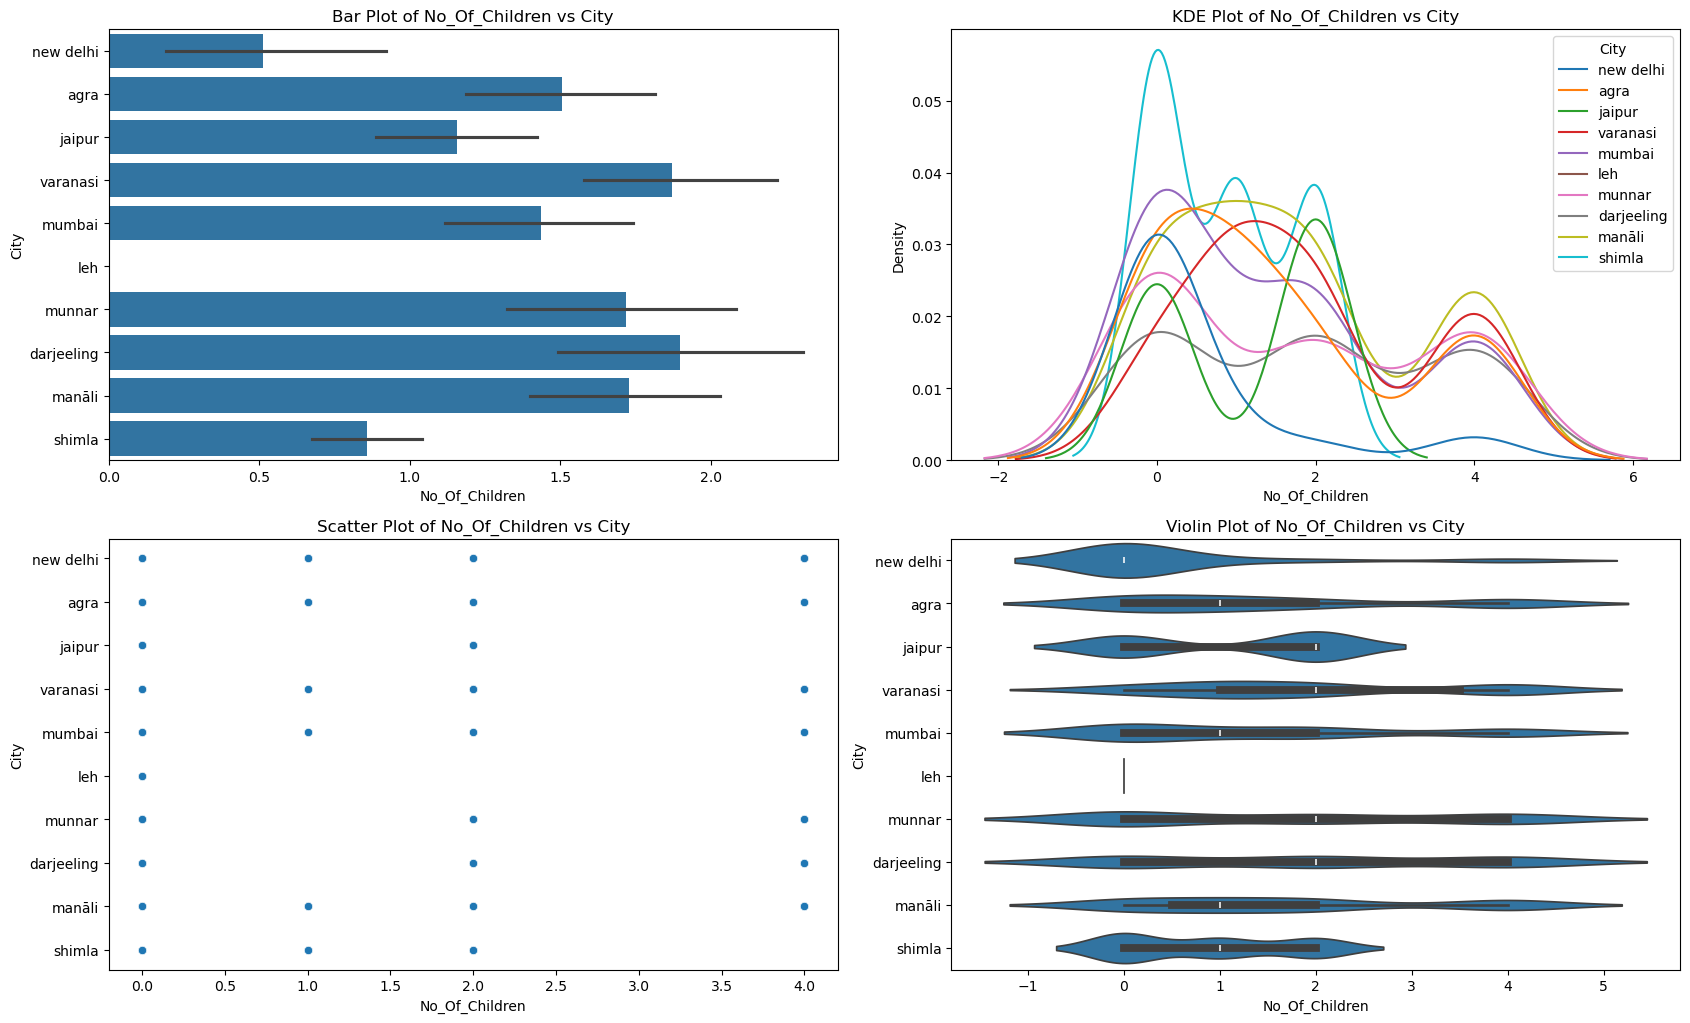

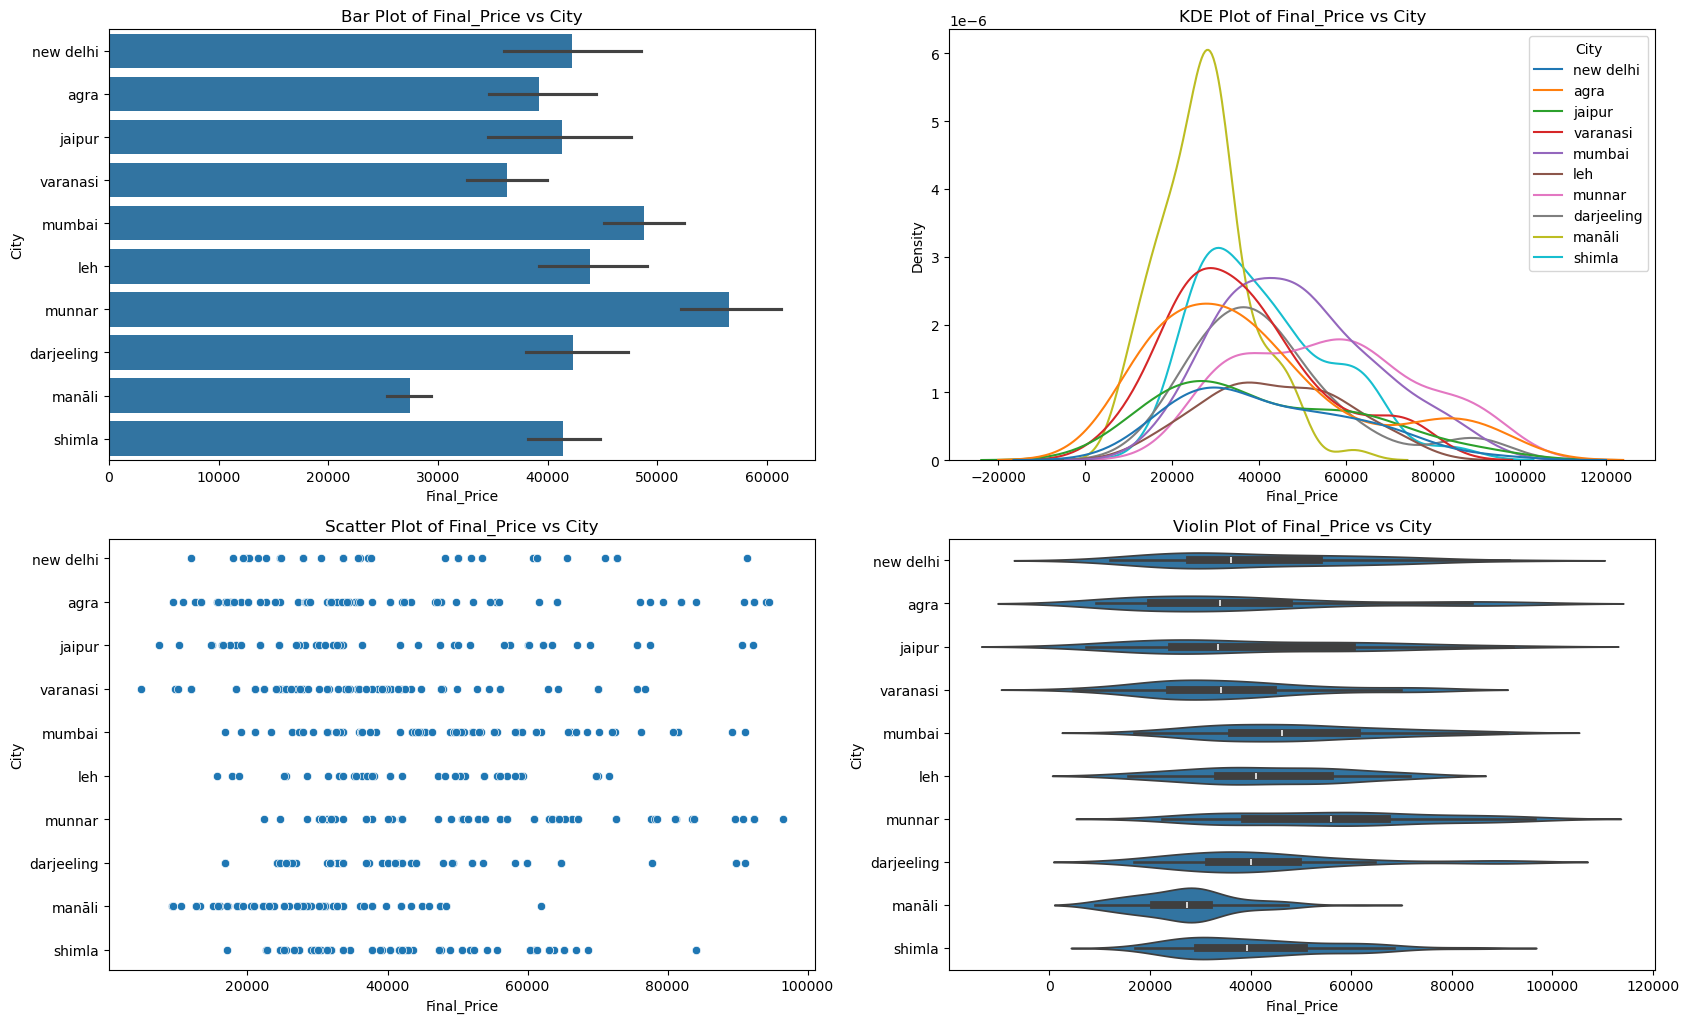

In [566]:
catego_num(data_cleaned , numerical_data , "City")

                                  mean  median  min  max
Recommended for                                         
recommended for family trip   8.182646     8.2  6.0  9.9
recommended for friends trip  8.178797     8.2  6.0  9.8
                                      mean   median     min      max
Recommended for                                                     
recommended for family trip   37826.804772  33725.0  4275.0  86940.0
recommended for friends trip  37197.541139  33224.5  7118.0  84375.0
                                     mean  median  min      max
Recommended for                                                
recommended for family trip   4599.876356  4112.0  0.0  10670.0
recommended for friends trip  4506.819620  4060.5  0.0  10670.0
                                  mean  median  min  max
Recommended for                                         
recommended for family trip   7.321041     8.0    2    9
recommended for friends trip  9.791139    10.0    7   10
            

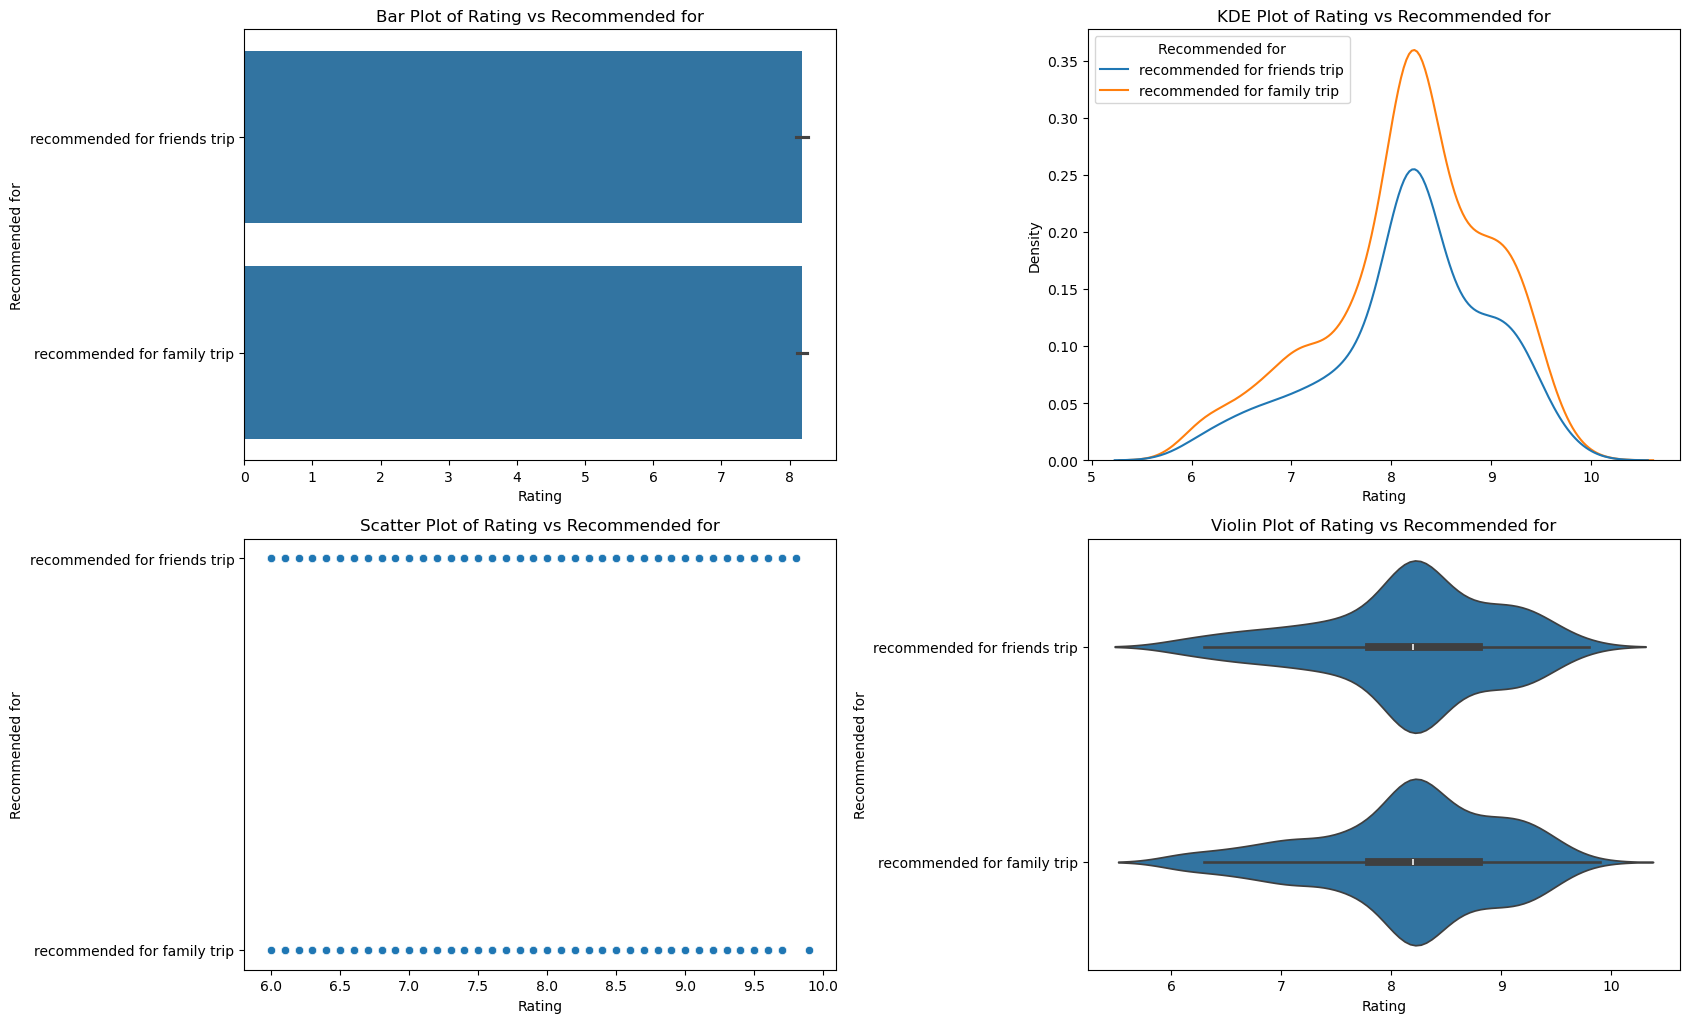

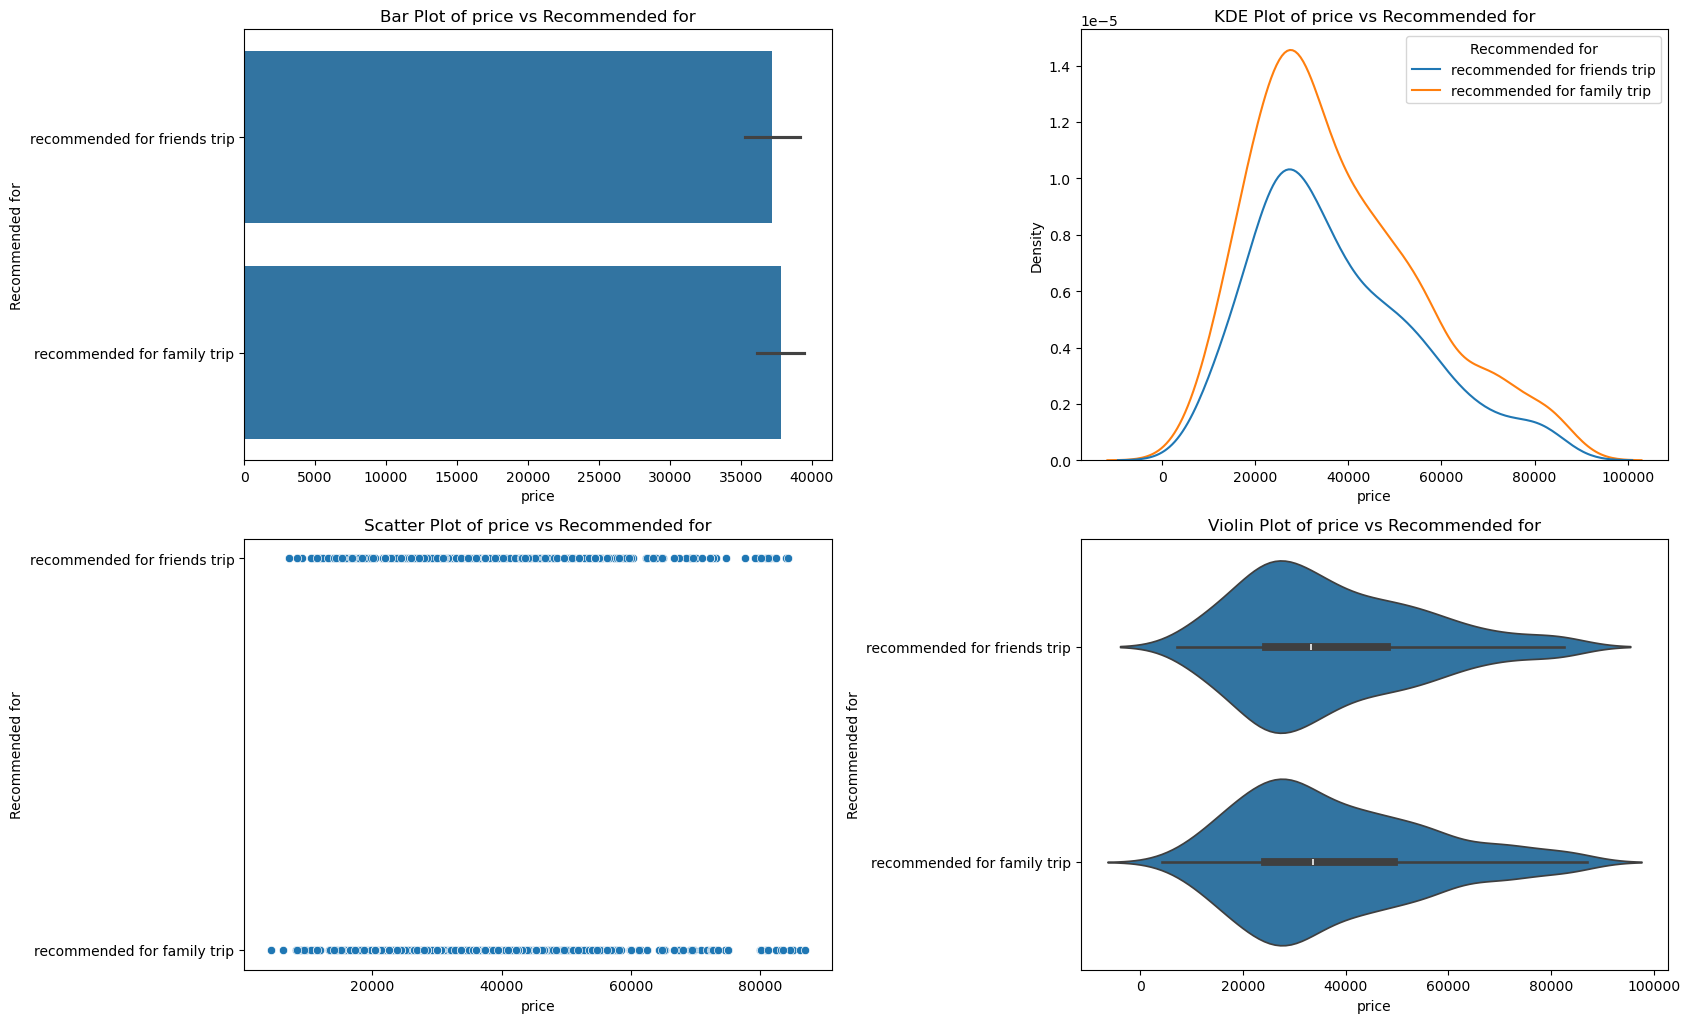

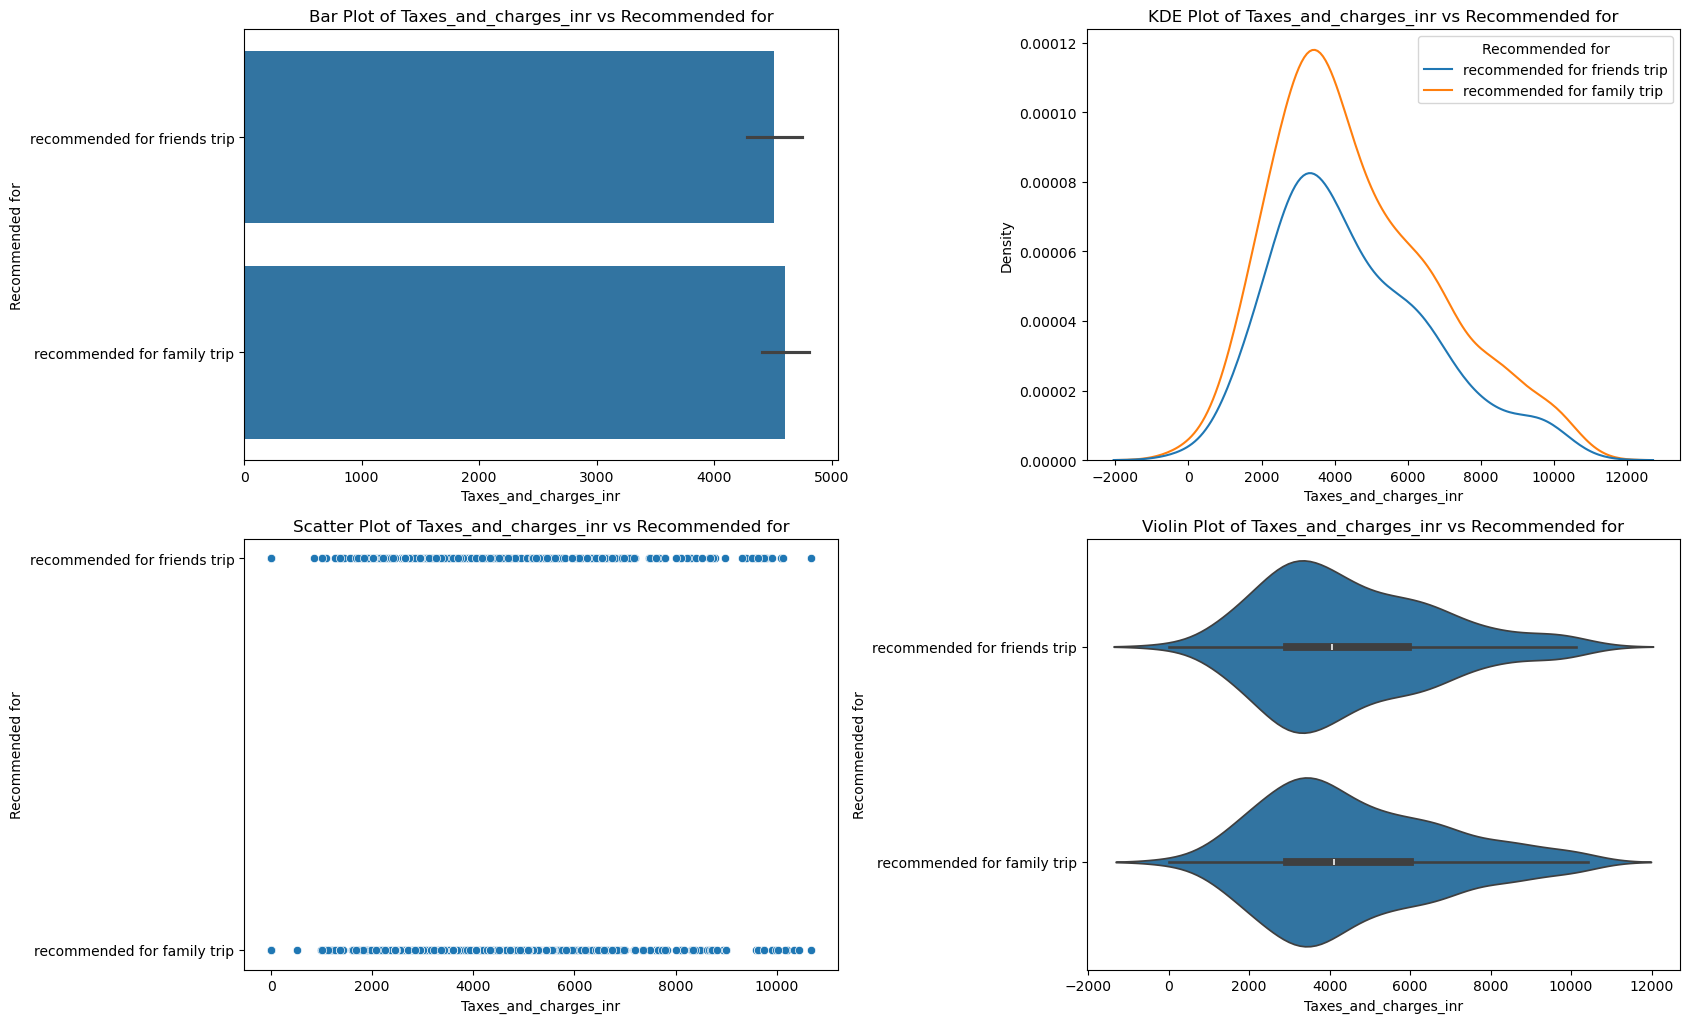

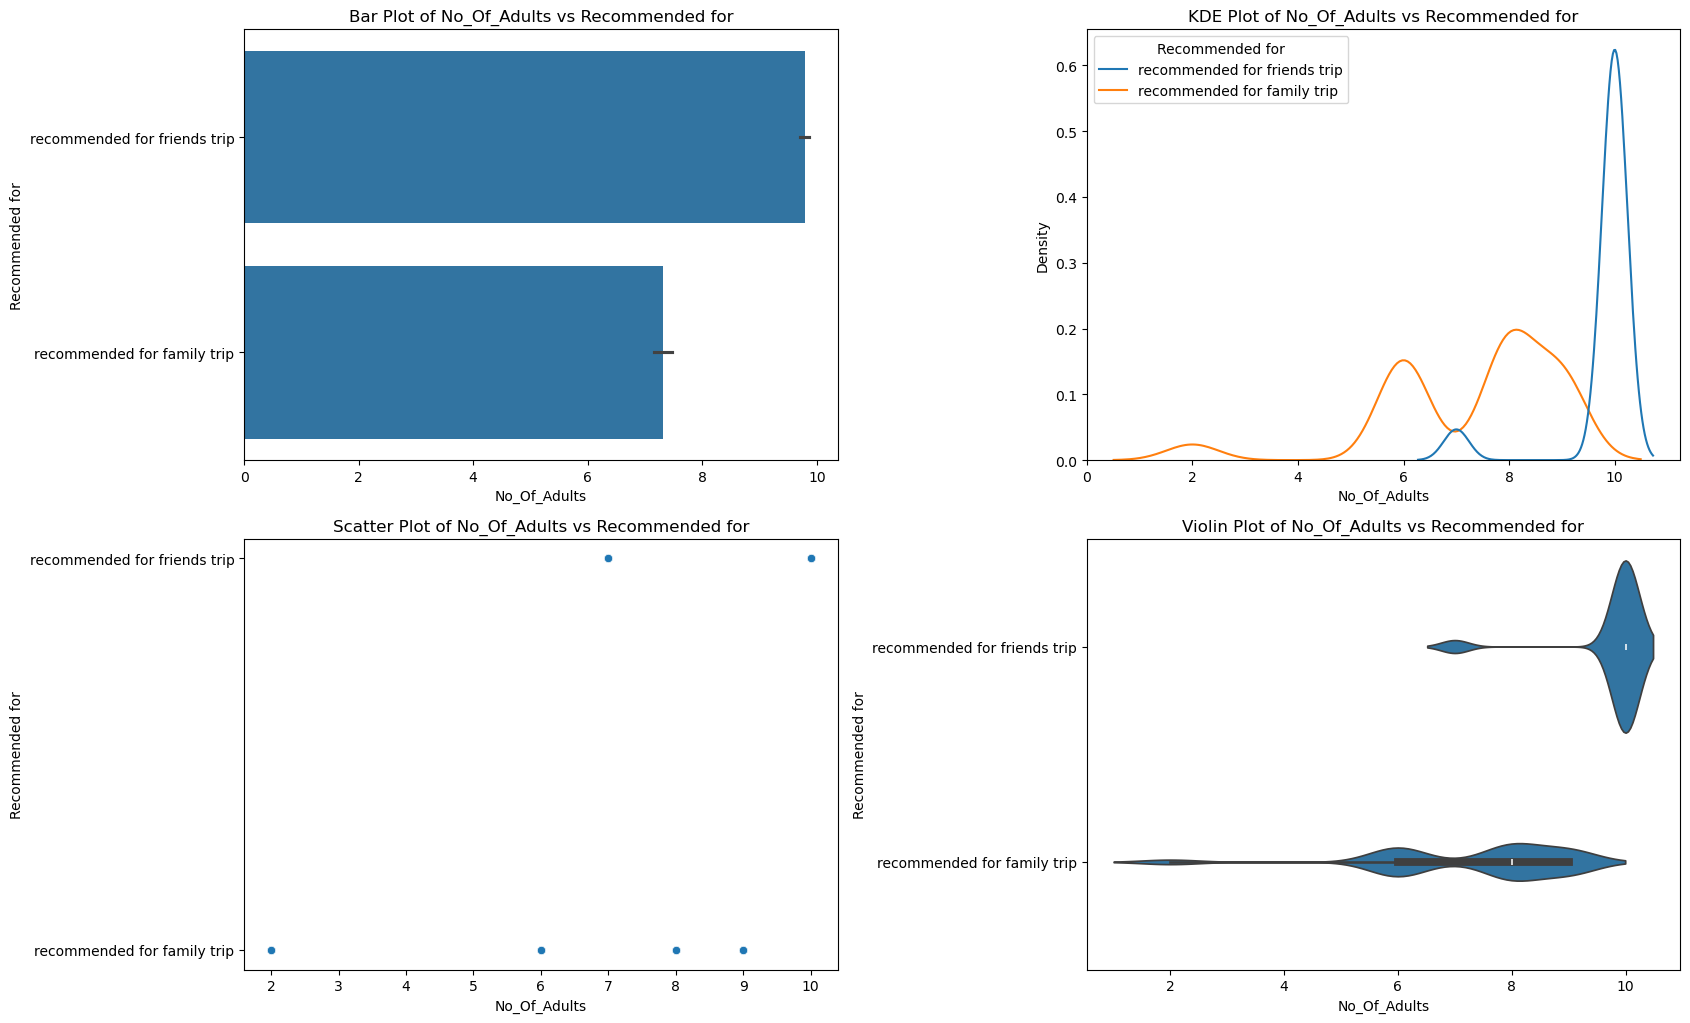

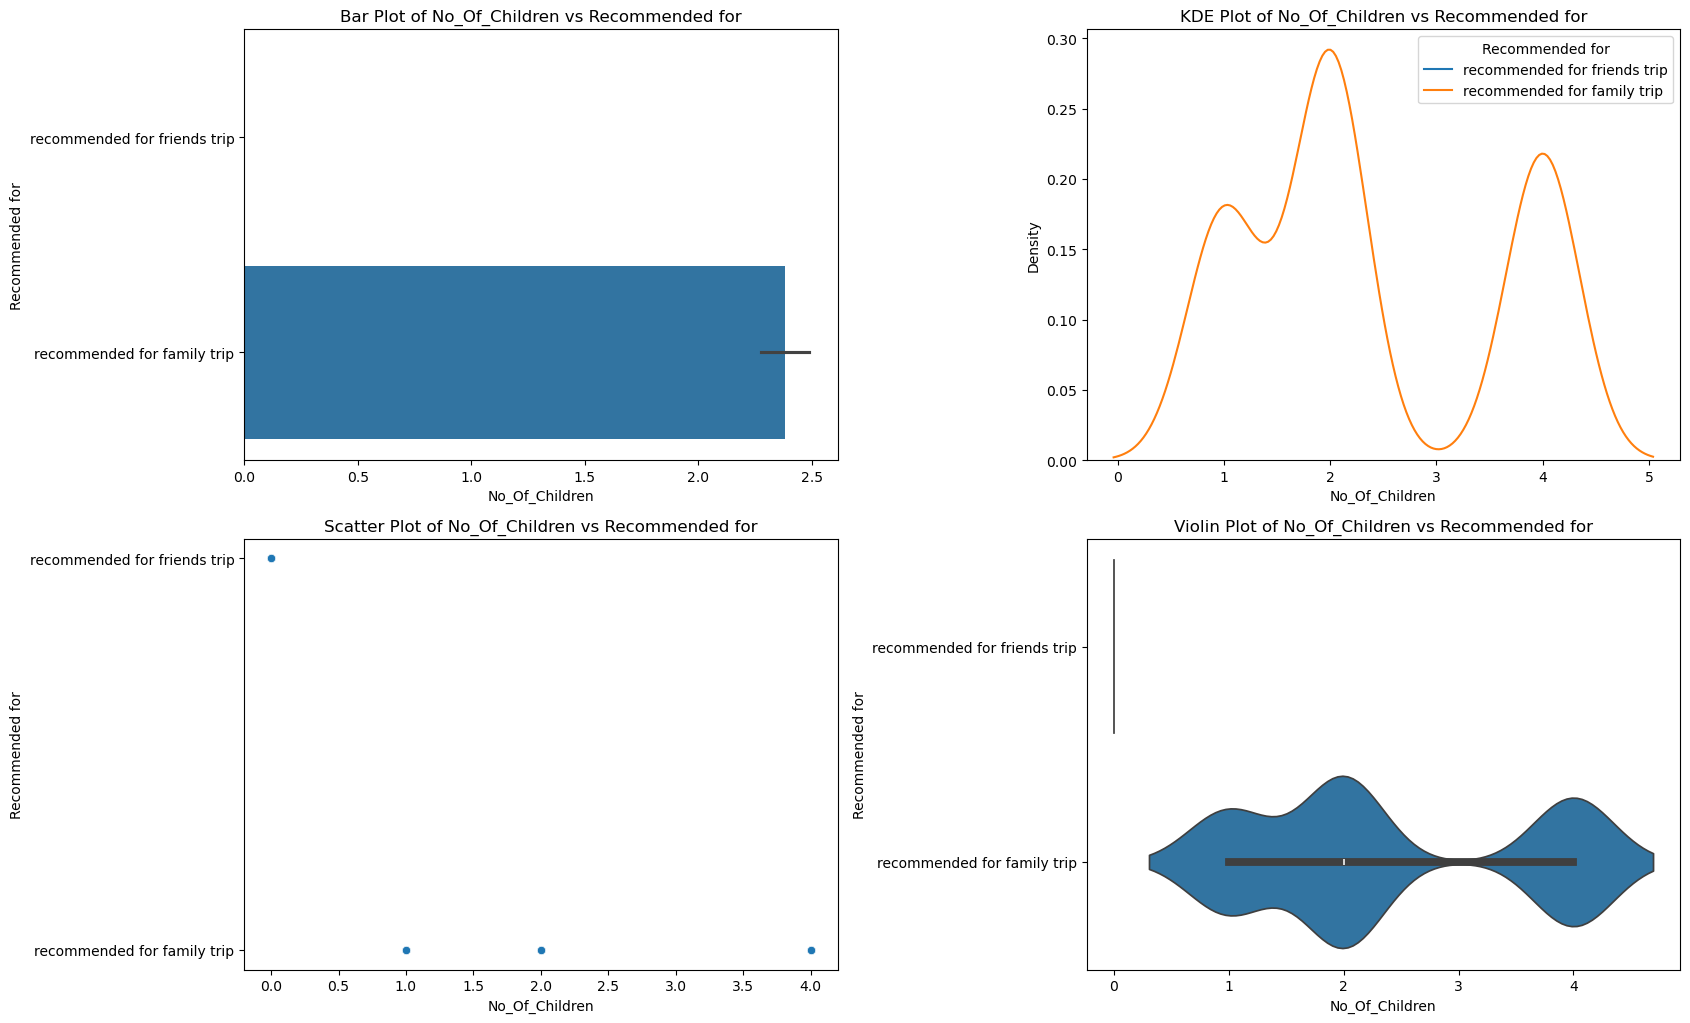

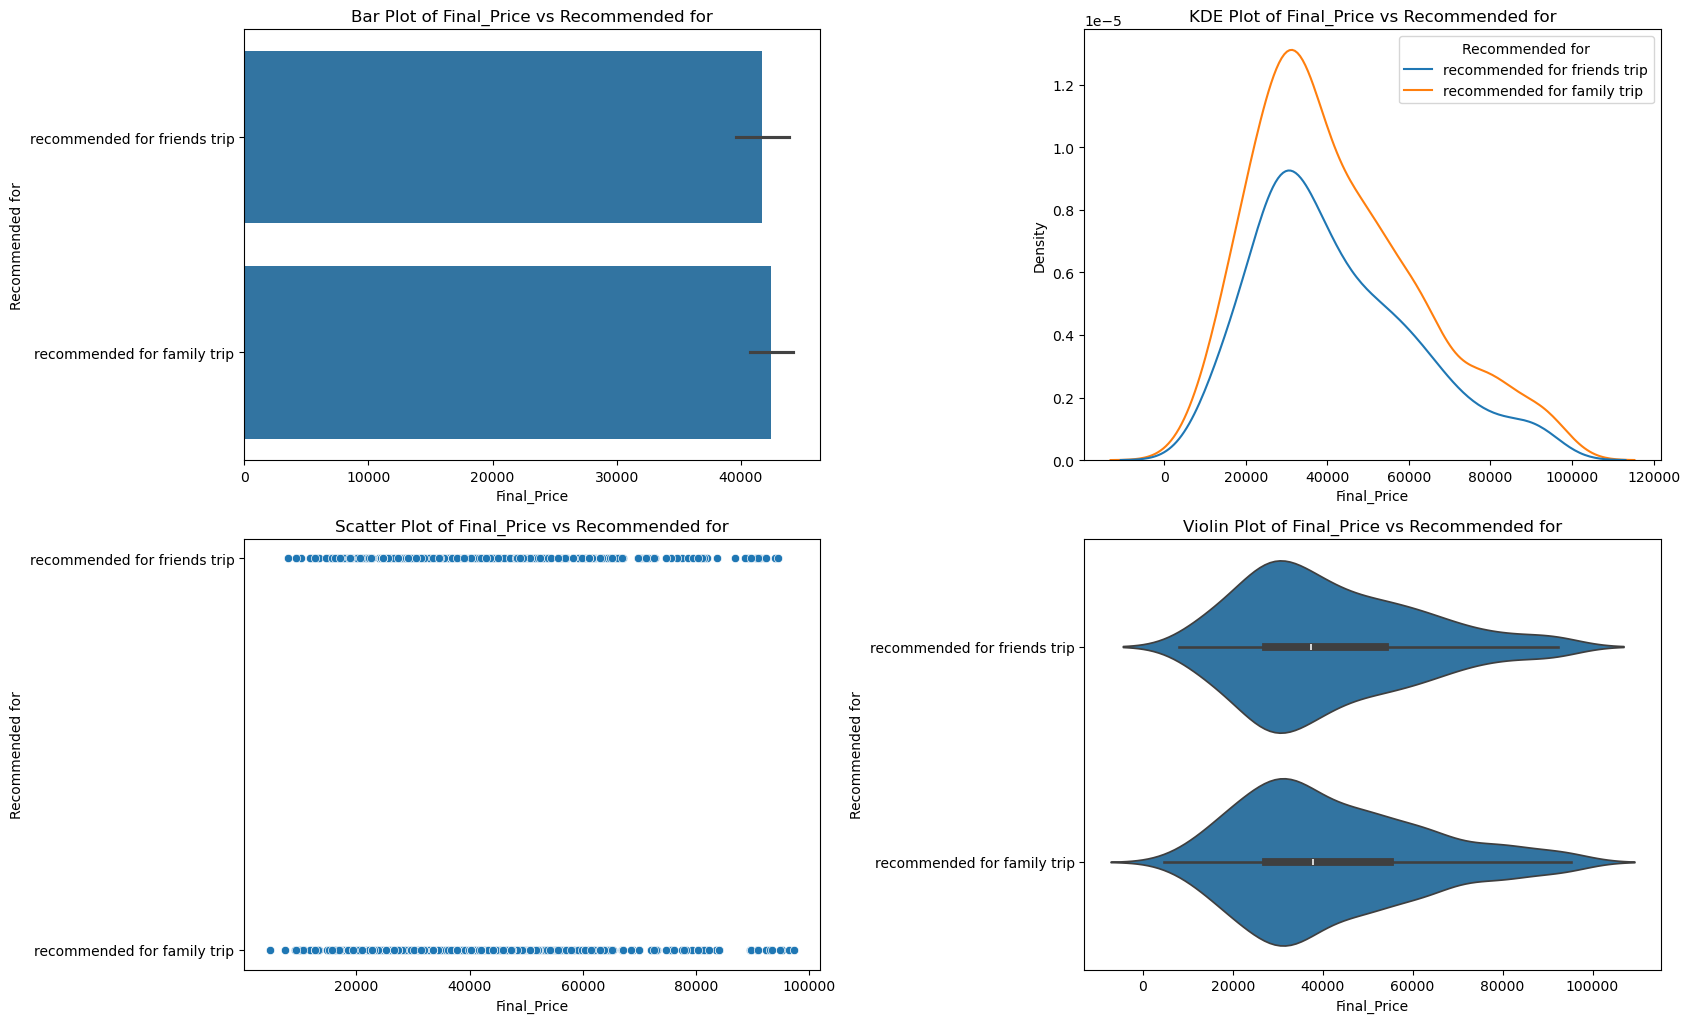

In [549]:
#Recommended for
catego_num(data_cleaned , numerical_data , "Recommended for")

### Review Type vs Rating

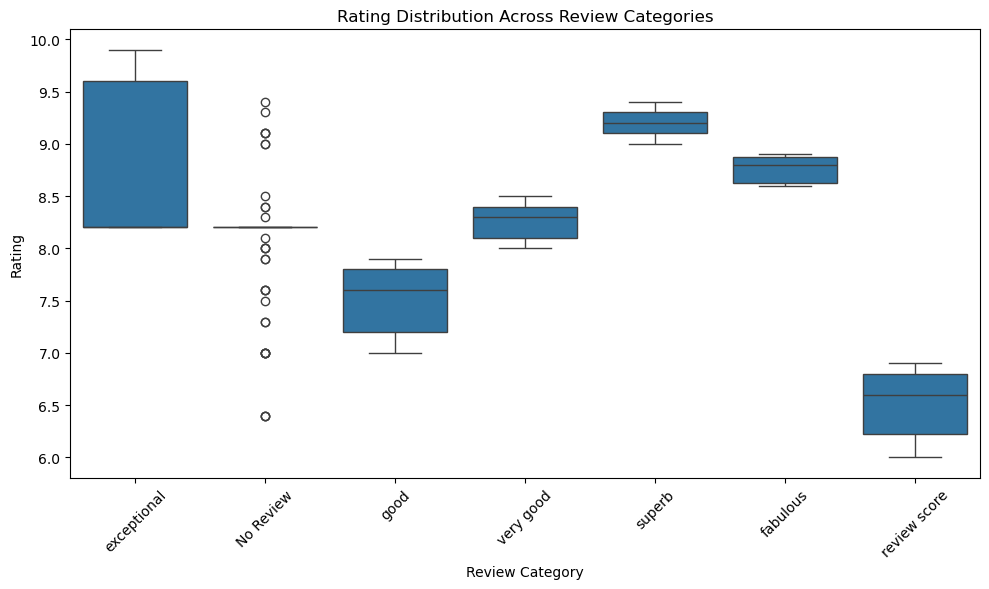

In [194]:
plt.figure(figsize=(10, 6))

# Create a boxplot: Rating distribution across Review categories
sns.boxplot(data=data_cleaned, x='Review', y='Rating')

# Titles and labels
plt.title('Rating Distribution Across Review Categories')
plt.xlabel('Review Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

- “This boxplot helps us validate that the textual review categories align well with numeric ratings. ‘Exceptional’ and ‘Superb’ categories consistently receive high ratings, suggesting they are trustworthy indicators of quality. On the other hand, ‘Review Score’ and ‘Good’ have lower and more varied ratings, suggesting either inconsistent experiences or less desirable options. This visualization guides travelers in selecting properties based on actual review performance.”



### Categorical Vs Categorical


### Top 10 Types of Stay Preferences in Top 10 Cities

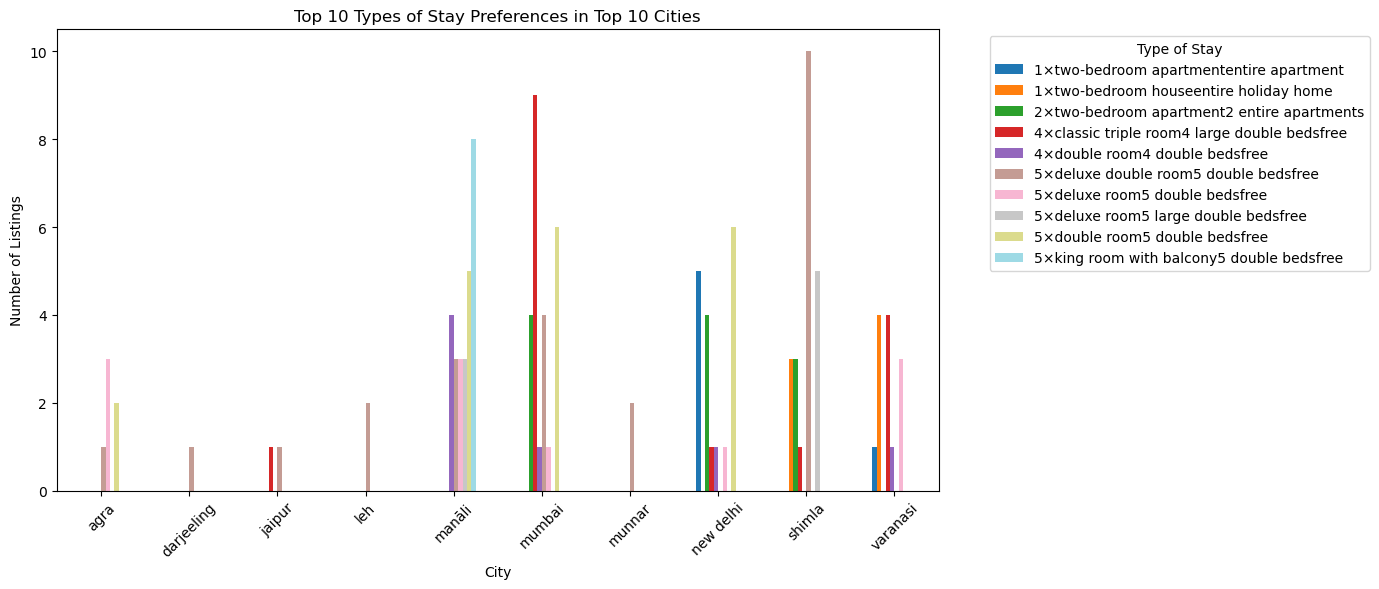

In [573]:
# Get top 10 cities by listing count
top_10_cities = data_cleaned['City'].value_counts().head(10).index

# Get top 10 most common types of stay
top_10_types = data_cleaned['Type_of_stay'].value_counts().head(10).index

# Filter data for top cities and top types of stay
filtered_df = data_cleaned[data_cleaned['City'].isin(top_10_cities) & data_cleaned['Type_of_stay'].isin(top_10_types)]

# Group by City and Type_of_stay
grouped = filtered_df.groupby(['City', 'Type_of_stay']).size().reset_index(name='Count')

# Pivot for bar chart
pivot_df = grouped.pivot(index='City', columns='Type_of_stay', values='Count').fillna(0)

# Plot the grouped bar chart
pivot_df.plot(kind='bar', figsize=(14, 6), colormap='tab20')
plt.title('Top 10 Types of Stay Preferences in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Type of Stay', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Tourist cities (Manali, Shimla, Darjeeling) offer cozy deluxe rooms or home-style stays.

- Metro cities (Mumbai, Delhi) show greater variety and volume, reflecting more diverse traveler needs.

- Cities with spiritual or heritage appeal (Varanasi, Agra) offer simpler, more standardized options.

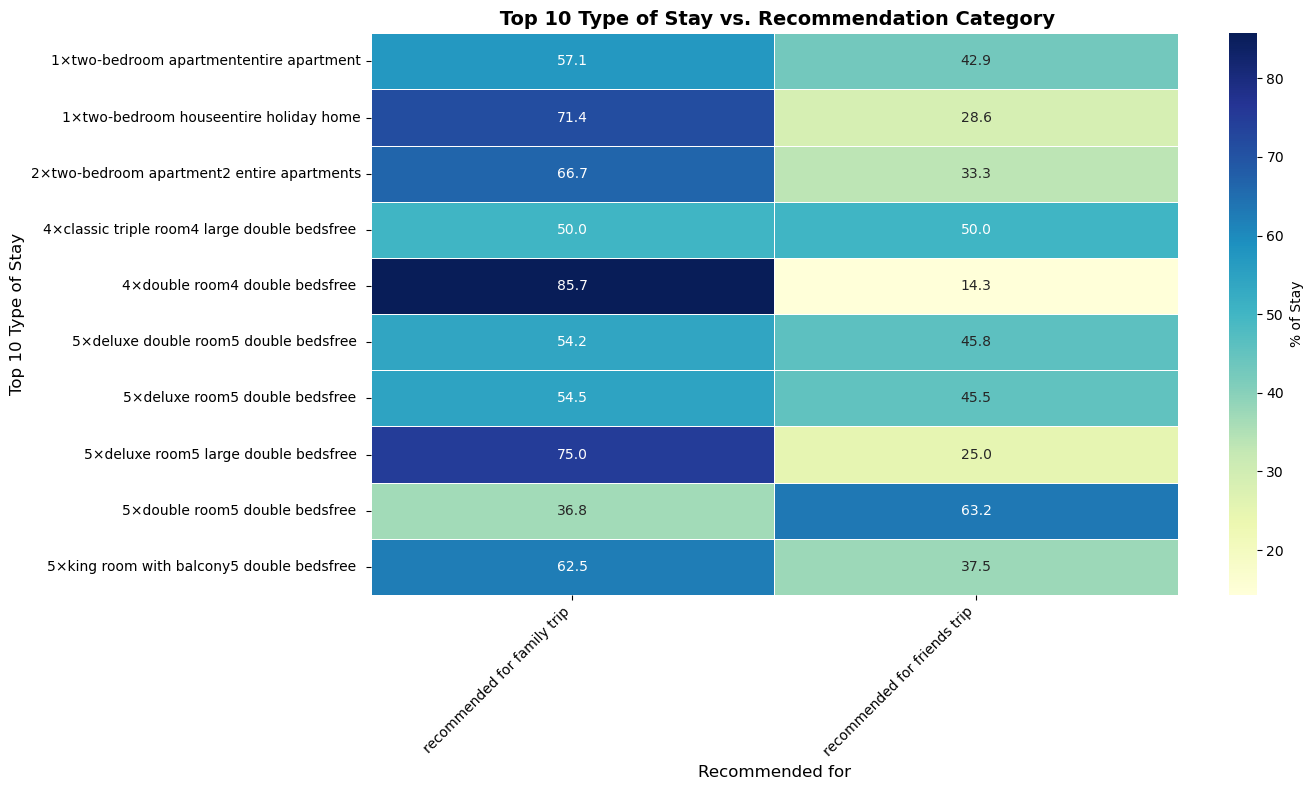

In [579]:
# Categorical to Categorical: Heatmap
# Get top 10 most frequent 'Type_of_stay'
top_10_stay_types = data_cleaned['Type_of_stay'].value_counts().nlargest(10).index
filtered_df = data_cleaned[data_cleaned['Type_of_stay'].isin(top_10_stay_types)]

# Create normalized crosstab
cat_cross_top10 = pd.crosstab(filtered_df['Type_of_stay'], filtered_df['Recommended for'], normalize='index') * 100

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cat_cross_top10, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5, cbar_kws={'label': '% of Stay'})
plt.title(" Top 10 Type of Stay vs. Recommendation Category", fontsize=14, weight='bold')
plt.xlabel("Recommended for", fontsize=12)
plt.ylabel("Top 10 Type of Stay", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


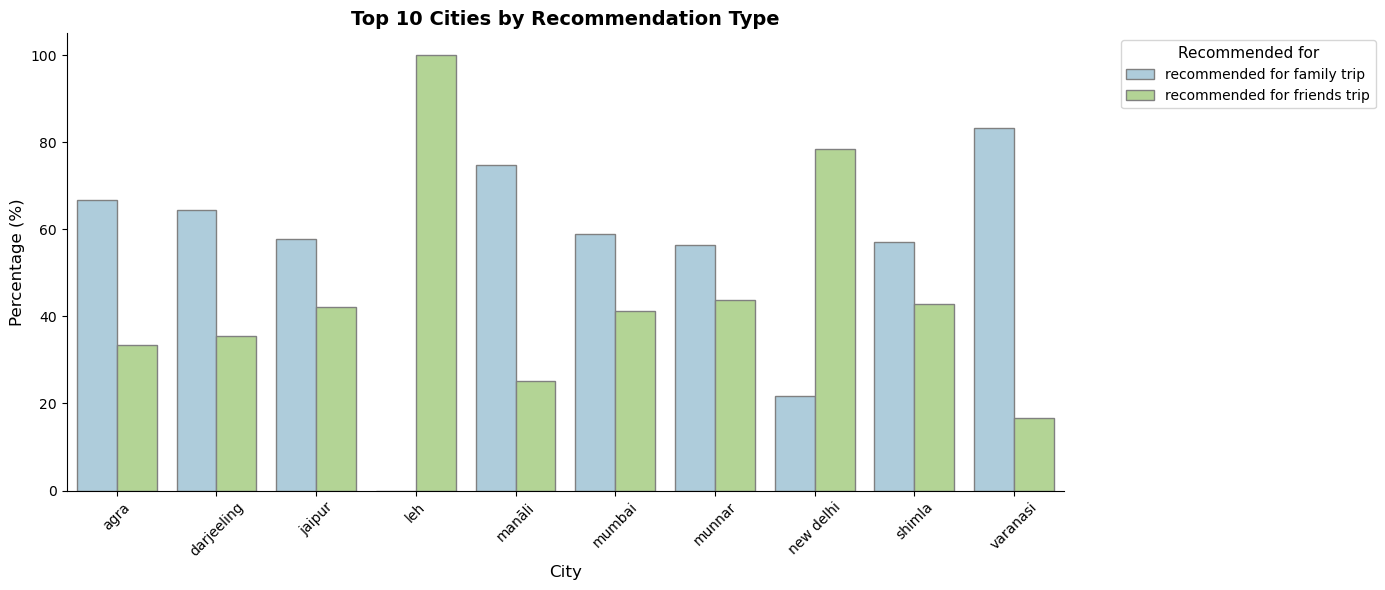

In [583]:
# Filter top 10 cities
top_10_cities = data_cleaned['City'].value_counts().nlargest(10).index
filtered_df = data_cleaned[data_cleaned['City'].isin(top_10_cities)]

# Create grouped percentage table
city_grouped = pd.crosstab(filtered_df['City'], filtered_df['Recommended for'], normalize='index') * 100
city_grouped = city_grouped.reset_index().melt(id_vars='City', var_name='Recommended for', value_name='Percentage')

# Define a soft, subtle blue-green color palette
subtle_palette = sns.color_palette(['#a6cee3', '#b2df8a', '#c5e6d5', '#90c8ac', '#d0e1f9', '#99d8c9'])

# Plot
plt.figure(figsize=(14, 6))
sns. barplot(
    data=city_grouped,
    x='City',
    y='Percentage',
    hue='Recommended for',
    palette=subtle_palette,
    edgecolor='gray'
)

# Chart aesthetics
plt.title('Top 10 Cities by Recommendation Type', fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.legend(title='Recommended for', fontsize=10, title_fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

